<h1> Sound Classification

<h2> using the urban sound dataset:</h2>

about 9,000 sound excerpts in ten different "classes"
- Air Conditioner
- Car Horn
- Children Playing
- Dog bark
- Drilling
- Engine Idling
- Gun Shot
- Jackhammer
- Siren
- Street Music

<h2> can we build a neural network that can predict the kind of sound based on frequency patterns in the data?


In [1]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
%matplotlib inline

<h3> what does it mean for a sound file to have patterns?

we're using **librosa**, an awesome python library, to load and then extract features from our wav files

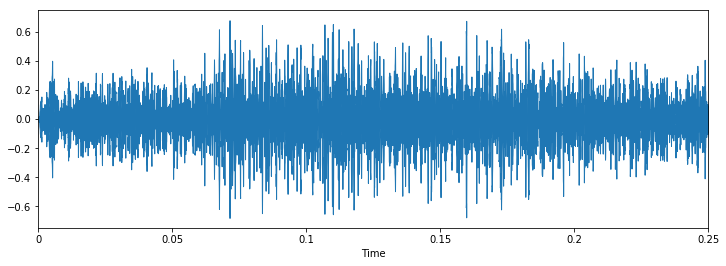

In [2]:
import librosa.display
data, sample_rate = librosa.core.load("./sound-data/Train/4934.wav")
plt.figure(figsize=(12,4))

librosa.display.waveplot(data,sr=sample_rate)

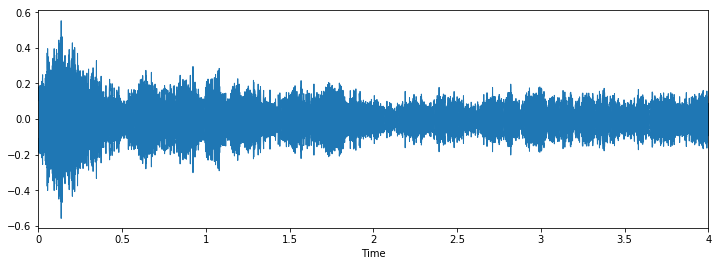

In [50]:
data, sample_rate = librosa.core.load("./sound-data/Train/3735.wav")
plt.figure(figsize=(12,4))

librosa.display.waveplot(data,sr=sample_rate)

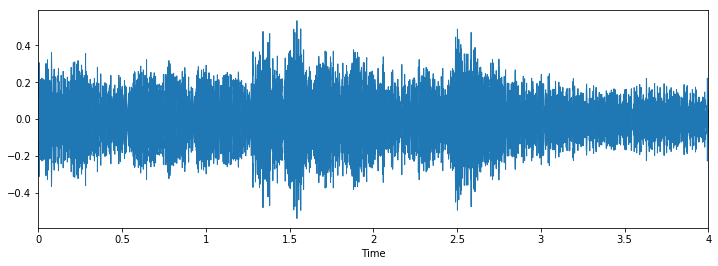

In [52]:
data, sample_rate = librosa.core.load("./sound-data/Train/1174.wav")
plt.figure(figsize=(12,4))

librosa.display.waveplot(data,sr=sample_rate)

<h3> what do our files sound like?

In [46]:
import IPython.display as ipd

ipd.Audio('./sound-data/Train/4138.wav')

In [4]:
import pandas as pd
train = pd.read_csv('./train.csv')

In [5]:
train.Class.value_counts() #check distribution of data

jackhammer          668
engine_idling       624
siren               607
air_conditioner     600
dog_bark            600
street_music        600
children_playing    600
drilling            600
car_horn            306
gun_shot            230
Name: Class, dtype: int64

In [53]:
train.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


<h2> parse audio data (from .wav files) and extract a new feature 
*(mel-frequency cepstrum)*

In [149]:
def parser(row):
    file_name = os.path.join(os.path.abspath('./sound-data/Train/'),str(row.ID)+'.wav')
    try:
        X,sample_rate = librosa.load(file_name,res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T,axis=0)
    except Exception as e:
        print('Error encountered while parsing the file:',file_name)
        return 'None', 'None'
    
    feature = mfccs  
    label = row.Class
    print(feature)
    print(label)
    return pd.Series([feature, label])

In [150]:
temp = train.apply(parser,axis =1);

[-82.12358939 139.50591598 -42.43086489  24.82786139 -11.62076447
  23.49708426 -12.19458986  25.89713885  -9.40527728  21.21042898
  -7.36882138  14.25433903  -8.67870015   7.75023765 -10.1241154
   3.2581183  -11.35261914   2.80096779  -7.04601346   3.91331351
  -2.3349743    2.01242254  -2.79394367   4.12927394  -1.62076864
   4.32620082  -1.03440959  -1.23297714  -3.11085341   0.32044827
  -1.787786     0.44295495  -1.79164752  -0.76361758  -1.24246428
  -0.27664012   0.65718559  -0.50237115  -2.60428533  -1.05346291]
siren
[-82.12358939 139.50591598 -42.43086489  24.82786139 -11.62076447
  23.49708426 -12.19458986  25.89713885  -9.40527728  21.21042898
  -7.36882138  14.25433903  -8.67870015   7.75023765 -10.1241154
   3.2581183  -11.35261914   2.80096779  -7.04601346   3.91331351
  -2.3349743    2.01242254  -2.79394367   4.12927394  -1.62076864
   4.32620082  -1.03440959  -1.23297714  -3.11085341   0.32044827
  -1.787786     0.44295495  -1.79164752  -0.76361758  -1.24246428
  -0.

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/33.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/35.wav
[-2.66853326e+02  1.92057536e+02 -3.84158473e+01  1.48985755e+01
 -1.80724020e+01  2.35376467e+01  2.87498892e+00  1.19185888e+01
 -1.63950647e+01  4.78734713e-01 -4.72233175e+00  9.48866604e+00
 -7.54393414e+00 -7.21795155e+00 -1.09287321e+01  3.28255700e+00
 -1.93073745e+00  6.96429175e-01 -5.67400230e+00 -3.74449367e+00
  1.66094016e-01  3.25838165e-02 -1.65711562e-01 -2.01438073e+00
  9.05075306e-01  8.12316615e-01  4.35585659e+00 -6.64493028e-01
 -3.19543332e+00 -9.34837206e-01  4.46616335e-01 -1.10803689e+00
 -2.47398061e+00 -4.05644850e+00 -1.75513224e+00 -1.55898785e+00
  2.72042650e-01 -2.58698874e+00 -2.55272986e+00 -2.85288631e+00]
siren
[-169.81548166   28.14700429  -36.25734085   38.47091663  -19.06500366
   26.04434065   -4.64458533   21.00229544  -21.14119752   18.44496088
   -5.65877

[-248.47475472  127.94911959  -50.07161148   36.06603124  -14.55653875
   22.94054295  -14.59769272   -4.50490456   -4.62479563    6.33332593
  -23.10670571   15.7007646    -5.85850989   -1.43629514   -7.46779156
    6.5394268    -9.20022894   -3.57893807   -0.63874009   -0.68673951
  -10.43810134   -1.3298574    -0.49012241   -1.86093914   -3.92086351
   -1.94047592   -1.53019951   -5.05967653   -3.30723174   -1.4266528
   -4.99902873   -1.84241571   -4.22689677   -1.73074989   -5.3389937
   -1.82030208   -3.74428113   -3.38058676   -4.84228933   -2.5021068 ]
children_playing
[-87.68257405  91.79830811  15.70625822  19.52620988 -22.87069427
  14.97735116 -24.07540434  15.65535653 -18.82763122  10.49620112
 -22.71044436   8.52340312 -11.32222869   5.95784934  -8.77174363
   3.05682587  -5.98019582   1.07166073 -13.66526593   7.73588641
 -13.98969249   5.44302009 -10.04651062   3.27057139  -7.25502327
   0.16401626  -6.29456778  -4.06996131  -3.81079803  -3.02178039
  -1.12954106   1.16

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/82.wav
[-106.81147667  155.96914418  -23.38652148    8.07004782   15.48124921
   13.90497855    6.46561928   16.97282149   -6.91463255    8.7253363
   -8.38010682    0.99293464   -8.50155368   11.56123028    2.79545733
   12.09370328    0.23582594    7.17148543   -2.5916264     3.82961016
   -1.69992228   -1.38151659    3.24045662   -0.78689611    0.40747959
   -4.91951885    1.78338817   13.87985524   11.45871979   -0.60672151
  -15.27314776    2.12491389   16.10901174    4.8334563    -5.27115351
    5.42581044   -3.05694905  -21.33973698   -3.51695292   17.79179465]
car_horn
[-2.40017587e+02  1.48370605e+02 -2.15759433e+01  9.93380077e+00
 -3.09503252e+01  8.05559928e+00 -2.84990596e+01  9.62665924e+00
 -1.81813888e+01  6.54706020e+00 -1.54096893e+01  3.72051976e+00
 -1.31097461e+01  9.40197077e-01 -8.89461489e+00  1.60907180e+00
 -1.21567189e+01 -3.52173019e-01 -1.01961864e+01 -2.63303121e+00
 -8

[-1.16818137e+02  1.13091726e+02 -6.23373793e+01  6.76135982e+00
 -2.54299402e+01 -7.97241676e+00 -1.32996085e+01 -6.63497361e+00
 -1.94057431e+01 -1.53053301e+00 -1.09516795e+01  3.60023438e+00
 -6.12110313e+00  9.77478527e+00  2.95874806e+00  1.80535689e+01
  1.18912781e-01  6.54700513e+00 -1.18735567e+01 -4.06570627e+00
 -1.12209121e+01  9.81862470e-02 -6.52441398e+00 -8.38627435e+00
 -1.18384773e+01 -8.20841435e+00 -1.09721518e+01 -1.63127942e+00
 -8.90980250e+00 -2.48701586e+00 -1.73897428e+00  3.12339188e+00
 -2.44963518e+00  8.41547321e-02 -1.71661362e+00 -5.33267501e+00
 -9.54708540e+00 -3.55781183e+00 -1.71413582e+00 -8.09030194e-01]
drilling
[-272.57218247  149.5768649   -17.03476836   45.77277504   -8.03499874
   11.53253745    0.67160679    5.88103947   -9.39091542   12.76962079
   -9.21909715    9.55613378   -6.00776114    7.77524829   -3.14701663
    3.61464202   -1.48596142    0.2996629    -5.06612117    0.71574859
   -7.02183851    0.88545851   -7.23093538   -2.50504506

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/142.wav
[-6.60803136e+01  4.36300380e+01 -3.36434896e+01  1.39940975e+01
 -9.06914459e+00  2.21433223e+01 -1.57419370e+01  2.43235420e+01
 -1.63021773e+01  1.07479172e+01 -1.22263085e+01  1.62031670e+01
 -1.93261531e+01  1.29974247e+01 -1.14358949e+01  1.03404628e+00
 -1.15998861e+01 -2.80932080e+00 -8.81970497e+00  1.33089597e-01
 -8.80042814e+00 -1.47486451e+00 -5.63899500e+00  7.38540925e-01
 -7.85792998e+00  3.02252616e+00 -5.57785184e+00 -1.18482408e-01
 -4.73822138e+00  1.07976506e+00 -9.39627548e+00 -3.46337227e+00
 -6.70644973e+00 -5.52558701e-02 -5.10785757e+00 -2.33269363e+00
 -4.20231780e+00  8.48212446e-01 -6.98125421e-01  3.98267175e+00]
drilling
[-160.72696933  125.63324695  -49.90805163    8.79354855  -13.88969877
   18.52229967   -9.80181566   22.1681682   -12.26323996   10.57310559
   -7.70312291    9.0779429    -5.81492101   12.33067445   -3.80438412
   13.98672143   -1.91703619   

[-189.02550303  114.03343719  -37.89183169   16.15504124    0.76944005
    1.85057712   -0.60028618    2.0080785   -13.30475851    8.05744215
  -21.56618298    0.51479062   -9.62877434   17.54201627   22.56779412
   45.15250565   32.81606576   32.63174898   -7.01375347   -8.02492058
   -7.74408248  -24.28128966  -26.88870307    7.03617163    1.55783165
  -10.79744471   -4.33373198   17.10003047   20.26766909   -5.6094764
  -33.24746126    0.53734993   29.87841133   24.32281263    4.16037749
   -4.73253217  -16.90753052  -40.64552771  -11.11740746   36.76188641]
car_horn
[-9.32570628e+01  9.59086183e+01 -4.91323035e+00  2.45516431e+01
  5.59359908e+00  3.34406319e+01 -1.86523420e+01  2.30163136e+01
 -1.29116494e+01  2.34884963e+01 -1.11359649e+01  9.58800201e+00
 -1.20598625e+01  8.71093161e+00 -7.32807195e+00  8.91343747e+00
 -6.98516255e+00  1.30336655e+01 -3.12477849e+00  5.89946374e+00
 -4.69345107e+00  6.13402764e+00 -3.96989544e+00  1.89704190e+00
 -9.47758978e+00  1.19333549e+00 

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/212.wav
[-1.76387522e+02  1.62733128e+02 -6.36781445e+01  8.06504520e+00
 -2.90538160e+01  1.04008470e+01  2.93224685e-01  1.71592195e+01
  1.42010305e+00  2.13017872e+01  1.08313049e+01  1.79058776e+01
  2.55196145e+00  3.01720057e+00 -4.48719928e+00 -7.07589271e+00
 -9.80345253e+00 -4.19210950e+00 -5.97895024e+00  9.81415786e-01
 -5.58880298e-01 -1.32025693e+00  2.64324023e+00  2.03172640e+00
  2.05872433e-01  4.86487882e-02  1.06920403e+00 -5.25884235e-02
 -2.73991459e+00 -2.49594377e+00  7.04792432e+00  2.02013971e-01
  2.93817299e+00  1.61628720e+00 -1.18188562e+00  1.47230125e+00
  1.75551339e+00  1.02095147e+00 -2.87912152e+00 -1.71183555e+00]
siren
[-2.79346539e+02  1.33047969e+02 -1.18489669e+01  2.88707521e+01
 -1.61490742e+01  8.12328650e+00 -9.86012888e+00  4.46604704e+00
 -1.37705448e+01  1.12415076e+00 -1.80575639e+01 -1.66482100e+00
 -1.65941194e+01 -1.86384195e+00 -8.47548400e+00  5.

[-1.05742458e+02  1.02060693e+02 -9.59427746e+01 -4.48663769e+00
 -1.78980332e+01 -1.84918929e+01 -2.68909849e+00 -8.71318872e+00
 -1.34662258e+01  1.15479373e+01 -1.84211316e+01  1.11507400e+01
  7.71813668e-03 -1.32564667e+00  3.13431867e+00  2.98037577e+00
 -9.41350592e+00  1.01792558e+01 -6.01398798e+00  7.32124760e+00
  1.81728852e+00 -9.68727631e-01  1.03176870e+00  4.44579895e-01
 -1.02798175e+00  3.74739998e+00 -2.44461463e+00  3.06523501e+00
  2.17476651e+00 -3.54747230e+00 -7.22552223e-02 -2.04672876e+00
 -1.26373221e+00  2.92176226e+00 -2.45097540e+00  4.08076438e+00
  2.72628427e+00  7.75124704e-01  3.72950064e+00  1.98533936e+00]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/235.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/236.wav
[ -68.32779256   43.31188399 -127.07016844   16.29942518  -19.29814906
   14.52216473  -15.87877855   21.45282748  -12.0165508    14.0035848

[-7.72819303e+01  1.40535695e+02 -3.91367575e+01  5.28186774e+01
 -2.57003733e+01  1.98723215e+01 -1.58721729e+01  1.97054543e+01
 -8.77750605e+00  8.64922779e+00 -1.13802124e+01  4.64096031e+00
 -1.01636362e+01  5.42855779e+00 -1.07194905e+01  2.75699639e+00
 -7.67913340e+00  3.78813692e+00 -3.90197131e+00  1.58156206e+00
 -5.03310543e+00  1.20352235e+00  6.05109715e-02  6.87253240e-01
  1.48835856e+00  5.28775041e-01 -5.00548049e-01  1.54357969e+00
 -3.69307904e+00 -1.79685044e-01 -6.35880470e-02  1.26074652e-01
 -1.82662972e+00 -1.80100027e+00  6.07669667e-02 -4.40238643e+00
 -2.42964839e+00 -4.60133063e+00 -1.51292471e+00 -2.67798920e+00]
jackhammer
[-192.83923494  138.13063113  -23.00477585   17.16114983  -19.53104004
   11.02321734  -20.12034758   16.38580532  -19.44092303    8.04020836
  -23.97266298   -0.72628706  -16.08483876    0.47364655  -12.01931277
    3.54544604   -9.18649548   -0.9236592    -8.73762734   -1.00873926
   -4.90431053    0.81870189   -5.11239041   -1.484503

[-2.06979426e+02  1.64390377e+02 -1.04065959e+02 -4.40764473e+01
 -3.05510179e+01 -2.50482794e+00  9.86986984e+00  1.48658303e+01
  6.32813629e+00  1.09423060e+01  1.67553175e+01  3.52962989e+00
 -6.81637472e+00 -8.24593299e+00 -5.27614187e+00 -5.23021788e+00
 -1.40574159e+00 -4.57054823e+00 -6.63065345e+00  9.11280807e+00
  6.67469498e+00  1.24403070e+00  1.59977099e+00  2.48931869e+00
  4.32817845e+00 -2.13340920e+00 -4.76755564e+00 -5.30051249e-02
 -9.65243999e-01  3.69705634e+00  1.15035832e+00 -6.59654490e+00
  4.03000115e+00  4.20093174e+00  3.64449427e+00  1.12837458e-01
 -5.77764027e-01  1.68095526e+00 -4.68415408e-01 -3.18647775e-02]
siren
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/288.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/295.wav
[-138.87759016  101.48971881  -95.07566082    1.91593966   -5.64425409
  -10.87486462    3.36832369   -8.21502762  -15.92485004    6.80612777
  -17.355

[-2.27862095e+02  1.66177334e+02 -1.49317475e+01  1.50516805e+01
 -2.00337078e+01  2.93359697e-01 -1.21450414e+01 -5.03495820e+00
 -9.29832541e+00 -5.65916741e+00 -1.23060580e+01 -3.69501956e+00
 -1.60189554e+01 -3.38347062e+00 -4.42536918e+00 -1.85755759e+00
 -6.34802342e+00 -2.87866633e+00  4.38336532e+00  8.08515154e+00
  6.07936275e+00 -2.51868586e+00  1.30278819e+00  2.18277758e+00
  3.96837415e+00 -5.01234137e+00 -8.99875516e+00 -4.48025783e+00
 -1.26300834e-01 -3.17795333e+00  2.48460946e-01  1.26256441e-01
 -1.03146338e+00 -7.18381379e+00 -4.37169243e+00 -1.14891497e+00
 -2.98684874e+00 -1.41929357e+00 -7.12906895e-01  6.40282999e+00]
street_music
[-7.19284114e+01  1.33911818e+02 -2.18427452e+01  6.92705167e+00
 -8.18184782e+00  3.43298552e+01 -1.70685166e+01  2.26001449e+01
 -1.42435289e+01  1.27387239e+01 -7.56291482e+00  1.35489691e+01
 -6.57432618e+00  6.11108607e+00 -6.84034812e+00  8.95548467e+00
 -2.98350323e+00  7.17724304e+00 -1.38661210e+01 -9.09493208e+00
 -4.2631044

[-1.16281577e+02  1.34762748e+02 -2.84295630e+01  2.92942262e+01
 -5.70375216e+00  2.28852285e+01 -1.07265334e+01  1.11386438e+01
 -1.42829188e+01  1.43153912e+01 -3.95276440e+00  9.99192883e+00
  2.40976482e+00  1.51597325e+01  7.03731035e+00  1.23422158e+01
  1.19954811e+00  9.92605178e+00  6.52194572e+00  7.54368167e+00
 -1.01954170e+00 -1.82913169e+00 -8.25103548e-02  3.43149245e+00
  1.47239008e+00 -3.18398041e+00 -1.37151593e+00  8.39318303e+00
  4.73587035e+00 -8.73053584e+00 -5.38611397e+00  9.54384437e+00
  1.31370717e+01  1.74506466e+00  6.02934878e-01  4.95901689e-01
 -5.35414789e+00 -5.35989643e+00  8.35609911e+00  5.45317702e+00]
car_horn
[-3.44134669e+02  1.41513955e+02 -3.65713342e+01  1.99197070e+01
 -4.89294096e+00  2.95245331e+01  9.49692965e+00  1.91314526e+01
 -1.82825152e+01  1.91388361e+01 -1.36887372e-01  7.13818175e+00
 -1.20178311e+01  4.66021743e+00 -4.20008048e+00  9.35136849e+00
 -1.00484463e+01  1.63544081e+00 -6.76767796e+00  6.04542920e+00
 -4.67487572e+0

[-1.97614776e+02  1.07046355e+02 -1.25076579e+01  3.78935342e+01
 -2.74382198e+01  1.30994184e+01 -2.67550680e+01  1.15279965e+01
 -2.50567773e+01  3.11748629e+00 -1.55624673e+01  1.31224505e+01
 -1.19481479e+01  5.51075398e+00 -1.14185829e+01  1.88611152e+00
 -1.02503980e+01  1.73044605e-01 -2.77945863e+00  6.57643959e+00
 -6.23484651e+00 -2.72886569e+00 -8.48312928e+00 -5.47132289e-01
 -5.65488257e+00 -4.80567288e-02 -2.69683290e+00  1.96263182e+00
 -9.27753510e-01  4.27239431e+00 -1.63522292e+00  1.04783077e+00
 -3.05506705e+00  7.64026561e-01  3.05261669e+00 -2.78004003e-01
 -1.75889146e+00  1.33333524e+00  2.33236465e+00  1.07569765e+00]
jackhammer
[-2.40349944e+02  1.65505188e+02 -1.70398383e+01 -1.57343020e+01
 -1.40917018e+01  7.55826443e+00 -3.45243741e+00  1.34665715e+01
 -1.14606111e+01  7.53208670e+00 -3.06312968e+00  1.84329927e+01
 -3.67698849e+00  1.51299263e+01  6.28405894e+00  3.48178075e+00
  1.90623883e+00  9.03828039e+00  7.87844131e-01 -6.90151057e+00
 -5.10656106e

[-2.43384961e+02  1.79510700e+02 -5.87245319e+01  4.25567975e+00
 -1.62949030e+01  2.05089393e+01  2.90962459e+01  2.16805021e+01
 -1.03334515e+01 -1.52895441e+01 -2.43573025e+00  5.39315809e+00
 -3.35080532e+00 -3.42854433e+00 -1.52071876e+00 -1.05496359e+00
  2.98891940e+00  2.51033802e+00 -5.74241102e+00 -1.01913258e+01
  2.60986882e+00  3.97839834e+00 -3.02357310e+00 -4.21094318e+00
  3.36793336e+00 -6.30248228e-01  2.53208837e-01 -1.11172169e+00
 -4.22066441e+00 -2.88556040e+00  2.66743902e+00  2.48031426e+00
 -2.70992962e+00 -1.55437785e-01  8.66142852e-01  7.06394215e-01
 -1.64552553e+00 -2.73001441e+00 -1.61587043e+00  1.45447365e+00]
siren
[-4.97662083e+02  1.75692384e+02 -2.83748379e+01  2.62319368e+01
 -9.50519655e-02  1.38225173e+00 -1.00669284e+00 -9.97461499e-01
  9.54819166e+00  9.76082132e+00  2.18004416e+00  1.24685498e+01
  2.39629018e+00  7.42840994e+00  3.47731985e+00  5.82168163e-01
  6.34921574e+00  3.41259571e+00  1.27570384e+00  9.65982672e+00
  4.18840170e+00  

[-160.18038861   30.37206187  -38.71353453   30.87657293  -16.3417415
   27.23392595   -6.18118783   19.94960897  -24.92668651   13.72688125
   -4.98588514   17.31014439  -17.45375897    9.93742015  -15.45735908
    5.00926796   -5.06598797    2.0152578   -11.38144541   14.46363152
  -10.54242398    3.75857654   -3.8891149     8.31792237   -6.28441392
    1.08700419    1.85142099    2.17463507   -9.90503037   -3.24082317
   -1.9844782    -3.98221919    1.64956708    2.81455288   -4.01606514
    5.17081786    1.11437344    4.40444237   -2.49901079    0.3514214 ]
jackhammer
[-89.56281104 140.39016677 -35.91829007  52.02398234 -29.34785928
  15.58973607 -19.19273619  19.17584265 -12.52863797   9.30470499
 -10.61881053   3.10692027  -7.58611243   2.16592881 -15.76597962
   7.75685896  -9.46847739   3.94812641   0.24440203  -0.24771915
   0.75495136   0.366103     2.6292999   -2.63764196   2.60168218
   4.44712015  -3.08921307   4.78227262  -3.98812198   0.45085655
   1.55804933  -2.1443469

[-138.54858226   59.49065986  -67.40540701   12.18358949  -31.80436431
   -5.23270512  -11.38522323    3.14393426  -21.30431309   10.08685336
  -24.62551735   -6.49360235   -5.33259928   10.50236478    8.2354391
   27.1505473     5.9290886     3.46716546  -10.15766807    5.9382394
   -5.55905594   -9.42102678  -14.69115642    0.25299767    2.01437366
   -5.82966365   -8.20350304   19.78798467   21.79556267   -6.5913707
  -28.17372574   -1.29329472   25.99339707   13.62114469    0.18975196
    4.69328431  -11.07329275  -33.15742766   -2.44264708   31.611059  ]
car_horn
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/445.wav
[-2.64702922e+02  1.36821979e+02 -7.21947349e+01 -6.24902180e-01
 -1.61714409e+01  2.49716393e+01  1.35962834e+01  1.51066688e+01
 -1.23044995e+01  2.24046983e+01  1.74579494e+01  1.47350432e+01
 -2.65170902e+00  4.49857743e+00  4.93583327e+00 -8.21331439e-01
 -5.60064344e+00 -1.57388944e-01  8.19299954e+00  6.80864354e+00
 -4.

[-1.26841204e+02  1.33365737e+02 -2.07908429e+01  3.15868315e+01
 -5.46010447e+00  2.76116430e+01 -1.52919246e+01  2.43947471e+01
 -7.46160659e+00  1.45592909e+01 -1.51575051e+01  3.14484511e+00
 -8.35151067e+00  9.23466742e+00 -7.85249968e+00  1.28990186e+00
  1.52619973e+00  1.48633428e+01 -3.03331098e-01  8.45872282e+00
 -3.01209127e+00  3.96458070e+00  2.65245366e+00  1.09058459e+00
  1.74439859e+00  4.37167321e+00 -1.95465292e+00  2.48903894e+00
 -2.43927233e+00  1.22955571e+00  1.23846585e+00  1.48493656e+00
  2.44247514e+00 -2.16997943e-03 -1.32662400e+00 -1.15543687e+00
 -2.62650832e-01  2.73532793e-01 -2.09975842e+00  8.75029005e-01]
air_conditioner
[-1.59057241e+02  8.69775982e+01 -1.19923008e+01  2.38643501e+01
 -1.30182133e+01  2.54114205e+01 -7.91447778e+00  1.92909661e+01
 -5.24601069e+00  1.11053577e+01 -4.50143885e+00  1.08674771e+01
  3.48373233e-01  1.32129549e+01 -3.26678367e+00  9.55585675e+00
 -6.94843285e-01  5.08883263e+00  4.23807340e-01  2.57270545e+00
  7.7185

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/500.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/501.wav
[-236.23271409  138.96524338   18.05512794   -0.33274205   -2.28318554
   28.43727845    3.00572455   26.74064026  -13.33075821   -0.82478809
  -16.55037925   23.67503287   -5.47237827   19.58546919    9.18760858
   13.78175784  -13.62224242    3.18922838  -12.29932184   -3.53607462
   -4.79975794   27.12203651   -3.5021645    15.05743443  -11.99344678
    4.49766194   -8.84178565    6.36687407   -4.3136572     6.82629439
   -6.12419112    7.77098607    8.02398661   -1.23463935    4.43338207
   -5.31444953    2.47224801    1.38580302    8.3937764    -6.9799663 ]
drilling
[-1.38742908e+02  5.16011834e+01 -1.11624041e+02 -1.96538915e+01
 -5.90850512e+01  2.01642892e+00 -3.11925454e+01  1.27895303e+01
 -2.47078329e+00  2.41466012e+01  3.59454015e+00  1.05361349e+01
 -6.57075901e+00 -3.08127764e+00 -5

[-197.57864438  184.34403614   -5.56449291   11.26874745   -9.20368578
    0.50103023  -18.41918685   13.43735907  -19.00871595    4.71533611
  -12.90908723   -2.98865513  -23.07762572  -14.87776581  -16.95957141
   -4.51735218  -15.16097931   -3.29472147   -1.06821948    0.8390184
   -7.33172515   -7.38175733  -10.36078436   -4.25079006  -10.33585656
  -16.74750058   -5.91196676   -1.73684736   -4.78601792   -6.59682599
    1.49386277    1.83364285    0.53608388   -4.79246795    0.3685357
   -4.85000507   -1.13921813   -0.73456873   -0.58456706   -3.71788285]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/537.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/538.wav
[-183.9095002   101.34852089    4.64732618   34.43768142   -2.49774986
   21.86309359   -5.36731323   19.36881296   -9.66211859   17.18846174
   -7.91227992   13.34759458   -7.25770167   10.16175284   -7.04912899
    5.950609

[-3.88117746e+02  1.76502163e+02 -1.39206982e+01  3.04679148e+01
 -7.48550844e+00  2.37744296e+01 -3.30875781e+00  1.79088929e+01
 -7.80509924e+00  1.33744260e+01  1.61481542e+00  7.61590011e+00
  1.86791134e+00  6.34528844e+00  3.01546915e-01  5.33867559e+00
 -2.23062981e+00  2.76334767e+00 -3.81352357e+00 -2.02703667e+00
 -4.05689830e+00  1.87677171e+00  2.17547194e+00  1.42361837e+00
  1.86113507e+00 -1.44588432e+00 -5.39937939e-01 -2.66893973e+00
 -1.43167837e+00  6.09792909e-01  2.15844587e+00  4.11612543e-01
  3.66248484e-01 -1.23791379e+00  2.95259030e+00  5.77692861e-01
 -1.16924600e+00 -2.41701707e+00  6.34649353e-01 -1.13934128e+00]
air_conditioner
[-106.55615018   70.64134816  -11.90614625   36.82923932  -22.74707986
   13.681718     -5.9200353     4.50311392  -13.00072455    0.59090126
   -3.63873305    5.33741613   -8.30740257    7.69796755  -13.21215464
    4.09976141   -9.73973299    4.65244146   -5.46974528    6.98736954
   -6.49379445   -0.9390193    -2.80361128    3.1

[-2.80146680e+02  1.65717407e+02 -3.40729087e+01 -1.28018274e+01
 -5.01804177e+00  1.40319530e+01 -1.79027165e+00  1.30232349e+01
  3.33874744e+00  1.58284265e+01  4.66812366e+00  1.11650493e+01
  2.35542688e+00  1.05194592e+01  9.81228742e+00  1.40998656e+01
  7.44686503e+00  7.39016209e+00  5.51471108e-01 -2.57331101e-01
 -5.02183468e-01  2.98639160e+00  3.31791707e+00 -3.20846410e+00
 -1.55248128e+00  1.02700974e+00  1.78883292e+00 -3.06779511e+00
  1.92729666e+00  2.96085846e+00  2.31507514e+00  2.68180387e+00
  2.58821271e+00 -5.87558963e-01  2.93412670e+00 -3.55669866e-01
 -1.39910407e-01 -4.97513003e-01 -6.36200259e-01 -5.38341964e-01]
dog_bark
[-397.08301642  124.99019143   24.61018514   35.87862196   21.68110187
   10.56266717   26.70157203   13.30930855    3.78614379   10.5041872
    9.97057965   11.61908597   11.65019638    5.19734202    3.59666621
    2.63582589   -0.52289189    2.28703476    2.50144978   -0.79981809
    3.66690765    5.87354609    4.55636347    7.37534248 

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/620.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/621.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/622.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/623.wav
[-3.12253532e+02  2.29325425e+02 -3.64966077e+01 -4.93450088e+01
 -4.31482594e+00 -8.19435899e+00 -1.54562007e+01  1.35827001e+01
  6.11877760e+00 -1.71984998e+00  2.05507898e+00  1.37171587e+01
  5.99872142e+00 -2.43406096e+00  1.85386063e+00  1.53237136e+01
  1.25618832e+01  1.91439315e+00  2.26072495e+00  5.96378015e+00
  6.62278175e-01 -6.04804340e+00 -1.84969394e+00 -3.04004878e+00
 -1.49152855e+00 -5.17591677e-01  2.47249715e+00  3.49522966e+00
  2.37774082e+00 -1.50857006e+00 -1.29912661e-02  2.33030846e+00
 -8.93984687e-01 -2.31048072e+00  2.13789841e+00  2.47515367e+00
  1.28134548e-02  1.06371948e+0

[-41.15535305  47.6352441  -85.92112852  37.70651025 -24.1286167
  -4.23466173 -27.29296687  16.09910401 -17.67693687   0.99921667
 -22.80228852   5.53220931 -24.59836876  -1.59420359 -16.42544667
   0.43171039 -20.13343767   1.53797796 -11.52076565  -4.58409027
 -12.17837403  -4.67510236  -5.89625491  -0.11811954  -1.87991168
   4.0990222   -6.67393876  -1.87088686  -7.21753194  -1.09013357
  -3.19429614   4.70455491   3.15700301   6.81099503  -3.09962407
   0.74902443  -2.0886337    2.9547176   -0.38782088   8.89811467]
drilling
[ -3.34071595 161.30656163 -34.3252128   44.40900307 -44.96816904
  36.0507387  -44.48990363   3.16189984 -24.07996616   1.51893297
  -2.90393655   1.51197869   5.15361902  -0.76654363   0.85024844
  -6.3188661    6.10051833  -5.7161488   -1.16912795  -1.30594207
   0.69209069   2.66842812  -1.73054567   2.02058194  -2.98477926
  -2.2085868   -5.0191472   -0.94313525  -4.83924339  -0.44651327
  -0.87291322   3.08111675   2.98925929   0.21399332   1.86879079
 

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/688.wav
[-122.01720046  140.81992192  -31.48781827   28.51913478  -20.66183243
   26.2823144   -13.6825475    17.34133477  -16.35677844    8.88013405
  -15.01173252   10.01638658   -8.31281395   12.39962473   -5.42350782
    8.5521184   -10.14823392    5.41621866   -5.57053854    1.27831211
  -12.51787116   -3.50367988    0.15948456    5.48862464   -5.95670402
    6.81013611   -2.4054994     0.53424082    1.18405061    5.7545892
    2.02705832    1.88203462   -5.47830371    0.60180594   -2.50705884
    1.06197467   -0.88973366    0.38190133    4.19047345    2.98946633]
air_conditioner
[-1.00655801e+02  1.17885883e+02 -2.19314660e+01  2.79432967e+01
 -7.30272823e+00  1.26670138e+01 -2.11658073e+01  4.53353963e+00
 -1.40713045e+01  1.57583573e+01 -9.89891516e+00  4.18476431e+00
 -1.52823614e+01  9.05271197e+00 -6.29532806e-01 -2.94498364e-01
 -1.65583511e+01  7.53018063e+00  2.96089243e+00  3.25697130

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/719.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/720.wav
[-3.08343817e+02  1.31747067e+02 -5.49970786e+01 -2.95647629e+01
 -2.03303473e+01 -3.83575577e+01 -2.84913400e+01 -1.97323217e+01
 -3.55615514e+00 -7.41827781e+00 -1.06543120e+01  4.55651412e-01
 -4.35753203e+00  1.81958035e+00  4.43533037e+00 -1.09441836e+01
 -7.81955261e+00 -4.46754560e+00 -1.18946249e+01 -8.35313312e+00
  8.09321855e-01  4.90076438e+00  1.54316441e+00 -2.83851599e+00
 -5.42547027e+00 -5.99372300e+00 -1.82807914e+00 -9.12939774e-01
  7.50172610e-01  6.16627975e+00  3.74126321e+00 -2.02049497e+00
 -3.55687655e+00 -6.98753615e-01  2.50910222e+00  1.68235450e+00
  2.22489768e+00  9.14416315e-01 -2.72609542e+00 -2.39254754e-01]
dog_bark
[-2.77468606e+02  1.64025136e+02 -5.02715097e+01  3.02309779e+01
 -5.78966418e+00  2.19263295e+01 -7.55004637e+00  1.14554465e+01
  2.30138107e+00  

[-145.77404837   88.51905609   11.31550412   18.06730306    0.63994043
   16.00294616  -13.92972756   20.08650853  -16.96286949   18.10393877
  -12.46556765    2.3944674   -17.20354048   -4.86969973  -13.10986647
    5.00301743  -16.05975785    0.37893759   -9.93368006    1.10230731
  -25.77819647   -0.61559071    3.54865528   -4.18010092   -4.17179225
   -2.74535054    0.81450434   -2.72167092   -6.80195504   -9.64024042
   -1.53542742    1.11255228   -4.4993158    -4.4294801     4.04355527
   -5.07591807   -1.9562437     7.66931161  -11.32611625   10.82073017]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/746.wav
[-1.47824302e+02  1.41585595e+02 -1.43476406e+01  1.93379751e+01
 -2.33758407e+01  1.25544499e+01 -2.01989127e+01  8.63154900e+00
 -1.53736603e+01  4.81258571e+00 -1.10021625e+01  5.56104730e+00
 -1.19666891e+01  3.66854425e+00 -8.11446510e+00  4.31376713e+00
 -8.99158534e+00  2.61905378e+00 -5.27922822e+00 -2.05853639e+

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/776.wav
[-5.03329240e+02  4.91153849e+01 -1.43576385e+01 -4.00112367e+00
  4.70220229e+00  1.07944116e+01  8.49031338e+00  1.46005354e+01
  2.00925996e+01  2.36778135e+01  1.67911601e+01  8.30136072e+00
  5.71884292e-01 -3.54134470e-02  5.81703007e+00  9.55985113e+00
  1.28067184e+00  4.01723932e+00  7.18091322e+00  8.54774248e+00
  3.15768775e+00 -3.02773619e+00 -3.39670775e+00  8.30507786e-01
  1.77182316e+00  2.88772650e+00  2.48370154e+00  4.67349889e-02
  1.74094890e+00  3.15707212e+00 -1.87978120e+00 -2.91056684e+00
 -3.44218568e-01 -2.71677279e-02  2.42322287e+00  4.78278965e-01
 -9.83509918e-01  2.16232428e-01  9.17888799e-01 -7.74134085e-01]
dog_bark
[-1.94931620e+02  1.88676264e+02 -3.82235642e+00  1.23414645e+01
 -8.54507969e+00  2.03659412e+00 -1.81703684e+01  1.36439690e+01
 -2.00536864e+01  4.41716429e+00 -1.36289830e+01 -2.46618621e+00
 -2.28507154e+01 -1.45790374e+01 -1.81197710e+01 

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/809.wav
[-3.02437293e+02  7.92957680e+01 -1.22328976e+00  7.97058601e+00
 -1.41120114e+01  9.13045287e+00 -4.49531887e+00  1.26516192e+01
 -2.95551387e+00  7.62978172e+00 -5.16818658e+00  4.44195160e+00
 -4.51986930e+00  4.62064459e+00 -6.12141675e+00  8.20644107e-01
 -6.58748971e+00  7.56994116e-01 -4.53944241e+00  7.35455899e-01
 -3.95358312e+00  6.35257996e-01 -2.00371808e+00  2.09908159e+00
 -4.40762531e-01  2.16827337e+00 -3.44853214e-01  1.30126946e+00
 -7.96418174e-01  8.68781627e-01 -4.07446467e-01  6.08145577e-01
 -4.72122557e-01  2.13316913e+00 -2.91004135e-01  1.13087628e-01
 -6.48833940e-01  1.27848645e+00 -2.77910863e-02  6.11869993e-01]
gun_shot
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/811.wav
[-2.89315072e+02  1.36725379e+02  2.34894738e+01 -5.10134753e+00
 -1.75967885e+01 -1.57953124e+00 -3.08893595e+00 -3.32830646e+00
 -6.57693610e+00  

[-5.26304804e+02  1.39403038e+02 -2.80136760e+01  3.78911406e+00
 -2.80491200e+01 -4.71807933e+00 -7.27380120e+00  1.89865307e+01
  3.80788317e+00  7.05676710e+00 -1.17858068e+01 -2.93696898e+00
 -1.32220167e+01 -3.54861752e+00 -1.05060047e+01 -3.88450048e+00
 -7.53070620e+00 -4.71976293e+00 -6.69148890e+00 -4.11407169e+00
 -5.87005819e+00 -4.08764165e+00 -3.20367735e+00 -5.42374346e+00
 -4.69711913e+00 -4.43072054e+00 -3.66003027e+00 -6.47822724e+00
 -4.04828058e+00 -3.17714785e+00 -1.13192444e+00 -2.65114039e+00
 -9.07424176e-01 -1.89062269e+00  1.21969480e-01 -1.63291258e+00
 -2.14231424e+00 -1.70387199e+00 -3.39731613e-02 -1.77582109e+00]
siren
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/838.wav
[-114.35528921   -0.98239766  -14.69731166   22.77951912   -3.48435641
   11.50879792  -13.2619913    11.3610395   -11.19108464   13.11792733
   -5.76139451   10.97088957   -9.40031528    7.02939059  -13.04525393
    4.4932144   -16.14507953    7.

[-4.07458716e+02  1.50770455e+02  3.05099396e+01  5.39721445e+01
  4.39299167e+01  4.25774141e+01  1.53379824e+01  9.93777658e+00
  1.18711325e+01  1.58473482e+01  3.06913060e+00 -3.95433112e+00
  5.60497390e+00  6.81027081e+00  5.15099729e+00 -8.29881655e-01
 -4.21738905e-02  4.00325853e-02 -1.02249214e+00 -8.06176263e+00
 -3.95617047e+00 -8.78787673e-01  1.75642928e+00 -2.52918228e-01
 -4.75999193e+00  1.99729676e-01 -8.96789065e-01  1.67530249e+00
 -1.08409232e+00 -3.55408272e-01 -1.46829636e+00 -2.33042866e+00
  2.00880997e+00 -1.44456072e+00 -5.48522898e+00 -7.97354278e+00
 -2.89797494e+00 -2.33642528e+00 -4.63944284e+00 -2.77731999e+00]
engine_idling
[-1.54172764e+02  2.43014385e+01 -3.19465483e+01  3.66994260e+01
 -2.18966938e+01  2.51107721e+01 -4.86601075e+00  1.95064741e+01
 -1.76597236e+01  1.15585678e+01 -1.10244537e+01  1.61445270e+01
 -6.78298399e+00  1.43178134e+01 -7.32453872e+00  5.43903031e+00
 -8.25823291e+00 -1.67403022e+00 -1.10611182e+01  8.52500897e+00
 -5.854063

[-2.86692619e+02  5.13632697e+01 -2.90875895e+01  3.13793215e+01
 -1.30577376e+01  4.50035571e+00  6.82122543e+00  6.30521794e+00
 -8.47693408e+00  1.77977590e-01  3.87141060e+00  1.22480200e+01
 -6.30191918e+00  8.71519794e+00  3.89580312e+00  1.19053853e+01
 -1.02741970e+00  1.76428875e+01  8.17521722e-01  2.26989458e+00
  3.57195767e+00  3.19083981e+00  1.83861187e-01  5.51692897e+00
  6.91451219e-01  6.47263455e+00 -2.74221094e-01  6.23822218e+00
 -7.43852758e-01 -7.05004268e-01  3.35266099e-01  3.92926008e+00
 -5.93828465e-01  2.10275155e+00 -8.75002529e-01  1.81662251e+00
  3.08567804e-01  1.95922615e+00  3.16723762e+00  9.23386081e-01]
children_playing
[-151.70710174  147.22447624  -42.69917331   21.63312988  -12.31120447
    5.48004355   -2.25924747    9.48110043  -16.74042775   14.54857746
   -8.23588174    0.93807465   -9.61936943   -3.11528475  -13.07926705
    4.78398628   -0.62030051   18.72715766    2.30313551   -5.78250638
  -23.25768912   -6.4623717     4.3870884     8.

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/916.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/919.wav
[-2.86682620e+02  1.44133081e+02  1.54692021e+01  7.47510491e+00
  1.29691889e+01  2.20973035e+01 -1.21911250e+01  1.48444629e+01
 -3.46914173e+00  9.01104946e+00 -8.35937612e+00  8.97906702e+00
 -4.76534891e+00  2.13582999e+00 -1.80559256e+00  9.65978966e-01
 -7.15717718e+00  4.19621725e+00 -1.74602766e+00 -6.09857611e-01
 -1.73121971e+00  1.57852763e-01 -2.05852942e+00 -5.79857138e+00
  5.34909012e-02 -1.21203765e+00 -1.72476192e+00  2.91546472e+00
  5.57456280e-01  8.46850965e-01 -2.84883226e+00 -1.03749354e+00
 -4.22959870e+00 -2.05558558e+00  4.52580742e-01  1.57106502e+00
 -4.78070104e-01 -1.94798679e+00  3.11307931e+00  5.58937040e-01]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/922.wav
Error encountered while parsing the file: /home/

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/952.wav
[-2.10239946e+02  1.18665869e+02  1.50291961e+01  1.85875017e+01
 -3.89114488e+00  1.86191123e+01 -2.63799390e+01  6.45906736e+00
 -1.88971563e+01  5.55136418e+00 -1.28475692e+01  8.63087848e+00
 -1.01810213e+01  2.22861743e+00 -1.08393706e+01  5.06276299e+00
 -3.94916827e+00  4.25127787e+00 -3.31095827e+00  4.84975614e+00
 -5.43943825e-01  4.74493089e+00  1.03096481e+00  1.28801854e+00
  1.36206623e-01  4.77309454e+00 -1.30564200e+00  3.45750694e+00
  1.72771061e+00  2.71886782e+00  1.74516291e+00  4.26040354e+00
  4.22550589e-01  4.55866555e+00  3.09031367e+00  2.63708307e+00
  1.35427863e+00  1.56116435e+00 -8.58232672e-01 -5.84828919e-01]
street_music
[-111.97003895  102.64394552  -66.86424673   -5.9939837   -50.3765272
   -9.40185114  -29.81784561   -0.97315205  -37.11322384   -3.73601274
  -28.22940667    5.34151959  -18.46467099    6.52474687   -0.82413601
    9.5418652    -4.43665209

[-46.84730379  54.36899551 -18.36162797  42.41174213  -2.41496554
  44.80627549 -18.74611756  26.29511512 -22.80288924   8.83906706
 -27.99681123   3.09221679 -18.28356613   8.62106437 -12.75947735
   9.43488357  -6.17050292  -0.33150336  -9.63486884   4.15640717
  -2.99503407   9.27772447   6.68886717  10.47700377  -1.16083628
   0.29613779  -4.35103234   7.99786745   0.08940731   0.09867001
  -9.90721887  -5.18173854  -3.07435441   0.46334644  -6.22143653
  -0.68157726  -4.49730771   2.94849852  -3.82456959  -0.94367689]
jackhammer
[-3.50579029e+02  1.46367572e+02 -1.47824720e+01  3.18805071e+01
  2.94268100e+00  1.86261031e+01  9.03518515e-01  1.71478751e+01
 -1.34378184e+01  1.06710104e+01 -6.68604567e+00  7.10164333e+00
 -1.03290361e+01  6.83087404e+00 -1.18379831e+01  4.52458155e+00
 -3.72411125e+00  2.34565616e+00 -8.72181873e+00  3.58841574e+00
 -5.73352249e+00  3.23245280e+00 -3.04766609e+00 -6.44615361e-02
 -7.66574880e+00 -1.58280244e+00 -4.61695400e+00 -2.40771090e+00
 -8.2

[-40.46410019 137.45448641 -14.72285776  38.39128678 -20.5636391
  19.07237383 -18.64546333  13.89105326 -19.73154407   7.89535138
 -16.04746384   3.83574471 -15.6419489   -0.91974842 -14.16056621
   0.55467978  -9.0825253   -1.91108175  -7.53690173  -1.54873506
  -4.50194524  -2.16922699  -6.00070124  -6.35468232  -9.95232899
  -7.58826358  -6.82983089  -5.39702379  -4.32062955  -2.84184706
  -0.82196278  -1.53410059  -0.84569762  -1.76859423  -1.29068569
  -1.42598174  -0.90535817  -0.63131827  -0.45703364  -1.72865552]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1017.wav
[-2.48294377e+02  2.02946403e+02  1.37181144e+00  1.58334026e+01
 -2.43617648e+01  9.41699853e+00 -3.91275320e+00 -1.83334377e+01
 -1.40045378e+01 -7.70136818e+00 -2.54684360e+00  9.79192681e+00
 -5.99622283e+00 -5.95474578e+00  7.76504981e+00  1.15034373e+01
  2.50634698e-01 -7.37360124e+00 -1.93730450e+00  5.13441176e-01
 -3.28988360e-01  1.66966528e+00 -1.6

[-3.82089719e+02  1.58637732e+02 -2.03830561e+01  3.91575657e+01
 -2.73615292e+00  2.41896289e+01 -8.39189292e+00  1.66926019e+01
 -1.01573024e+01  1.17460028e+01 -9.07894851e+00  6.58523548e+00
 -3.54486113e+00  7.95156404e+00 -5.79700051e+00  6.87124341e+00
 -4.94575786e+00  1.72836182e+00 -4.72556891e+00  5.23816633e+00
  6.78977254e-01  1.92065119e+00  9.34091027e-01  4.41368934e+00
  1.34517183e+00 -2.50107266e+00 -3.12025463e-01 -1.96858973e+00
 -9.49948756e-01 -9.50379297e-02 -1.20561329e+00  4.46915578e-01
  5.88682418e-01 -7.06899451e-01 -4.90811671e-01  5.94757284e-01
 -4.17932341e+00  4.72708594e-01 -2.68351222e+00 -3.09587263e+00]
air_conditioner
[-47.3370735   70.18684798  -3.00022127  43.09209407 -19.68681524
  17.01092631   1.5134049   12.12418206  -7.39354226  13.68064241
 -10.38233469   6.34559881  -7.81221795   8.94838903  -6.87967856
   9.79961828  -8.09614488   5.84127722  -5.22003794   3.87577511
  -4.72892213   3.94936394  -1.81152061   0.78781919  -5.51119438
   

[-1.30756615e+02  3.05099010e+01 -1.19300059e+02  2.46792381e+01
 -1.86225531e+01  1.67529115e+01 -1.25070250e+01  2.11516419e+01
 -1.12547042e+01  1.98608021e+01 -6.74243940e+00  1.47084118e+01
 -6.50506515e+00  1.06686427e+01 -7.05499247e+00  1.08020579e+01
 -3.01589160e+00  1.43510052e+01 -3.25479543e+00  2.63246404e+00
 -4.20134127e+00  5.17172061e-02 -3.53654955e+00  2.21559208e+00
 -6.59311917e+00  3.16366501e+00 -4.17355314e+00  5.08445524e+00
 -2.93067466e+00  1.43662631e-01 -1.43260068e+00  7.20452348e-01
  2.26245690e-01  5.18987905e-01 -2.45966272e+00  2.12452935e+00
 -1.80093452e+00  2.90907335e+00 -2.28847294e+00  1.42104887e+00]
children_playing
[-88.94584399 184.26789477 -80.1126458   55.39148836 -24.92584809
  18.94194245 -11.54716164   8.50588534  -5.19592881   2.91254445
   2.51495069   1.41737894  -2.33213236  -0.80355448  -4.49526111
  -1.32928825  -0.97991924  -0.48599066  -2.2729308   -3.54076856
  -5.17707097  -6.62053583  -4.11334854  -4.28116025  -3.872331
  -5

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1098.wav
[-2.64222367e+02  1.51407216e+02 -4.53033100e+01  1.62606390e+01
  8.19860767e-01  2.76366147e+01 -1.68199107e+01  9.93761026e+00
 -4.80153142e+00  1.30232618e+01 -7.38749705e+00  5.99239067e+00
 -7.54963064e+00  5.28595174e-01 -2.30478817e+00  9.52140015e-01
 -5.86371466e+00  1.01085680e+01  1.23080582e+00 -6.18377491e-01
 -2.80963504e+00  7.38779403e+00 -2.76556586e+00  3.67763251e-01
 -8.52419047e+00  2.09205468e+00 -5.09670455e-02  3.86554152e+00
 -2.93601840e+00 -6.86691171e-01  2.77641230e+00  5.28679557e+00
 -4.69354639e+00  2.79783054e+00  7.21444575e-01  2.69345257e+00
  3.73833564e-01 -2.30246313e+00 -3.26208363e+00  9.73801907e-01]
air_conditioner
[-194.84384997  117.44407194  -32.9278741     9.20246632    9.58189236
    0.80137165   -5.89548466    7.41810427  -17.867598      8.95446428
  -19.28510351    0.23347044  -12.45066623   19.78552052   19.43417679
   41.93937006   33.879

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1137.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1139.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1143.wav
[-119.93521797    0.32433129  -39.79296292   37.43990614  -15.33315921
   20.54820363  -14.63255606   14.41904184  -12.96933537   16.8094871
   -2.21821077   11.61764624  -18.53865381   10.47476836   -7.35415164
   -1.51953181  -11.36708215    7.00681411   -5.27345088   14.51754532
  -19.66305658    5.75237887   -5.38553429    8.61463808   -9.9085848
    7.87981      -2.16763858   -2.0194411    -0.20086169    0.14497128
   -1.62291065   -4.65758451   -1.55211742   -0.71630483   -6.5381598
    2.00200241    1.08628643    6.0688718     1.80256823    6.91027128]
jackhammer
[-2.18286333e+02  9.95554906e+01 -6.42687969e+01  9.91510324e+00
 -2.84550544e+01  1.07019042e+01 -1.17627862e+01  4.24732626e+00
 -

[-135.73654455  126.2790759   -77.71503958    9.71189337  -25.29647951
    0.2337059   -25.52049009    0.3876631   -29.85701992    1.76546915
  -19.25390543    7.75605537   -7.27232662    8.26305737   -1.29231727
    7.99690228   -9.02046512    9.04471568   -4.5121042     6.11142371
    0.86283465    5.25804725    0.43981669    5.64541804   -3.11065561
    3.01780083   -4.37752665    2.1259653    -1.22481406    2.67828704
    0.44784669    4.07673817    1.69531714    1.35279264    1.16682146
   -1.41862872   -0.40812578    0.28744221    0.69920907   -1.43787817]
drilling
[-2.86349138e+02  9.85691571e+01 -6.12253854e+00  3.23988810e+01
 -2.27314961e+00  3.11184185e+01 -8.88627844e+00  2.02911094e+01
 -1.29274601e+01  2.49836140e+01 -7.79872348e+00  7.46426877e+00
 -1.37186198e+01  3.23803604e+00 -6.44587934e+00  6.70312428e+00
 -2.85889955e+00  8.19272879e+00 -3.42352567e+00  5.18470759e+00
  1.14894896e-01  4.26587189e+00 -4.20693233e+00  1.83958792e+00
 -2.22799609e+00  5.28431026e+00

[-120.59118564  140.2147432   -30.7346144    27.97342541  -21.60080761
   25.80543804  -13.15807694   17.89743698  -15.70377444    8.64866643
  -15.16720697   10.3574428    -9.56367588   11.43431037   -5.00490401
    9.11847054   -9.42436059    5.42047587   -6.14396937    0.56403191
  -12.47367068   -2.5756056     0.58640272    3.90956388   -6.55381169
    6.26384907   -2.79423498    1.42303402    2.25695466    5.90506284
    2.19635758    1.5211639    -6.44177984    0.58944556   -2.48527555
    1.58857843    0.17685859    0.9012474     4.03393314    2.40361226]
air_conditioner
[-49.25756441   1.80776972 -26.65837024  24.33365668 -12.22152395
  19.8390667  -15.40842221   3.40356648  -4.96508543  15.41778669
 -12.91014941   0.29482237  -7.97554793   0.35527927 -18.09977684
   2.26965936 -15.17885115   7.34280445  -8.89359843   3.39926339
  -9.75533428   4.53472295  -4.78709264   1.42112518  -6.65843817
   3.25652872  -9.3621563   -0.64048715  -5.73719288   1.50969363
  -7.11019289   0.4

[-2.29642514e+02  1.57950597e+02 -5.51522141e+01  3.97310936e+00
 -2.38354245e+01  1.39281091e+01 -6.22651480e+00  1.77741393e+01
 -8.62500395e+00  2.31339311e+01  5.96286227e-02  1.81188666e+01
 -1.67144267e+00  6.03481447e+00 -6.36381093e+00 -2.09478999e-01
 -9.13823167e+00 -2.31303409e-01 -5.58557126e+00  1.14303681e+00
 -6.11329794e-01  1.58373799e+00 -4.46740414e-01  1.72974329e+00
 -1.56174617e+00 -1.35711442e+00  7.08970188e-01  1.43828539e+00
 -1.64844499e+00 -1.97496776e+00  9.97439625e-01 -7.20971097e-01
  1.70385616e+00 -2.45296910e-01 -3.12538013e-01 -7.51987712e-01
  5.95113875e-01 -1.07931590e+00 -1.13976053e+00 -7.70341568e-01]
siren
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1270.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1271.wav
[-6.45432188e+01  8.75792900e+01  1.98739843e+01  5.13564516e+01
 -1.17372435e+01  3.41339421e+01 -2.07340948e+00  1.67395683e+01
  7.10371958e+00  1

[-3.56521647e+02  1.84390045e+02 -1.17663782e+02 -1.71204853e+00
 -2.69683404e+01 -1.22127488e+01 -4.84058105e+00  6.19806538e+00
 -1.23782925e+01  3.64934324e-01 -1.47849929e+01 -3.02365999e+00
 -3.86963336e+00  7.47565620e-01  1.43691559e+00  9.91469104e+00
 -5.68113777e+00 -3.90421278e+00 -6.91991221e-03  9.30249666e-01
  5.99965041e-01  2.50818984e+00  2.46247791e-01 -8.08540997e+00
  5.42164872e-01  5.76311690e+00 -7.17797538e-01  3.34487434e+00
  1.93426811e+00 -2.52861855e+00  4.26120216e+00  2.18242853e+00
  3.72592812e+00  2.67528234e+00  5.40834679e+00  2.47591623e+00
  1.61332128e+00 -8.93558057e-01 -4.57127823e-01  2.15510016e-01]
drilling
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1301.wav
[-115.86130066   24.1309172     0.64124223   35.47546269   12.04558713
    9.57368166   -7.68129472   23.07801705  -17.79312895   12.97425197
  -10.93662554   13.2035604   -12.56855693   10.08118908  -12.36393078
   10.50320546   -3.27346291  

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1327.wav
[-1.47212570e+02 -1.21558055e+01 -7.36321000e+01 -3.45028290e+01
 -6.03344998e+01 -1.85508094e+01 -4.36083801e+01 -9.87797006e+00
 -2.95819187e+01  3.22167230e+00 -2.25408384e+01 -1.45160203e+00
 -2.08678165e+01  4.64997388e+00 -1.86561134e+01  9.44409726e+00
 -1.02695209e+01  3.59092718e+00 -1.40062586e+01  2.01110532e+00
 -8.55740515e+00  3.77195605e+00 -1.00318258e+01  1.32103582e+00
 -4.86243637e+00  1.92807143e+00 -3.25354378e+00  3.70407091e+00
 -1.57079003e+00  2.72915172e+00 -1.63373345e+00  1.87284940e+00
 -1.26287826e+00 -9.05472791e-02 -2.40622770e+00  8.49527613e-01
  1.16913397e+00  1.73908982e+00 -4.62102554e-01  1.82694588e+00]
drilling
[-2.41045785e+02  1.44072758e+02 -1.46324838e+01  4.07859071e+01
  9.14108023e+00  1.75011358e+01 -5.99160459e+00  6.95189414e+00
 -4.08690288e+00  2.00649442e+01 -1.21078114e-01  1.79535543e+01
  9.93566453e+00  1.18426523e+01  3.34992873e+00

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1353.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1355.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1356.wav
[-1.87410942e+02  6.95532707e+01  3.18326078e+01  2.79671845e+01
 -5.17879959e+00  3.91445003e+01 -4.50925122e+00  2.18023692e+01
 -7.25003473e+00  2.45907798e+01 -2.50321511e+00  3.91826821e+00
  6.12866498e+00  9.71429165e+00 -9.49841210e+00  1.50881662e+01
 -6.81551823e+00  4.11031688e+00  6.43211145e+00  1.91826491e+00
 -1.78567198e-01  7.79522084e+00  1.33092675e+00 -3.05966334e-01
  3.47755445e+00  4.59676410e+00 -7.15430326e+00  5.96925593e+00
 -3.06596014e+00 -1.98154913e+00  6.50648363e+00  1.11215354e+00
 -8.98379601e+00  7.44740341e+00 -5.38326687e+00  2.95309152e-01
 -4.23572122e+00  2.80209738e+00 -4.24247154e+00  3.48676877e+00]
jackhammer
[-2.45899756e+02  1.05328806e+02 -2.12567285e+0

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1390.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1393.wav
[-1.98692576e+02  1.04960615e+02 -3.09578036e+00  3.16618793e+01
 -1.28294215e+01  3.11953601e+01 -1.44221243e+01  3.11901184e+01
 -1.96314584e+01  2.88425175e+01 -1.47439148e+01  1.57386358e+01
 -2.15830464e+00  8.83729958e+00  9.22408926e-01 -7.12179105e-01
  4.28048388e+00  5.00460404e-01  1.24169916e+00  5.39241111e+00
 -5.58215884e+00  1.06309004e+01 -8.07695066e+00  7.91544093e+00
 -8.00695379e+00  4.10161336e+00 -4.66817497e+00  1.29380725e+00
  8.82098844e-01  5.38121974e-01  2.88563844e+00 -1.16739076e+00
  2.26256162e+00 -1.47390807e+00 -1.59233120e-01  9.31540232e-01
 -9.47482740e-01  1.38262692e+00 -2.86699191e+00  4.38556096e+00]
drilling
[-38.21181676   8.58702598 -28.18357806  27.92502007 -11.17321908
  18.83606005 -13.73214696   1.50244423  -3.18868443  16.17070483
 -14.99438324 

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1444.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1446.wav
[-159.94894547   67.63256938  -20.41360786   10.19626563   -9.69843049
    9.800616    -27.65136232   27.8681944   -30.99822566   14.56846325
  -13.22854181    8.32972786  -24.61221802   -3.84208699  -14.40043115
   -4.52230636  -14.37057164   -1.66596742  -17.05305141   -8.0131388
  -10.62264283    1.34973461  -13.84023056    1.00745202  -11.38972588
    1.17436094   -6.23754056    2.77999842   -5.27806742   -0.40699245
   -4.45714386   -2.94224254   -0.75508329   -5.5227241    -3.4232562
   -6.78010484   -1.8825301    -0.72504373   -5.16232112   -1.20848641]
jackhammer
[-6.37190280e+01  6.90714110e+01 -1.20310728e+02  1.74187408e+01
 -1.80795801e+01  8.16769107e+00 -2.10732135e+01  1.61317537e+01
 -1.26863000e+01  1.12158093e+01 -1.82370434e+01  6.25969729e+00
 -8.14953660e+00  7.52957342e+00 

[-152.58551923   91.12824073   11.15624626  -23.13339616   -8.99209986
    7.54756096  -11.29726851   41.52329877   -6.6056698     4.82417978
  -27.47641821   18.61123251   -1.98550133   16.17241005    2.69762886
   24.74475335    7.94792289   16.31094158  -19.02714064    6.3517703
   -6.90484188   12.77496567    9.20002608   20.63644512   -5.51251477
   16.97653915   -4.29199779    5.53050509   -6.34245035    2.41028773
    9.1775604     2.85955243    1.41040921    3.94763289    5.16406562
    4.63341027    3.44413538    0.4124736    11.59731945    4.60428331]
drilling
[-3.74886976e+01  1.64560590e+02 -4.51403577e+01  1.30654239e+01
 -2.84965465e+01 -2.26701972e+00 -2.37072930e+01  6.17388419e+00
 -1.76959782e+01  1.78029178e-01 -1.81222756e+01  2.28407553e+00
 -1.01924299e+01  2.68861495e+00 -1.17086662e+01  3.22814530e+00
 -6.07566218e+00  3.08648077e+00 -6.22274573e+00  6.28024383e-01
 -4.43007489e+00 -5.70914610e-02 -4.34097671e+00  2.00980183e-02
 -4.36579628e+00  5.09105642e-01 

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1510.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1511.wav
[-90.85815599  18.62652077 -19.08437402  42.31380694  -4.40004802
  11.30656929   3.3529352   12.93113757  -1.47134524  15.72337417
 -12.62752981   9.82819198  -3.33566029   5.39527324  -9.17801767
   4.61192185  -7.37706825   4.20053383  -4.73694878   2.94883355
  -4.12695058   4.60676088  -3.8445726    2.88152926  -3.64853976
   2.2120943    1.22269784   1.88738018  -3.81425762   0.71569429
  -2.78640668  -3.19530579   3.30830876  -0.18604287  -3.81412568
   3.56121351  -0.47067979   1.36332173  -2.12506551   2.25192501]
drilling
[-2.89250846e+02  1.32273083e+02 -8.30869089e+01 -5.82424481e+01
 -2.35180733e+01 -1.29145068e+01 -3.53935190e+01 -2.48096234e+00
  1.01670160e+00 -1.96230124e+00 -6.80248465e+00  1.34738631e+01
  1.00559981e+00  3.80511051e+00 -1.53818729e+00  3.43465294e+00
 -2.8606

[-2.58395374e+02  1.52007596e+02 -4.73688312e+01  1.43063082e+01
 -1.48991428e+00  2.61940913e+01 -1.55607248e+01  1.13556963e+01
 -8.19009233e+00  1.07723288e+01 -6.13909688e+00  4.57769024e+00
 -9.01511785e+00 -6.63432299e-01 -1.44142793e+00 -2.46792373e+00
 -8.99821623e+00  7.06238857e+00 -1.84301225e-01  1.51984831e+00
 -1.47823567e+00  6.88512120e+00 -4.42878764e-01  2.75473680e+00
 -6.41120903e+00  2.91858700e+00 -9.86072012e-01  2.25572316e+00
 -4.72367554e+00 -3.13905074e+00  1.74387313e+00  5.01877395e+00
 -4.15925733e+00  2.76223331e+00  1.48309399e-01  4.24616679e+00
  1.06102018e-01 -3.59445937e+00 -5.15878028e+00 -1.15895891e+00]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1549.wav
[-176.91791233  147.19630023  -59.4915321    14.78553782    0.94086282
   10.69201163   -3.61362194   24.66721008  -16.6094727    14.05133487
   -6.94806776   -0.82577266   -8.46241715   10.26055927    2.50372967
   11.11449441    3.244

[-2.88678701e+02  1.39958417e+02  1.28543548e+01  3.87117083e+01
 -4.60020785e+00  4.50024039e+01 -6.32703162e+00  2.10840394e+01
  8.78433958e+00  5.61974362e+00  7.09291495e+00  8.16215264e+00
  2.31239341e+00  2.15236115e+01  7.52074833e-01  1.14135392e+01
  6.80891326e+00 -2.71222181e+00  6.59482056e+00  3.08204505e+00
  1.52219448e+00  4.01444188e+00 -5.62079959e+00  4.41414368e+00
 -3.46722391e+00 -2.65618586e+00 -6.51732936e-01 -4.03238276e+00
  9.06814223e-01 -3.17670558e+00 -4.79836201e-01 -4.25904846e-01
 -1.51478240e+00 -3.33428499e+00  2.38325207e-02 -1.93246981e+00
  1.62153034e+00 -4.76626969e-01 -5.06963000e-01 -1.82603147e+00]
air_conditioner
[-73.0419162  116.55103334 -42.57935123  46.50076451 -25.59816612
  25.03731096 -14.82152126  20.61785457  -5.35492252  11.78923531
 -13.60624721  12.56325157 -10.38288025  11.76037532  -5.34831367
   2.05875299  -8.71803585   5.68670421  -4.18478342   9.94131388
  -4.57829633   4.92092171  -2.75301714   0.80517112  -1.05564905
  -

[-3.14770036e+02  1.25378681e+02 -6.75963221e+00  3.43851095e+01
 -1.55234596e+01  3.36581193e+01 -1.41895085e+01  1.31257466e+01
 -6.74475594e+00  9.79418425e+00 -1.00556516e+01  7.96101431e+00
 -1.60938530e+01  5.41624923e+00 -7.47077250e+00  6.82550461e+00
 -6.30891304e+00  5.87431630e+00 -7.43357893e+00  3.61476437e+00
 -7.57412054e+00  1.61460380e+00 -6.56567816e+00 -6.86087474e-01
 -7.99555119e+00 -4.03598294e-01 -2.25485690e+00  1.71709874e+00
 -8.79254710e-01 -1.07064225e+00 -4.58655648e+00  2.47936365e-02
 -7.88469692e+00  5.11243248e-01 -4.38053073e+00  1.41532934e-01
  3.78452020e-01  1.92903474e-01 -5.78641606e-01 -1.31744791e+00]
air_conditioner
[-2.75807185e+02  1.98308862e+02 -1.54025876e+02  6.34968669e+01
 -2.18668766e+01 -1.67839387e+01  2.97746393e+01 -2.77254556e+01
  9.85486047e+00 -6.41725686e+00  2.10652110e-01 -2.28483723e+00
 -1.99392910e+01  1.41311097e+01 -1.05289162e+01 -2.23769390e+00
  9.28876045e+00 -7.46053684e+00  8.21024770e+00 -6.88498210e+00
 -4.6919

[-5.08709327e+01  1.68442683e+02 -4.55046269e+01  1.49223467e+01
 -2.91493448e+01 -1.80703218e+00 -2.43404145e+01  4.40056302e+00
 -1.65635871e+01 -8.09510868e-02 -1.77889303e+01  1.51238866e+00
 -9.35191553e+00  1.92409113e+00 -1.03281574e+01  2.65137751e+00
 -6.45956001e+00  3.18741576e+00 -5.31827454e+00  6.99751960e-01
 -5.76627132e+00 -8.14830902e-01 -3.88668532e+00 -2.34035674e-01
 -3.08246066e+00 -2.65571706e-01 -2.11249764e+00  3.44753107e-02
 -1.58267656e+00  6.51324295e-01 -5.48198138e-01 -4.31212267e-01
  2.78462724e-01 -6.80542608e-01 -1.09223627e+00 -2.87952773e-01
 -7.79367240e-01 -6.85291253e-01  1.90629089e-02  1.55544100e-01]
gun_shot
[-259.40826884  188.30964563 -121.34047468  -10.37965967  -27.72198095
  -27.81273004   -6.75205864    7.46514371   -5.05295647   -3.57142264
   -5.40664118  -13.95081493   -1.84719057    4.02654594   -1.7228784
   -1.89893129    1.00928774   -2.82836773    2.94104145    3.37081494
    4.48376652    5.50626897    2.43617794   -2.51574679 

[-3.36720339e+02  1.68107710e+02 -2.08384152e+01  3.64805581e+01
  4.49435164e+00  1.08102187e+01  4.88139088e-01  1.61943893e+01
 -3.58802486e+00  7.43106571e+00  2.27059979e+00  1.44584378e+01
  1.31745864e-01 -2.48159965e-02  5.93276037e+00  8.27244161e+00
  4.48789573e+00  5.10029839e+00  3.01858295e-01 -3.05462906e+00
 -4.58733319e+00  4.58315004e+00  5.01365182e+00  4.82075548e+00
  3.13315733e+00  1.27904195e+00 -1.90992441e+00 -3.59646255e+00
 -1.98659923e+00 -6.65494374e+00  1.47879024e+00  5.74868731e+00
  7.32698682e+00 -6.68714219e-01 -1.27236743e+00 -2.08978700e+00
 -5.82310338e+00 -5.35223016e+00  3.94866716e+00  3.91817771e+00]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1689.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1690.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1695.wav
Error encountered while parsing the file: /ho

[-1.40300558e+02  5.82121937e+01 -6.98649645e+01  4.21581200e+01
 -1.95963907e+01 -2.60270965e+00 -1.68423792e+01  1.27915238e+01
 -1.65607617e+01  5.36218320e+00 -9.21282101e+00  9.32679121e+00
 -5.48160094e+00  1.35819304e+00 -7.56969507e+00  5.96217441e+00
 -7.45515417e+00  9.26800718e+00 -8.29924627e+00  2.37084514e+00
 -5.11962497e+00  3.07112766e+00 -1.08610712e+00  8.98982890e+00
  1.08462264e+00  6.61902553e+00 -4.07475497e+00  1.43574912e+00
 -6.11053168e+00 -1.03101668e+00 -3.30062162e+00  3.16937827e+00
 -1.89793339e+00  4.72833719e+00 -5.62440240e+00 -1.47243028e+00
 -3.00014569e+00  9.33558263e-02 -5.64109669e-01  5.16482061e+00]
drilling
[-2.43346523e+01  1.45665555e+02 -4.45359676e+01  1.86465003e+01
 -2.02185493e+01  8.80019837e+00 -1.67168402e+01  4.11131023e+00
 -1.35074305e+01  3.62686318e+00 -1.06282189e+01  2.28420247e+00
 -7.71133806e+00  4.46495346e+00 -8.37614307e+00  4.45403225e+00
 -5.41876779e+00  2.90208095e+00 -2.58567911e+00  1.68631688e+00
 -2.16317269e+0

[-3.67233371e+02  1.63933246e+02 -1.73481755e+01  2.96199837e+01
  2.69670521e+00  2.06859198e+01  2.18514645e-01  1.79268059e+01
 -1.01757903e+01  1.12312982e+01 -5.42852378e+00  1.14319213e+01
 -9.37369742e+00  5.54642042e+00 -8.11937242e+00  4.99003092e+00
 -2.61747150e+00  4.04469106e+00 -6.21750119e+00  1.81758022e+00
 -4.34479026e+00  3.40728253e+00 -1.59259049e+00 -1.65893215e+00
 -6.44804347e+00 -1.23636076e+00 -3.91733924e+00 -3.18320292e+00
 -6.20359029e+00 -4.55760098e+00 -4.37248522e+00 -1.51864074e+00
 -2.47604980e+00 -2.35078803e+00 -3.47357383e+00 -3.23794564e+00
  4.03871438e-01  8.13058928e-01 -7.19445566e-01 -9.72178050e-01]
air_conditioner
[ 42.05656851 169.47936363 -44.00046471  11.96841211 -27.13070007
   4.89250154  -9.46169571  22.54680045  -1.2393633   10.97754802
 -12.76701118   2.17189743 -18.33886913  -3.43671929 -12.59623975
   1.53288361  -6.01538665   4.82543781  -5.33236208   1.74625164
  -5.40040249  -1.48938695  -7.4990116   -1.69394057  -4.45551071
  -

[-2.82825958e+02  1.11754923e+02 -6.58325844e+00  4.73579160e+01
  1.45855860e+00  1.75390838e+01 -1.68482800e+01  9.21168269e+00
 -2.44121916e+01  3.91560799e+00 -1.32212632e+01  1.68428089e+00
 -1.42946719e+01  4.19678044e+00 -9.03826210e+00 -1.92444849e+00
 -1.03269124e+01  1.68125601e-01 -1.36756848e+01 -2.51764865e+00
 -7.13111142e+00 -1.31969159e+00 -5.60872188e+00 -1.71951694e+00
 -8.24172649e+00  6.04902044e-01 -4.15592242e+00 -2.81664416e-01
 -7.97779207e-01 -4.72547508e-01 -1.39980793e+00 -3.57996900e+00
 -5.15694988e+00 -3.39509866e-01 -6.77490925e+00 -1.13615742e+00
 -4.04711095e+00 -8.54829507e-01 -2.07945316e-01 -2.11538357e-02]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1786.wav
[-5.42375377e+02  1.25787811e+02 -1.44506791e+01  3.33166042e+01
 -4.12407618e+00  2.10693391e+01 -5.03469879e+00  1.99137283e+01
 -9.35282482e+00  1.48260361e+01 -7.44785024e+00  1.32344563e+01
 -6.85612789e+00  9.62701810e+00 -8.7304

[-1.84124266e+02  1.42857487e+02 -1.96275555e+01  1.26117244e+01
 -4.86411239e+00  1.78506928e+01 -9.68912079e+00  1.73366249e+01
 -1.19776195e+01  8.63641575e+00 -9.55819498e+00  6.81001202e+00
 -1.43776353e+01  2.33636383e+00 -2.62551170e+00  9.41341286e+00
  7.15616602e-01  7.75679814e+00 -3.86221168e+00  1.12352935e+00
 -4.06586775e+00  7.10460712e+00  2.57696372e+00  4.11216101e+00
 -8.68050940e-01  1.52312497e+00 -1.10702250e+00  1.03793827e-01
 -1.73134130e+00  2.42623940e+00  2.25081611e+00  3.96616079e+00
  1.07323750e+00  2.05479126e-01 -7.79957849e-01  1.17819867e+00
  8.52701347e-01  1.58334518e+00  1.26334543e+00  1.89197279e+00]
engine_idling
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1816.wav
[-2.14353466e+02  3.21129646e+01 -3.19465095e+01  8.51435111e+01
 -2.85226516e+01  2.51408239e+01 -8.54906677e+00  1.69341512e+01
 -1.78616144e+01  8.98012665e+00 -6.15824307e+00  2.48538786e+00
 -8.59131855e+00  9.20219083e+00 -1.1418345

[-1.10199047e+02  1.18823822e+02 -1.13676417e+02  3.72902414e+01
 -3.53630655e+01  1.09129628e+01 -2.13974581e+01 -1.80589491e+00
 -3.65487189e+00 -5.85013687e+00  8.29505075e-01  2.57914485e+00
  2.71175137e+00 -3.89051997e+00  3.53335632e+00  1.91626943e+00
  2.95949592e+00 -6.55869328e+00  4.32861159e-01 -3.10801099e-01
  4.19164430e+00 -2.16448479e+00 -1.21830907e-01 -3.77085160e-01
 -2.94751886e+00  7.23608357e-01 -2.45474739e+00  2.40941368e-01
  2.45677030e-01  1.11168145e+00 -2.65570485e+00 -1.67292506e+00
  5.30727186e-01 -3.60783740e-01 -9.09915456e-01  2.81316711e+00
 -7.12392054e-01  6.45375098e-02  4.54544747e-01 -3.97764410e-01]
children_playing
[-3.08153233e+02  1.25575192e+02  2.30494339e+01 -1.01659862e+00
 -1.04420172e+01 -9.22702807e-01 -2.55828209e+00 -1.07893426e+00
 -3.18793612e+00  2.48891209e+00  5.79129942e-01  3.62070767e+00
 -1.80522585e+00 -2.19415038e+00 -3.24806256e+00 -1.29964432e+00
 -1.71207623e+00 -1.05302642e+00 -1.05296297e+00 -4.31644050e-01
  1.657

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1877.wav
[-3.09065833e+02  6.54094922e+01 -3.79019987e+01 -5.35439833e+00
 -7.32829186e+00  2.26994958e+01  9.68630972e+00  3.90138996e+00
 -7.67507853e+00  1.79723208e+01  1.35546283e+01  1.34727857e+00
 -2.29506266e+01  2.25543082e-01  1.22384155e+01 -2.54044073e+00
  3.22369753e+00  4.69074738e+00 -7.65416958e+00  1.33193793e+00
  1.68499607e-01 -9.70925355e+00 -4.24751632e-01 -5.40279926e+00
 -2.46322202e+00  3.45566907e-01 -7.66740891e+00 -4.22603442e+00
 -7.63248544e+00 -1.61560575e+00 -5.69460275e+00 -6.25660413e+00
 -4.24386739e-01 -2.72643131e+00 -2.06327434e+00 -1.82801785e+00
 -5.50200861e+00 -2.92719628e+00 -3.79810371e-01 -3.98511134e+00]
siren
[-381.61612366  116.07922249   13.17697853   31.75198769   -6.03184565
   19.6604611   -13.56591885    6.60730881  -16.29780653   10.8470884
   -8.65160127   11.47479692   -6.67167621   13.88955808    3.15751047
   18.44306144    1.0825797     8.

[-1.31060064e+02  1.44599935e+02 -2.30735413e+01  3.91692208e+01
  4.25880057e+00  2.06701600e+01  4.65928764e+00  1.31713186e+01
  2.26169296e+00  1.59498362e+01 -1.29390395e+01  1.71955569e+01
 -1.03112212e+01  6.34657644e+00 -6.74221037e+00  6.39632278e+00
 -1.76735099e+00  4.95423332e+00 -2.51595326e-01  6.80773862e+00
 -2.39576843e-01  7.54077287e+00  2.81238786e-01  4.24218345e+00
  1.46406876e+00  5.33986763e+00  2.13959903e+00  1.89551004e+00
  1.59356312e+00  1.44527006e+00 -1.14888719e-01 -3.70166834e-01
 -1.46655679e+00  4.57174628e-01 -7.56228508e-02 -2.01943346e-01
  4.20718407e-01 -8.66597768e-01  8.87139454e-01  5.00759003e-01]
street_music
[-1.96346270e+02  1.87001787e+02 -4.66448568e+00  1.24711877e+01
 -8.98369024e+00  1.49045349e+00 -1.83094097e+01  1.32563619e+01
 -2.00840433e+01  4.48779175e+00 -1.37256015e+01 -2.36221377e+00
 -2.26599428e+01 -1.39393602e+01 -1.77462738e+01 -4.73462733e+00
 -1.58407105e+01 -2.95092481e+00 -1.42176285e+00  4.38392713e-01
 -8.2728888

[-2.34643015e+02  1.53873759e+02 -4.97510427e+01  3.54362369e+01
 -2.75827263e+01  1.11946417e+01 -4.77488162e+00  1.16843445e+01
 -1.62639871e+01  1.91464914e+01 -8.89680954e+00  3.75051711e+00
 -7.77726838e+00  1.29688867e+01 -7.91716579e+00  9.17925687e+00
 -2.57570293e+00 -2.30761655e+00 -3.13680866e+00  7.03921128e+00
 -3.35546593e+00 -7.75437889e-01 -5.88009640e+00 -4.06998921e+00
 -1.68364846e+00 -2.51814096e+00 -6.38880594e+00  2.18352864e+00
  4.52486698e+00  4.11581761e+00 -6.12117657e+00 -7.84940835e+00
 -4.15250252e-01  1.20603449e+00 -1.86616294e+00  2.37056011e+00
 -1.19495840e-01 -9.22783731e+00 -6.53529944e+00  2.11181955e+00]
car_horn
[-2.87421332e+02  1.18577035e+02 -2.37728122e+01  1.72200251e+01
 -1.32709929e+01  1.77409013e+01  1.90395441e-01  9.82300721e+00
 -4.17885149e+00  1.37718602e+01 -8.16766924e+00  1.30485881e+01
 -5.52932207e+00  1.57124934e+01 -3.07542752e+00  1.06493087e+01
 -4.34484736e+00  9.17516610e+00 -5.02570820e+00  5.11253908e+00
 -3.04115831e-0

[-3.67267666e+02  1.40308560e+02 -3.07238713e+01  1.49696864e+01
 -3.53626346e+01  1.49678332e+01 -9.60189788e+00  1.25863433e+01
 -4.28605683e+00  1.01168399e+01 -1.18728008e+01  9.37937369e+00
 -5.25816844e+00  1.12568048e+01 -3.59884655e+00  9.04760702e+00
  4.18837261e+00  7.77069369e+00 -3.86683229e+00  4.23405494e-01
 -8.00157987e-01  3.37770385e+00  2.15711897e+00  1.04710974e+00
 -1.81864100e+00  2.56097423e+00 -6.32504020e-01  2.59150892e-01
  5.23211383e-01  2.20595139e+00  8.45606687e-01 -3.56730906e-01
  7.84716833e-02  1.42562427e+00  1.72375739e+00  1.38166975e-02
 -6.68696188e-01 -9.50639397e-01  7.27728274e-01 -7.01887223e-01]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1970.wav
[-221.96538695   98.88365929  -32.01743271   59.39107149  -35.7983867
   20.61747418   -7.80148743    6.22566012   -7.77662016   12.69421656
  -11.51919263   11.84243891  -11.61494441    4.99458207   -8.50544206
    3.80360657   -4.425

[-3.11681161e+02  1.63987796e+02 -1.40874353e+01  1.85985660e+01
 -3.10673294e+00  3.04481587e+01  7.16731175e+00  1.26366933e+01
 -7.77987054e+00  1.06376783e+01 -9.10693017e+00  1.14033412e+01
 -1.04102445e+01  4.34798303e-01 -5.72003582e+00  8.17517291e+00
 -7.60164828e-01  2.89325025e+00 -6.87745659e+00  9.62053362e-02
 -1.91594874e-01  5.83542772e+00 -1.29426377e-01 -1.94974227e+00
 -5.05535239e+00 -2.16143551e-01 -1.70357217e+00 -4.84204943e+00
 -8.67111563e+00 -6.29411261e+00 -2.63956571e+00 -2.31770602e+00
 -2.31974368e+00 -4.66350061e+00 -3.53359320e+00 -6.57608333e-01
  2.92276035e+00  7.96391697e-01 -2.93221495e-01 -8.82086654e-01]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/1999.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2000.wav
[-3.92156671e+02  8.27006160e+01 -7.99484411e+01 -4.04529809e+01
 -1.42395546e+01 -5.51577854e+00 -1.71895700e+01  8.42538126e+00
 -3.41579

[-1.93227969e+02  7.41257312e+01 -9.20432074e+01 -2.16984976e+01
 -2.59931530e+01  4.13522688e+00 -1.44633354e+01  5.45356886e+00
 -1.41349310e+01 -5.62794853e+00 -1.13117650e+01 -3.38784189e+00
 -1.12148045e+01 -2.04404174e+00 -3.27118274e+00  3.66555816e+00
 -1.75009603e+00 -1.05123139e+00 -4.13445655e+00  6.98076765e+00
 -1.88265934e+00 -1.72507577e-01 -4.08681557e+00  1.09561548e+00
  1.90959892e+00  3.64941736e+00 -9.73461258e-01  2.70056462e+00
  2.03171281e+00  2.79047205e+00 -1.82741502e-01  1.27375462e+00
  1.39904765e+00  1.07070744e+00 -2.79080523e-01  5.87452769e-01
 -5.12224964e-01 -1.43375778e+00 -1.37429627e+00 -8.49488818e-01]
dog_bark
[-34.48680477  72.02168514 -18.53980497  36.62294405 -10.32061781
  37.93788775 -18.4588832   27.6311933  -20.55243027  13.359595
 -24.00618388   5.52134532 -16.23299624   7.99218611 -12.04395984
   9.04894139  -8.47542825  -1.10581707  -7.31599934   2.06318961
   0.77794876  10.57845804   5.02115062   7.0495633   -3.39653408
   3.1045476

[-165.81922941  151.25847127  -60.11163759   18.19795939  -26.75261948
   11.2187645   -12.67935146   10.27369753  -10.50039578   11.40108545
  -11.61209584    7.89157614   -4.59138991   10.4301474     4.69791288
   11.53513682    5.8053579     3.05556132   -0.98700216   -0.51957048
   -2.84292668   -4.38161628   -6.66299119   -6.01903037   -5.15675637
   -5.6434497    -3.44878924    0.50236802   11.38601124    5.23280017
   -3.57415542   -8.84537182    1.75942519    3.77212269   -0.7394854
    3.04224124   -1.61008227  -13.99268508   -9.18908462    5.58264523]
car_horn
[-130.57019017   81.40844729    9.91832916   22.52665078   23.39700212
   14.27888337    8.967383     25.68040265   -5.13582529   16.66241427
   -9.67561898   15.14553487  -11.1848502    15.46324909   -7.18145867
   15.80311356   -7.4567635    11.39721063   -5.27968478    8.15365064
   -3.20388009    5.96189519   -1.73922017    5.48254152   -2.37961574
    3.93874938   -0.27978404    2.40550226   -1.47418054    6.855147

[-1.44602459e+02  1.36044381e+02 -2.27729668e+01  1.85737556e+01
 -2.25232293e+01  3.49957770e+00 -2.66512615e+01  5.38700035e+00
 -1.47744492e+01  7.29162766e+00 -1.10260235e+01  8.26011550e+00
 -1.32873958e+01  7.42167132e+00 -1.05859195e+01  6.39729312e+00
 -7.40966148e+00  3.38717721e+00 -4.89559966e+00  2.69233155e-01
 -4.96839305e+00  4.22705172e-01 -1.99055174e+00  7.69623523e-02
 -1.30830294e+00  1.48440461e+00 -1.65009490e+00  1.29147738e+00
 -4.99944766e-01 -7.79659316e-01 -3.25008841e+00  2.09255158e-01
 -6.00593741e-01  1.87345324e+00 -6.94777958e-01 -4.94521742e-02
 -8.72522655e-01 -5.04723820e-01 -2.90527911e+00 -8.38598132e-01]
street_music
[ 1.21296910e+02  1.24856196e+02 -9.42803327e+01  6.84240415e+01
 -7.11040510e+01  4.68287619e+01 -3.39109361e+01  2.45317804e+01
 -6.11547388e+00  1.92181642e+00  4.41069731e+00 -1.81281479e+01
  1.04029408e+01 -1.15739335e+01  1.66979960e+01 -1.28541352e+01
  4.62272168e+00 -7.48569000e+00  7.35112225e-01 -8.63924388e-02
 -4.0631378

[-2.79355769e+02  1.04974093e+02 -1.43457859e+01  2.82673004e+01
 -3.02053258e+00  1.26270171e+01 -6.91088661e+00  2.98303003e+00
 -1.15647283e+01  4.73424924e+00 -7.15391434e+00  1.04449576e+01
 -7.13662736e+00  7.96228276e+00 -6.05101601e+00  3.65902885e-01
 -7.56077763e+00  3.72387031e+00 -4.01958882e+00  1.76282397e+00
 -4.63526031e+00  4.69220923e+00  2.66229385e-01  1.75676230e+00
 -2.63059714e+00 -1.32580805e-01 -2.79404074e+00  1.30931843e-01
 -1.89590136e+00  1.79989497e-01  6.81525802e-01  3.68368163e-01
 -3.83309908e-01 -1.26945429e+00  4.27372991e-01  7.79169597e-01
  1.03493944e+00  5.87333681e-01 -7.81804093e-01 -1.80591093e+00]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2125.wav
[-4.53512047e+02  9.02044571e+01  1.80020631e+01  3.91742445e+01
  1.07954092e+01 -1.24231894e+01 -1.77553967e+00  8.85890921e+00
 -3.61149680e+00  4.99397194e+00  7.86693690e-01  9.91042983e+00
 -1.05573237e+01  1.22325234e+01 -2.3055

[-2.06156046e+02  1.34283552e+02 -2.89203726e+01  2.99558631e+01
 -7.61417729e+00  1.63032294e+01 -9.46828946e+00  1.75886789e+01
 -9.91807403e+00  1.93378762e+01 -7.02202185e+00  9.28711010e+00
 -6.73169000e+00  1.02956192e+01 -6.90695519e+00  1.05762755e+01
 -2.82309377e+00  7.90801434e+00 -5.52127021e+00  8.22563967e+00
 -2.90146784e+00  4.74946079e+00 -2.44127688e+00  2.88515445e+00
 -4.74596590e+00  2.67098961e+00 -6.67784181e-01  4.05339988e+00
 -1.67239161e+00  2.54998001e+00 -1.10802124e+00  3.27980476e+00
 -1.83858008e+00 -1.84509210e-02 -1.69507023e+00 -2.53759777e-01
 -7.13940981e-01  5.53008404e-01 -4.26002374e+00 -7.86052878e-01]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2157.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2160.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2162.wav
[-1.83591072e+02  2.72274651e+01 -2.90340621e

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2196.wav
[-2.62543479e+02  1.26737103e+02 -1.72464539e+01  4.37541794e+01
 -7.68483290e-01  1.59265290e+01  1.54309063e-01  1.02003329e+01
 -5.74521671e+00  1.37509124e+01 -9.93864468e+00  1.14201963e+01
 -7.20364163e+00  8.37185363e+00 -7.64434310e+00  7.27002092e+00
 -5.70399196e+00  3.71453026e+00 -4.09132954e+00  4.11720349e+00
 -6.12386067e+00  1.32203709e+00 -7.25475504e+00  9.32321537e-01
 -5.53719543e+00 -1.93904363e+00 -4.32438388e+00  4.09123236e-01
 -3.54688570e+00 -1.87370028e+00 -2.79160661e+00 -3.48760443e+00
 -3.81245429e+00 -1.68757379e-01 -3.79849773e+00 -8.44263138e-01
 -2.28277525e+00 -1.90641227e+00 -2.15644582e+00 -2.60884462e+00]
street_music
[-4.91641283e+02  1.39956536e+02 -5.11048459e+01 -1.64147623e+01
 -3.33629142e+01 -1.04219910e+01  3.52674946e-01  2.17862199e+01
  8.11453295e+00 -5.37035166e+00 -1.58314855e+01 -3.21454304e+00
 -6.90283501e+00 -6.21347009e+00 -6.74647232

[-105.30530819   84.13528562    1.71827261   36.9642946    -8.94076898
   11.54596971   -3.0947786     9.71789719   -8.04370892    8.01956131
   -5.739999     14.05681433   -4.66873267    4.43734866  -10.23726321
    6.61702789   -7.42109018   -1.27803533   -9.41178473    8.4132584
   -0.90501214    4.41712416   -4.63260008   -2.40322223   -8.20314456
    1.53547823   -6.80186899    0.25816683   -4.85421466    0.91094841
   -4.33073251    4.44098891   -4.59403578   -2.96691624   -5.34805282
    0.80207101   -2.85179951   -1.50952358   -1.54408608    1.60275858]
drilling
[  3.68052433 132.01891974 -43.61085205  13.04693267 -20.61431292
   8.0443641  -20.80195137   6.22998102 -18.33104258   3.98470052
 -15.01844867   6.59658158 -10.7971983    5.59835282  -9.86615003
   5.51723234  -7.20898814   4.76518617  -6.36176922   3.28519352
  -4.74727168   2.45159821  -5.73079949   1.95107484  -3.74319046
   2.98089865  -1.64926709   2.59943583  -2.41790114   1.21508741
  -1.04975542   1.03321341 

[-3.23361789e+02  1.83479929e+02 -1.74364512e+01  1.31563051e+01
 -7.37831978e+00  1.34526821e+01  6.42762862e+00  2.10461147e+00
  7.37665028e+00  2.01314841e+01  2.71432085e+00 -7.41126080e-01
  5.84390567e+00  8.77356195e+00  5.40309303e+00  6.39218045e+00
  6.21351569e+00  8.93451861e+00  7.27033872e+00 -3.39153008e-02
  5.32278843e+00  4.85349830e+00  7.45625440e+00  4.63783793e+00
  3.16836436e-01  3.37780325e+00  2.99906768e+00 -1.45716680e+00
  7.79581519e-01  1.95824328e+00  1.65014438e+00  6.13394053e-01
 -3.26875438e+00 -2.91323570e+00 -4.18757838e-01 -1.74431150e+00
 -8.85866236e-01  2.11874571e-01 -6.42440414e-01 -9.72638007e-01]
children_playing
[-73.82621448 133.96102652 -26.97713024  27.46707984 -17.38881549
   2.8402742  -19.02726372   6.80445079 -23.24035902   4.01690518
 -17.46991833   2.4185266   -9.28616605   7.86096779 -14.46229467
   3.87978654  -8.07364915   5.16595526  -8.12602283   5.55496572
  -7.71997807   2.90769619  -3.04382705   1.6187175   -3.91580125
  

[-3.28748908e+02  1.52900536e+02 -1.77704879e+01  4.07271796e+01
 -2.69867094e+00 -4.65226969e+00  9.35517402e+00  6.95093838e+00
  9.94414995e+00  2.49694499e+00  1.65920801e+01  2.09421128e+01
  3.82578638e+00 -5.88558536e+00  4.38825019e-01  8.83291896e+00
  9.47501552e+00  3.85535536e+00 -3.48605086e+00 -2.52381246e+00
 -1.03740774e+00  8.28903308e+00  8.89458127e+00  3.81655864e+00
  1.32981709e+00 -4.74627335e+00 -9.12383257e-01  3.79966051e+00
 -1.81197071e-01 -3.74861951e+00  2.03378666e+00  9.77678539e+00
  7.01041060e+00 -9.24086127e-01  4.33092323e-01 -8.43870513e-01
 -9.55588609e+00 -5.33076241e+00  6.50445189e+00  2.57443537e+00]
street_music
[-2.61551308e+02  1.23722253e+02 -1.76387996e+01  2.92015236e+01
 -2.28982091e+01  1.18613016e+01 -1.56320466e+01  6.61396589e+00
 -9.93166837e+00  1.19385806e+01 -1.15721357e+01  7.01413792e+00
 -1.52879658e+01  8.73570103e+00 -3.50605414e+00  7.61276083e+00
 -5.36588575e+00  7.32296964e+00 -7.25097725e+00  4.99595497e+00
 -3.3288283

[-7.07743153e+01  9.39597737e+01 -2.00147998e+01  2.81054094e+01
 -1.35989737e+01  2.63572860e+01 -1.17584442e+01  4.12528572e+00
 -6.70253498e+00  1.31616441e+01 -2.15934077e+00  7.49815143e+00
 -1.25189132e+01  9.18293094e+00 -1.10120442e+01  1.02523964e+01
 -7.07057836e+00  1.41881086e+01 -1.79704138e+00  2.72406604e+00
 -6.71633528e+00  9.16422122e+00 -2.18544989e+00  5.02525668e+00
 -8.42396164e+00  5.23909384e+00  8.27375436e+00  6.74773920e+00
  3.31579621e+00  8.14711946e+00 -4.85092356e-01  7.21966579e+00
  5.81890334e-01  1.54075626e-03 -2.58003076e+00  3.46768611e+00
  8.96768199e-01 -1.89679493e+00  1.08181694e+00 -2.10349753e-01]
engine_idling
[-3.38003296e+02  6.03610506e+01 -2.17482771e+00  2.38861024e+01
  2.88586157e+00  3.41811949e+01 -1.31442529e+01  8.06271255e+00
 -8.43569901e+00  1.49018742e+01 -9.55679470e+00  1.21684531e+01
 -1.10444854e+01  1.91259755e+01 -1.63696300e+00  1.15885259e+01
 -1.02493399e+00  6.90375347e+00 -3.30502721e+00  8.25550196e+00
 -2.751033

[-119.15819014  138.85644299  -30.53577787   28.05259766  -21.06862241
   26.113398    -14.18796154   17.85693834  -16.78830998    9.93229838
  -14.63085599    8.92649926   -8.72831443   11.80824201   -5.71288566
    9.58734659   -9.87373487    5.46021578   -5.76811805    1.39061978
  -13.00043134   -3.62957298   -0.24977161    4.44757041   -6.25930535
    8.19196912   -1.93686827    0.77777435    0.69623068    5.96881374
    1.82121805    1.46967708   -6.01969956    1.15627424   -2.37222329
    1.89296294   -1.27114416   -0.26322112    3.93257695    2.81579353]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2379.wav
[-2.79415433e+02  1.76849942e+02 -3.73896280e+01 -2.01306587e+01
  3.57652534e+00  1.86421949e+01 -1.85895810e+00  1.92423769e+01
  4.94088885e+00  1.31767664e+01 -4.12965548e+00  1.57776671e+00
  8.38676040e+00  2.13633860e+01  4.30874677e+00  6.17130273e+00
  3.76205228e+00  1.34149030e+01  1.08446831e+01 -3.930664

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2410.wav
[-4.52053389e+02  1.03676211e+02 -5.88192741e+01  2.66063902e+01
 -6.92352887e-01  2.77924850e+01  1.19999386e+00  3.39399435e+01
  1.32176224e+01  9.81447499e+00 -3.99255332e+00  1.29709615e+01
 -4.08340091e-01  2.24424015e+01 -6.73618705e+00  1.70614083e+01
 -1.59108686e+00  5.06231543e+00 -1.80582915e+00  5.93340046e+00
  4.52479788e+00  1.55327473e+00 -2.39141083e+00  7.68796274e+00
 -1.34575799e+00  2.76139828e+00 -9.30903887e-01  6.48160022e+00
  3.71220589e+00  3.71314499e+00 -1.09818520e+00 -1.43669799e-01
  2.23273471e-01  2.44563400e+00 -8.82944901e-01  1.10378038e+00
 -1.69126667e+00  2.01927009e+00 -3.59196117e-01 -1.79812758e+00]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2412.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2413.wav
Error encountered while parsing the file:

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2444.wav
[-1.62398468e+02  6.34527472e+01 -4.37669013e+00  1.79645599e+01
 -1.60731938e+01  1.60151184e+01 -5.67894260e+00  1.70516435e+01
 -6.39163920e+00  1.02684526e+01 -8.73969336e+00  7.54040312e+00
 -4.47763925e+00  8.62353464e+00 -7.34904247e+00  1.50311745e+00
 -6.15776284e+00  3.32682872e+00 -5.16206622e+00  1.95849654e+00
 -4.61987260e+00  2.56787043e+00 -3.25678822e+00  2.75415814e+00
 -1.73722331e+00  2.91506780e+00 -1.22945460e+00  1.42635602e+00
 -1.13608735e-01  1.36565994e+00 -1.41991947e+00  4.34244984e-01
 -6.73697972e-01  2.71377212e+00  7.43852015e-01  1.27974943e+00
 -1.67193380e+00  5.53842769e-01 -4.15788434e-01  1.10082410e-01]
gun_shot
[-3.58561005e+02  6.10847631e+01 -3.16077856e+01  4.15115410e+00
 -8.04869609e+00 -7.85746123e-01  4.00086223e-01  1.28013322e+01
  6.21637058e+00  1.37624377e+01  1.22501743e+00  6.88740565e+00
 -1.63164250e-01  2.71691122e+00 -3.99859051e+00

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2470.wav
[-30.00421905 135.85919025 -48.33190539  10.50038125 -15.94311889
  30.21739956 -11.12246285  26.75468131   1.68844666  19.87916707
  -7.24665577  10.76566332  -6.26346465   7.63460894 -12.88232362
  -2.38931787  -9.48397854   1.65289443  -3.41466518   3.27935293
  -2.30380471   5.29951323   0.49768045   2.06119354  -1.57080761
   1.94847753  -0.63578749  -2.56892249  -4.59710341  -0.31692956
  -0.72030336  -0.27832597   0.46880436  -1.13041275  -0.2614679
  -1.94118742   0.268179    -1.03656693  -1.09373016  -0.36420047]
siren
[-2.62897231e+02  1.13705570e+02  1.48115530e+01  2.20438905e+01
  9.70639174e+00  3.47853804e+01 -6.16780272e+00  2.28584893e+01
 -2.07420159e-01  1.50182715e+01 -7.79169927e-01  8.98300354e+00
  1.45793258e+00  6.83763768e+00  1.50503213e+00  5.99301850e+00
 -3.84765112e+00  1.08253926e+01 -3.96294711e+00  8.59367260e+00
 -2.25164442e+00  4.24250734e+00 -7.37056359

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2506.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2507.wav
[-2.83620579e+02  1.82471940e+02 -4.60278916e+01  1.41886312e+01
 -2.03429877e+01  2.47625125e+01  6.93098031e+00  1.60354455e+01
 -1.46053357e+01  3.30968365e+00 -2.27240724e+00  1.31310183e+01
 -7.83416445e+00 -5.33634882e+00 -8.87257623e+00  6.19797822e+00
  1.87400730e-01  2.28695794e+00 -2.95984287e+00 -1.39595832e+00
 -9.79908335e-01  2.63401333e-01 -1.98740143e+00 -3.35994766e+00
 -1.22625529e+00 -6.15644984e-01 -9.19309394e-02 -3.52776588e+00
 -3.42188476e+00 -1.22295337e+00  1.59189575e+00 -7.75537205e-01
 -7.67180428e-01 -1.75955941e+00 -3.80843586e-01 -5.74855602e-01
  6.39959434e-01 -3.52837203e+00 -9.23444291e-01  2.94460977e-01]
siren
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2510.wav
Error encountered while parsing the file: /home/ir_c

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2545.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2547.wav
[-1.47765919e+02  1.45383555e+02 -6.40597728e+01  4.03424015e+01
 -1.69804771e+01  1.33081910e+00 -2.15251841e+00  1.66698935e+01
 -2.66491107e+01  1.09969009e+01 -1.54072888e+01 -1.66374802e+00
 -1.68723322e+01  5.05493006e+00 -1.26602500e+01 -4.11497653e+00
 -4.38322720e+00  4.86845386e+00 -1.12278642e+01  2.23355187e+00
 -7.05657210e+00 -2.19196547e+00 -8.87627451e+00  1.67630084e+00
 -3.85673267e+00 -6.36789263e+00 -2.02438206e+00  1.17771527e-01
 -8.09690719e+00 -1.67118190e-01 -1.81674691e+00 -4.25662071e+00
 -6.94207328e+00  2.56789362e+00 -2.09924953e+00 -5.93890079e+00
 -5.27313655e-01 -2.40564822e-01 -8.76195819e+00 -3.57102593e-01]
car_horn
[-177.26913482  102.03672596  -48.67565406   21.35340529  -35.04756745
  -15.28887884  -27.65791444  -13.77883247  -37.90875978  -12.87255121
  -2

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2576.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2577.wav
[-142.40813814    8.86837863  -48.62089099   33.74281169   -8.10511729
   42.48866224   -9.82046671   15.87237431  -27.16864746    5.32753109
   -2.27041293    8.60090358  -17.15537555   12.87547867   -6.61842621
    3.70502565    0.23116348    1.12585922  -18.54308833   18.18305585
  -12.14162244    2.17158219   -4.63373851    8.00894347  -10.79592741
    4.00521887   -2.97629258    4.64406538   -7.49173986    0.22871982
   -0.37841736    1.7015134     5.67240565   -4.64707205   -0.33806502
   -1.55689426   -4.18047433    2.01278606    1.61505097    2.58260854]
jackhammer
[-2.39469839e+02  1.62683450e+02 -3.26675066e+01  4.44726685e+01
 -1.18920101e+00  7.21728949e+00 -5.20980804e+00  7.04567581e+00
 -1.13814419e+01  1.98854331e+01 -3.60094173e+00  7.03528305e+00
  1.54576391e+00  1.64223563e+0

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2607.wav
[-55.28979364  86.28437489 -52.30849624  50.335887    -4.16830801
  23.67429271  -2.56635821  15.78363737 -13.10546162  10.1542248
 -13.05459232  14.22445562 -10.14270096  15.84048565 -10.45715777
  14.10584292  -9.00410809   9.82138559  -7.37925918  10.63182435
  -5.31252481   3.11492001  -2.92728631   6.15042184  -5.50852848
   1.76544339  -5.04797148   0.45688617  -3.47657963  -1.53431666
  -6.7948301   -2.15258129  -4.6015722    0.82780957  -2.72154825
   1.80013695  -0.97157152   2.81192677  -4.26860692   2.05696532]
air_conditioner
[-5.44418516e+02  1.11063667e+02  1.64855296e+00  3.09430060e+01
 -5.66211812e+00  2.13804578e+01 -1.21762869e+01  1.54739704e+01
 -7.22303224e-01 -6.54321720e+00 -4.96993401e+00 -1.75271908e+00
  3.29700685e-02 -8.14075822e+00 -2.00828458e-01  1.26158550e+00
 -5.92264380e+00  4.38312377e+00 -7.67475999e+00  9.74771707e+00
 -1.16434485e+01  8.87125434e+00 -

[-73.20540176 116.69034095 -39.34765685  32.50076186 -20.00221307
  21.65834282 -13.22667158  24.40378173  -9.0312432   20.27818575
 -10.28224768  10.16972677  -6.13462537   9.74967567  -5.638137
   4.61142901  -7.34622424   6.71170159  -6.93517367   9.11778964
  -4.2734282    1.20682791  -4.35685854  -1.77710357  -4.77504069
   0.83808904   0.29662777   5.25016818  -5.13855403  -1.20334736
  -3.68197309  -0.30887862  -5.17522728  -0.7992908   -0.30743132
  -3.67464904  -3.58277058  -7.50690413  -1.03014711  -3.43602358]
jackhammer
[-3.11270601e+02  1.37475938e+02 -4.55203479e+01  1.06495851e+01
 -8.73480670e+00  2.78369731e+01  1.95725613e+01  2.01244459e+01
 -2.07932558e+01  1.55704022e+01 -2.97631028e-01  7.36249716e+00
 -1.54513577e+01 -3.18719640e+00 -1.53478393e+00  6.57564634e+00
 -6.68525148e+00  1.73770651e+00 -5.94750923e+00  6.77582252e+00
 -1.21183387e+00 -5.09584754e+00 -7.56571664e+00  3.62535434e+00
 -4.24187715e+00  3.78992683e-01 -6.07594755e+00 -2.25346186e+00
 -3.086

[-3.80185501e+02  1.57372646e+02 -1.86318514e+01  3.85966328e+01
 -2.22829504e+00  2.33661066e+01 -8.24787430e+00  1.70570530e+01
 -9.69846650e+00  1.17385382e+01 -9.69287251e+00  6.57763229e+00
 -3.60877364e+00  8.23246141e+00 -6.94238838e+00  6.18691726e+00
 -5.43343656e+00  2.17143113e+00 -5.07419171e+00  5.50091691e+00
  6.23069484e-01  2.11436082e+00  1.17768516e+00  4.40207317e+00
  1.15447660e+00 -2.39060073e+00 -3.58316384e-01 -4.55873403e-01
 -2.45167836e-01  1.93069291e-01 -2.70612238e+00 -1.91700859e-01
  1.26073035e+00  6.93697405e-02 -3.31435357e-01  1.09278066e+00
 -4.27448144e+00  7.87984252e-01 -2.76472739e+00 -2.87529985e+00]
air_conditioner
[-1.97637309e+02 -4.08236211e+01  1.55289904e+01  2.77103500e+01
  7.81887763e+00  2.05356092e+01  2.89495273e+00  1.08897467e+01
 -7.99328445e+00  2.17644306e+01 -1.06076048e+01  1.39650071e+01
 -8.84206169e+00  1.13062895e+01 -4.09353036e+00  7.35507615e+00
 -3.81266887e+00  7.85359848e+00 -8.27130953e+00  9.99356690e+00
 -7.4147

[-3.71907790e+02  1.37093772e+02  2.72638075e+01  3.67972968e+01
  1.50264928e+01  1.78638313e+01 -3.96110943e+00  1.79103532e+01
  1.56874613e+01  1.30058012e+01 -4.19910912e+00  1.08027043e+01
  1.33559742e+01  7.20650902e+00 -1.33787044e+00  1.00536458e+01
  1.29216910e+01  1.13650534e+01 -2.67830916e-02  7.30080658e+00
  1.21990627e+01 -1.85745740e+00  6.68650877e-01 -1.57987082e+00
  1.10511944e+01 -6.03939720e-01 -3.59001671e+00  1.82403342e+00
  1.77848183e+00  2.08967863e+00 -1.11946367e+01  6.87540809e+00
  4.44724389e+00  1.34670424e+00 -4.57730470e+00  3.96705290e+00
  4.71196881e+00  2.44513753e+00 -5.36886027e+00  5.35569039e+00]
engine_idling
[-130.12207522   15.79744052  -40.58426723   35.43027938  -24.09830378
   17.0068624    -7.32855962   22.43734765   -9.96406914    8.56617789
  -13.62435247   12.86128472  -11.17120388   16.90635227   -9.42183137
   -5.31989051  -13.55563855    3.01555454   -7.15598668   16.97414352
   -6.77457826    8.2042208    -9.91968907    1.919

[-99.9209321  124.47066699 -12.93020273  21.64213439 -11.74637601
  19.25692912 -22.10738393   8.89842025 -22.9155804   10.12151237
 -10.07834529  12.18931293 -11.54416781   4.00399058 -12.48372716
   6.49580608  -6.4112423    5.68309423 -11.44955501   2.31961501
  -4.21067142   7.48124027  -5.14266755   1.58255924  -4.55043738
   2.85607951  -2.57701864   5.41607448  -3.74959099  -2.2527277
  -3.11629142   3.10196988  -3.49392318  -0.4053277   -2.19614453
   0.27677162   1.14669836   3.41950885  -2.41933827  -2.26440325]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2725.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2726.wav
[-1.84052752e+02  7.16214570e+01 -3.64898516e+01  1.62252283e+01
 -2.84776280e+01  1.35627676e+01 -7.33782149e+00  3.94606257e+00
 -1.43119459e+01  1.45373955e+01 -2.46528878e+00  9.94843919e+00
 -4.60543538e-01  5.72693506e+00 -1.09960953e+01  1.26223860e+00
 -7.2

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2764.wav
[-105.35341505  117.29014749  -10.79486547   25.15358801  -18.73488309
   36.97648369  -26.20978049    5.6956177   -24.86658763    5.15296305
  -12.25149167    2.68590562  -11.95318148   14.06168388  -10.62898678
   11.2571535    -5.95080967    7.8468589     0.61857955    7.63829195
   -4.15261773   -2.03724014   -1.96741244    0.23637899   -1.39263713
    0.92766659   -8.9893885     0.76031834   -2.05308627    4.16316744
   -3.63654705    0.77620241  -10.40102512   -1.66646918   -1.71205413
   -0.89611244   -4.90931351    1.16385203   -1.90002059    0.26870603]
jackhammer
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2766.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2769.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2770.wav
[-35.70912774 137.15919301 -42.1

[-211.73163145  171.27269603  -73.91413224  -14.86061836  -18.93314551
   22.50875046   41.67510728   24.25703104  -10.51173087  -12.72438246
    2.01686485    7.9383489    -7.42891544   -9.73020699    2.48084879
    5.69948473    8.16039007    6.21014012  -13.15349964  -15.13367362
    5.79658549    5.08560646   -7.12089514   -5.07554971    3.65868685
    5.01578792    4.14597043   -2.84632761   -6.80673353   -6.67678979
    3.8733085     4.56419364   -5.21831238   -1.06642854    2.75820471
    0.27784264   -1.77085079   -3.93427187   -2.76753284    1.7204936 ]
siren
[-142.8749751     9.12560597  -37.48831424   44.3028299   -13.65384021
   19.00452016  -14.15403224   23.08528069  -16.25237133    9.39702858
   -6.10806795   13.13221676   -9.07124732    8.23702979   -8.42642196
   -2.63466793   -7.2820907     5.60411587   -8.50938062   11.32225821
  -13.4520177     4.31181477   -2.56724195    2.2740424    -5.24397388
    8.763021     -5.75238508    3.51123433   -2.00428726   -2.33147695

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2829.wav
[-3.73859434e+02  8.58305377e+01  7.82688118e+00  3.51116700e+01
  9.29008995e+00  9.27439705e+00 -9.76654682e+00 -2.28542593e+00
 -8.56380648e+00  2.83294491e-02  3.50942079e+00  1.21887719e+01
 -5.86602529e+00  2.66558620e+00 -1.52005762e-01  6.79427243e+00
  3.91629905e-01  7.42067699e+00  2.24544830e+00  5.69137255e+00
  2.34292879e+00  4.05760443e+00  4.56738910e-01 -1.25192969e+00
  2.65082591e+00  2.48307837e+00 -1.13870546e+00  1.39844561e+00
 -1.66070259e+00 -2.31690401e+00  7.62694997e-01  2.47821153e-01
 -8.66666377e-01 -9.71347132e-01 -1.39995210e-01  6.29931894e-01
  1.04650660e+00  1.29733314e+00  1.20777914e+00  2.99498804e+00]
children_playing
[-110.35607757   99.30527456  -48.32303493   29.42673401  -32.26579145
   17.91547014  -16.60155464   11.44853298  -22.68337135    1.75295264
  -12.11199847   13.72645856   -7.61545386   16.04434347    0.14439248
    7.36195315   -4.00

[-1.93500951e+02  1.41551181e+02 -4.00735829e+01  2.21836712e+01
 -5.09946322e+00  2.80551595e+01  5.04640764e+00  1.01399436e+01
  2.62143758e+00  1.62780214e+01  1.70589022e+01  1.74750666e+01
  2.33830010e+00  4.59121314e+00  2.70631382e+00  1.12544724e+00
  4.31278342e+00  4.25988405e+00  4.29377729e+00  9.34854906e+00
  1.02949813e+01  2.31225030e+00  3.24670996e+00 -2.64672598e-01
 -1.18103183e+00  9.73547626e-02  2.34077737e+00 -2.31050102e-01
  4.52426748e+00  3.64807377e+00  3.03077262e+00 -2.08066445e+00
 -9.24023254e-01 -1.98414823e+00  5.08702195e-01  1.12520619e+00
 -6.58326690e-01  5.54356700e-01 -2.11158041e-01 -6.70595818e-01]
dog_bark
[-107.43122367  189.04662502  -74.50408368   56.09579407  -16.72246379
   29.83399323   -7.09101383    4.37534074   -9.30643871   -4.22749797
   -0.86458332   -0.39501193   -3.06703859   -0.3343809    -1.68726303
   -1.78258804   -0.77871875    0.79052039   -1.54876048   -4.02834265
   -3.99523657   -5.41181974   -4.12245389   -5.83767049

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2899.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2900.wav
[-3.91680022e+02  8.57309227e+01  1.32825432e+01  3.30072608e+01
  1.15230011e+01  5.04238913e+00 -4.82377506e+00 -4.78109883e+00
 -1.27045834e+01  3.31125432e-01  6.08669859e+00  6.23318927e+00
 -8.82902401e+00 -3.86935422e-01 -7.26930703e-01  6.73676616e+00
  2.06543667e+00  8.28516313e+00  6.29803211e+00  6.97197086e+00
  8.25396415e+00  6.98395814e+00  2.33863667e+00  1.37624899e+00
  3.60822735e+00  2.38033952e+00 -1.37763915e+00 -5.33235458e-01
 -1.07517482e+00 -2.95400070e+00  1.07016793e+00 -9.69838462e-01
 -5.36948314e-01 -6.97995833e-01 -9.49730100e-01  3.91050362e-01
  9.18627600e-01  1.65797542e+00  8.11566664e-01  1.17468133e+00]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/2902.wav
[-226.26318257  138.34565923  -52.5596110

[-1.04212900e+02  2.44360711e+01  8.68694563e+00  3.30755011e+01
 -1.43301614e+01  8.60292065e+00 -2.15946323e+01  1.18093826e+01
 -1.77017998e+01 -5.81143375e-01 -2.03282963e+01  1.16742316e+01
 -9.87722442e+00  1.77541683e+01 -5.26784697e+00  1.58705342e+01
 -3.20294202e+00  8.54786845e+00 -4.56863768e+00  1.60839230e+00
 -4.60215405e+00 -2.17969587e-01 -8.73442747e+00 -2.31658813e+00
 -6.10092737e+00  5.26530991e-01 -6.50259136e+00  1.15802595e-01
 -2.04582677e-01  5.62153909e+00 -1.27833230e+00  8.61210891e-01
 -9.49666496e-02  1.43292511e+00 -3.18091301e+00 -4.99597240e-01
 -2.62481154e+00  1.43286988e-01 -5.36699520e+00 -4.62917755e-01]
drilling
[-1.98330194e+02  1.77869224e+02 -5.71711932e+01  9.30649563e+00
 -2.48012618e+01  1.69261034e+01  4.81859173e+00  1.29737697e+01
 -3.18935224e+00  1.69331106e+01  4.31509780e+00  1.12929391e+01
 -7.71440182e-01 -9.21888113e-01 -6.19443849e+00 -5.18357744e+00
 -9.26905598e+00 -3.41092391e+00 -8.39042254e+00 -1.04856447e+00
  2.14657169e+0

[-45.10007121  59.93164575 -83.43859221  29.07056726 -32.43883616
  -8.79231893 -28.76866217   7.34501488 -28.95756477  -0.91483667
 -17.89448714   7.16036242 -22.03073207  -3.6107051  -12.91172245
   4.1397904  -20.06087754   0.80715448 -13.5582248   -4.42356203
 -14.37163813  -6.46152694 -13.16395135   0.24062289  -1.68866768
   8.78006433  -8.7715524   -1.36540297  -6.43327      0.57573942
  -1.84560205   6.53750194  -0.81082777   6.23439063  -3.78410263
  -2.49928487  -6.52786435   0.33152825  -2.49090734   6.58876308]
drilling
[-2.44115533e+02  1.25606836e+02 -8.26250314e+00 -4.35311698e+00
 -1.80293259e+01 -4.14962198e-01 -8.01434322e+00  1.30395032e+01
 -9.29581968e-01  1.15209617e+01 -1.52718923e+00  8.29977446e+00
 -3.64213176e+00  1.02815356e+01 -2.36504812e+00  3.73157931e+00
 -1.68187423e+00  5.61802196e+00  9.46674078e-01  1.45056667e+00
 -7.86712006e-01  3.56917749e+00 -1.97875886e+00 -4.50866679e-01
 -1.39653616e+00 -7.41469839e-01 -1.16937936e+00 -1.38618879e+00
 -1.198

[-1.50981490e+02  6.34317774e+01 -1.19664506e+01  8.98845043e-01
 -1.81310766e+01  1.65663378e+00 -3.02913312e+01  2.56105752e+01
 -2.92097111e+01  1.23264358e+01 -2.02291456e+01  5.61498411e+00
 -2.30355255e+01 -2.90304968e+00 -1.17154641e+01 -7.91352799e+00
 -1.51326586e+01  3.62159004e+00 -1.38674863e+01 -3.46658551e+00
 -1.18853453e+01  2.50366930e+00 -1.06846538e+01  5.83200414e+00
 -8.15207174e+00  2.23790822e+00 -5.71380737e+00  1.65710401e+00
 -6.95785019e+00  2.33365891e-02 -4.56260925e+00 -7.00860397e-01
 -3.00716614e+00 -2.54448094e+00 -4.59285880e-01 -4.08601181e+00
 -2.68857290e+00 -4.29264804e-01 -2.72387894e+00 -5.98745174e-01]
jackhammer
[-184.7567399   147.09256315  -34.81547893   27.98628732   -3.63545393
   -5.31287045   -1.99816355   33.02811019  -29.55200539   -8.52135284
   -6.3637922     0.46502979   -2.40126184    9.74937103   -8.905464
   31.91607768  -12.15790032  -14.29988249   -4.99606307   14.08864982
   15.08334789  -14.96227051  -14.84637012  -10.70598596

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3020.wav
[-1.59877671e+02  6.07906684e+00 -4.91199296e+01  2.85633624e+00
 -2.58349395e+01  1.68726383e+00 -9.82903974e-01  1.49078364e+01
 -9.77807144e+00  2.19976104e+01 -1.05284284e+01  9.15080393e+00
 -9.18883949e+00  3.80980121e+00 -5.70862680e+00 -1.28828515e-01
 -8.77712311e+00  1.68415149e+01 -8.99394291e+00 -8.59489369e-01
 -5.82699441e+00  7.08668141e+00 -1.16288731e+01  6.53793094e+00
  2.60739517e+00  7.92686768e+00 -1.05210325e+01  6.78495134e+00
 -5.40510069e+00  5.05765223e-01 -1.68169932e+00  5.47889375e+00
 -2.72951898e+00  6.62605908e+00 -5.14776437e+00  2.94899249e+00
 -3.89849919e+00  2.05594493e+00 -4.84173294e+00  3.68770778e+00]
drilling
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3024.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3026.wav
[-1.09352135e+02  1.39847339e+02 -4.04904977e+01 

[-6.41042320e+01  1.33128948e+02 -1.39827718e+02  3.64972563e+01
 -4.62916533e+01  2.03370710e+01 -2.12120550e+01  1.37779566e+01
 -7.03636522e+00 -4.78101366e+00  1.61917183e+00 -1.33301235e+00
  9.95717062e+00 -1.12385423e+01  1.18532101e+00 -2.93195573e+00
  7.49559351e-01 -5.50635748e+00 -2.09099573e+00 -6.43511481e-02
 -2.18058607e+00 -6.38247051e+00 -9.89495444e-01 -2.62700633e+00
 -3.54858952e+00 -1.13120186e+00 -3.18086920e+00 -2.69683233e+00
 -2.12642973e+00 -6.25204291e-01 -1.88790379e+00 -4.34263031e-01
 -4.14467699e+00 -9.40396819e-01 -2.16728862e+00 -2.61248821e-02
 -2.35495986e+00  1.61303603e+00 -1.26246767e+00 -5.04883019e+00]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3063.wav
[-86.30496973 124.94410474 -43.09883516  47.03721574 -23.90927024
  23.60308222 -11.31013072  23.35548751  -5.02494657  11.82956201
  -9.04667824  12.7986232   -5.65802639   9.90532358  -6.78842028
   0.7329153   -9.92498837   0.430412

[-2.08727575e+02  1.29176829e+02 -2.47873923e+01  3.26344040e+01
 -8.27734955e+00  2.41538656e+01  6.62424340e+00  1.69121079e+01
  6.61913887e+00  1.50703947e+01  1.50005779e+01  1.25860578e+01
  7.93225211e+00  9.87383677e+00  5.56266780e+00  3.09037265e+00
  1.01024544e+01  5.79657805e+00  2.57797217e+00  1.07543424e+01
  1.02158311e+01  3.07032790e+00  6.13110016e+00  1.15723077e+00
 -2.53450866e+00  4.15522795e-01  3.94563246e+00  2.22988961e+00
  8.86503405e+00  7.88909966e+00  2.86625935e+00 -3.71413135e+00
 -1.29961712e+00  2.81395100e-01  7.01461942e-01  1.52665222e+00
  1.67307047e+00  4.98664586e+00  1.31138069e-01 -3.54302130e+00]
dog_bark
[-7.44698824e+02  1.39821706e+02  4.92409726e+00  3.31028304e+01
  1.87283750e+01  3.23154630e+01  1.07846378e+01  1.80976422e+01
  8.00751999e+00  1.24678917e+01  7.74208852e+00  1.14313669e+01
  8.89614092e+00  1.01284642e+01  2.62071325e+00  5.16707873e+00
  1.16368357e+00  2.74492749e+00  5.01728623e+00  4.76240851e+00
  4.93126550e+0

[-3.96953497e+02  2.54696783e+02 -9.94508993e+01 -1.34625013e+01
 -1.29304971e+01 -4.30200978e+01  4.29898956e+01  2.05476845e+01
 -1.13513587e+01  1.35726291e+01 -1.09794285e+01  3.75948706e+00
  2.26834293e+01 -1.45206706e+01 -1.32852518e+01 -5.99324305e+00
 -9.68974209e+00  1.29809967e+01  3.28737322e+00 -1.22724008e+01
  4.30312000e+00  4.07926593e+00  4.45021248e+00  5.56512963e+00
 -1.11994773e+01 -7.55025261e+00 -2.17211757e-01 -3.51855381e+00
  9.91699078e-01 -5.68094052e+00 -8.28280963e+00  2.87543070e+00
  1.17483192e+00  1.12100181e+00  3.09256291e+00 -5.18992235e+00
 -2.02910524e+00  1.89229912e+00 -3.48649080e+00 -1.20710113e+00]
siren
[-222.44518742  126.51660817  -60.52592368   31.9306595   -22.34377449
   21.48779468  -27.82470077   -1.17564615   -8.94192506    2.67987886
  -11.94582797    9.57613818   -4.41009168    1.56391331   -3.94492825
    4.39441549  -10.76574268   -0.47646902   -9.54125895    4.35723556
   -2.01499983    3.49891899   -4.82455381    1.84831229   

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3150.wav
[-1.20460677e+02  1.41959838e+02 -3.12610042e+01  2.83509021e+01
 -2.09395129e+01  2.57445998e+01 -1.32766166e+01  1.78750433e+01
 -1.61610270e+01  9.07826846e+00 -1.49419111e+01  1.09300381e+01
 -8.84842184e+00  1.10639422e+01 -5.62841452e+00  9.58265145e+00
 -9.05659691e+00  5.47259331e+00 -5.23643590e+00  1.40031442e+00
 -1.32116311e+01 -3.41765879e+00  1.69532228e-01  5.37815520e+00
 -5.85660245e+00  7.45149578e+00 -2.63432490e+00  3.03980498e-01
  1.37926898e-01  5.56724398e+00  2.17701393e+00  1.61677101e+00
 -6.44604961e+00  4.91622932e-01 -3.14800420e+00  6.76220394e-01
 -1.84502050e+00  1.87528773e-01  3.96272003e+00  2.77794672e+00]
air_conditioner
[-5.04793226e+01  1.70855906e+02 -5.83322497e+01  1.67342925e+01
 -2.50446030e+01  6.28243435e+00 -1.79394151e+01  4.03495408e+00
 -1.68997926e+01  2.93184254e+00 -1.24839664e+01  1.98049707e+00
 -1.00602290e+01  4.74996214e+00 -1.08445

[-5.07471005e+02  1.53077174e+02 -2.54108967e+01  4.14985200e-01
 -2.91828723e+01  1.61090231e-01 -6.99237889e-01  2.02365288e+01
 -2.66681256e-01 -2.23140818e+00 -1.65248259e+01  9.53696246e-01
 -5.63506270e+00  9.68659601e-01 -5.16327145e+00  2.01569391e-01
 -2.97804025e+00  5.96655568e-01 -3.46320785e-01  7.30581891e-01
 -4.70131447e+00 -9.14040400e+00 -6.38336658e+00 -9.78908197e+00
 -8.96293653e+00 -1.00929462e+01 -9.08749237e+00 -7.10725082e+00
 -2.49251105e+00 -3.12348690e+00 -2.86298999e+00 -6.72816898e+00
 -2.98628040e+00 -2.34404946e+00 -2.40260885e+00 -1.58879160e+00
 -1.17696905e+00 -4.15758746e+00 -2.24553054e+00 -2.12881842e+00]
siren
[-6.27425022e+01  8.89016003e+01  1.98989473e+01  5.10816190e+01
 -1.15458641e+01  3.50141218e+01 -2.13859970e+00  1.64087250e+01
  5.33971203e+00  1.57017939e+01 -1.18475158e+01  1.64114557e+01
 -8.57889571e+00  1.42496387e+01 -4.94196116e+00  9.49039438e+00
 -2.26425033e+00  7.73114693e+00 -5.25825494e+00  5.73415020e+00
 -8.30474582e+00  

[-3.17376616e+02  1.04026155e+01 -2.05255504e+01  3.57245953e+01
  1.98590815e-01  2.18064410e+01 -3.42906070e+00  1.71080377e+01
 -4.03527512e+00  5.18722761e+00 -5.23386938e+00  7.98340066e+00
  2.33974395e+00  6.42942176e+00 -3.39532283e+00  8.45385285e+00
  5.13957659e-01  7.50066766e+00  1.13457103e+00  5.34960220e+00
  3.27698716e+00  1.89989121e+00  3.79015954e+00  4.74930848e+00
  3.13242255e+00  5.66412636e+00  4.23976910e+00  4.05113494e+00
  4.48879786e+00  5.09736665e+00  5.49880940e+00  5.17342483e+00
  3.71174298e+00  5.85483216e+00  4.50396389e+00  3.98858539e+00
  3.42402119e+00  2.50348274e+00  1.64616810e+00  4.66221826e+00]
gun_shot
[-85.36054187  85.97773307 -18.7444708   30.02973631 -14.65068182
  24.92710928 -10.90751716   6.45637299  -6.86152508  13.11033624
   0.39877973   7.30315602 -10.22890304   8.08814036 -16.46285999
  10.48084829  -7.14577227  14.52993671  -2.40423113   1.40709638
  -3.3859202   11.16345623  -4.70121376   3.23077303  -3.32619197
   6.64294

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3226.wav
[-241.07158803  133.80517983   19.04016422  -17.86808398   -7.82934483
   17.70658879   10.39518588   27.19739731   -8.74905356    1.69523994
  -13.62469712   27.72717634   -6.50511713   23.1631236     1.11762674
   23.31419233   -9.83443391    9.42962308  -22.12798963    2.25817399
   -7.60621465   22.91294021   -4.97980003   16.12650968  -12.30327858
    6.78186969   -4.73301994    5.7243672    -8.81145726    7.17691417
   -4.02688255    2.79003863    5.79966936    0.37535118    5.64842689
   -5.78957217    1.24059172   -3.99201554    8.38315519   -6.83587182]
drilling
[-74.45680982  98.02657089 -60.80468966   7.43946978 -25.53118562
  -2.94571504 -15.08968264   3.82152246 -35.696769     8.5582839
 -17.99010423   4.49327134  -6.89815708  15.54389308   6.61523777
  11.15671784  -9.07427575   4.27701535  -6.87907931   1.3022583
 -13.65993149  -9.93065909  -9.37398848   4.73071765  -4.081206

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3259.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3261.wav
[-120.74054222   82.94391874 -126.41211691   62.49699458  -47.04037149
   25.05884407  -34.92349046    9.14443434  -17.05036105   -3.32195081
   -8.5801603    -1.50622875    1.18577535   -4.37167729    2.89198172
   -2.5491332     2.7984219    -5.7293676     3.76665299   -5.10988014
    4.15768996   -5.86544073    3.45015901   -0.40415883   -1.03125564
    1.70174136   -3.27766024    1.49616158   -3.15704304    1.64958379
   -2.60202812    1.54179001   -1.83930857    0.76457106   -1.287502
    1.09587367   -1.3748676     0.81726979    0.65995114   -0.56886152]
gun_shot
[-1.33685369e+02  7.83248531e+00 -4.93643808e+01  3.71425523e+01
 -9.33219540e+00  3.93213373e+01 -1.27311372e+01  1.75932285e+01
 -2.60391753e+01  3.81743774e+00 -3.91202539e+00  1.24732321e+01
 -1.68187052e+01  1.02367375e+01 -7

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3292.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3293.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3294.wav
[-1.15688115e+02  1.35896989e+02 -4.10310982e+01  5.05855001e+01
 -2.56002481e+01  1.62088796e+01 -1.53926795e+01  1.98193483e+01
 -2.81994696e+00  1.37796543e+01 -3.84279008e+00  8.08456232e+00
 -5.09094131e+00  7.16170190e+00 -7.75270816e+00  3.48507166e+00
 -8.47397174e+00  2.82602686e+00 -2.93097959e+00  1.74470889e+00
 -1.62689900e+00  3.28669254e+00  2.63761587e+00 -1.10758726e+00
  4.90146742e+00  1.06550862e+00 -1.24837713e+00  1.23867454e+00
 -2.94928385e+00 -1.33178535e-01  2.06533613e+00  1.15291489e+00
 -2.26382285e-01 -2.52527905e+00  1.23140390e+00 -3.42356719e+00
 -1.93855267e+00 -4.58908354e+00 -2.89144027e+00 -2.66517589e+00]
jackhammer
[-2.39600189e+02  1.67274979e+02 -6.03674483e+0

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3322.wav
[-1.92279883e+02  7.78390201e+01 -2.54610143e+01  1.43491035e+01
 -1.36952032e+01  1.17052553e+01 -6.31069686e+00  1.82944102e+01
 -2.03221318e+00  1.62685379e+01 -4.11624682e-02  1.11554067e+01
 -1.46002383e+00  8.47242473e+00 -3.38864275e+00  4.95231771e+00
 -1.69422153e+00  5.39818313e+00 -2.81420129e+00  4.31693069e+00
 -6.39691312e-01  4.49167558e+00 -3.37400881e-01  4.09491522e+00
 -1.42960022e+00  1.90929097e+00  7.34586233e-01  3.41777336e+00
  9.66043110e-01  2.27441210e+00  4.90650051e-01  1.38841284e+00
 -8.95263618e-02  3.22915001e+00  8.54833868e-01  1.98248562e+00
  1.66056949e-02 -1.73192680e-01 -1.60459438e+00  4.48664544e-01]
gun_shot
[-1.46745318e+02  1.81114230e+02 -7.04925104e+01  4.87102499e+01
 -1.59516873e+01  1.78540080e+01 -5.57574947e+00  1.97662327e+00
 -5.31616894e+00  1.49509502e+00  5.79626477e+00  1.54769578e+00
 -1.38390684e+00 -3.18212546e-01 -4.42195330e+00

[-131.37159302  127.27940306  -47.08902408   17.05309002  -12.55059265
    6.3949829    -4.90414195   11.5302214   -16.82214304   13.37487358
   -9.0015693    -3.83749044   -7.55785527    3.8651097    -5.24849149
   12.65867904   -0.58619234   12.3849098    -1.08168606    3.98901506
  -12.26660202   -7.14630291   -8.15677652    5.18597234   -1.30817846
   -8.34790438  -10.73919571    8.2616316     2.36948667   -9.31697234
  -16.75138734   -2.50957781   11.45566614    9.493156     -1.97898719
   -0.65387154   -5.69719408  -13.90274838   -2.61924293   11.1876957 ]
car_horn
[-8.97041633e+01  4.82512382e+01 -1.62294367e+01  1.46584053e+01
 -9.24785644e+00  2.11042725e+01 -4.08330644e+00  1.27016946e+01
 -4.97475061e+00  2.06089334e+01 -1.66826890e+01  1.68040843e+01
 -6.71383099e+00  2.60010172e+01 -6.79384580e+00  1.24963599e+00
 -9.13809592e+00  1.22062476e+01 -8.00662946e+00  1.83913583e+00
 -6.66726262e+00  6.34983205e+00 -2.62093245e+00  1.94800558e+00
 -7.62607539e+00  4.62100717e+00

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3387.wav
[-3.28403520e+02  1.41879187e+02 -3.63135842e+01  1.56172584e+01
 -3.57039907e+00  3.40513973e+01  1.61821426e+01  1.71844699e+01
 -1.37787363e+01  1.27478135e+01  1.06733224e+00  4.55119072e+00
 -1.29297715e+01 -2.30294791e+00 -1.93339635e+00  5.93894273e+00
 -4.36596545e+00  1.85558273e-01 -7.36518176e+00  3.35826491e+00
 -2.15002416e+00 -7.30020242e+00 -7.13590251e+00  4.80357802e-01
 -2.17368595e+00 -6.58632706e-01 -4.27767010e+00 -3.34830973e+00
 -1.08647002e+00 -1.72994269e+00 -3.62425715e+00 -5.30440619e+00
 -1.27356806e+00 -9.75126780e-01  1.80774150e-01 -3.51420770e+00
 -2.88260012e+00 -2.69400586e+00 -5.05498152e-01 -4.49613694e+00]
siren
[-2.08357123e+02  8.18883086e+01 -3.58881312e+01  5.87879500e+01
 -1.89912556e+01  5.40296324e+00 -3.65408929e+00  1.27628325e+01
 -2.36843917e+01  2.25370439e+01 -1.48252949e+01 -6.53199137e+00
 -5.16558533e-01  8.04035958e+00 -2.00428065e+01  6

[-3.35285200e+01  6.01944154e+01 -8.44131562e+01  2.61854433e+01
 -3.29614415e+01 -2.73528192e+00 -2.29358142e+01  9.92261538e+00
 -2.97247146e+01 -5.04800532e+00 -2.06804731e+01  8.37574537e+00
 -2.20097627e+01 -3.98241633e+00 -1.75659177e+01  7.86908784e-01
 -1.89318408e+01  4.91377142e+00 -9.92276991e+00 -2.35093038e+00
 -1.58829728e+01 -6.24843825e+00 -1.11908413e+01  7.46671004e-01
 -1.53918875e+00  6.83401118e+00 -8.42940291e+00 -1.59703356e+00
 -6.32523517e+00  4.25249717e-01 -3.19400757e+00  4.03253080e+00
  5.21513132e+00  1.02802279e+01 -1.17181830e+00 -4.16428390e-01
 -4.44238055e+00  7.21049022e-02  5.59959915e-02  8.68194129e+00]
drilling
[-2.13957095e+02 -6.21699168e+00 -2.37352116e+01  9.14442270e+00
 -1.08548935e+01  2.54899572e+01 -4.34625811e+00  9.23195771e+00
  1.83298722e+00  1.60184606e+01 -4.17816906e+00  1.15311964e+01
 -6.71898150e+00  1.34348419e+01 -8.74470786e-01  1.04239261e+01
 -4.48075956e+00  8.14566471e+00 -1.05965619e+01  1.02623248e+01
  1.12086794e+0

[-103.23094843  132.17853523  -34.01510955    7.87961761   -7.6264756
   25.43899301  -14.75952774   14.01127753  -17.14235265    8.26555486
   -3.92312774   15.06437224   -3.64948841    3.77371243   -5.22909274
   12.73788997    1.31584194    8.1761005   -15.91053404  -16.76103434
   -0.9627159    24.52269596    9.8197357    -5.33695285   -9.09843471
    5.22396736   -4.96040084  -12.478404      4.49322594   17.07927093
    0.95252797   -5.0226686    -0.76041935    1.23397278    1.67674863
   -0.85119377   -3.31632189   -0.93997319   -1.88088312   -7.69923063]
siren
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3453.wav
[-70.31670539  42.71000544 -90.62143178  40.439398   -21.87184231
  -2.27491094 -27.1400633   16.93075951 -15.18570955   4.34013061
 -20.1355007    8.47785732 -21.86510962   1.07114368 -14.06114107
   1.13336208 -16.79332718   2.78541799  -8.37691881  -3.99284006
  -8.61295779  -4.81274651  -4.27537483  -0.58405127  -1.17124184

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3483.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3486.wav
[-1.77911177e+02  4.95830332e+01 -4.39495457e+01  1.77400912e+01
 -2.64954408e+01  2.03166968e+01 -7.74161736e+00 -1.74441889e+00
 -1.85760501e+01  7.56971671e+00 -5.09984030e+00  1.34192174e+01
 -8.36993998e-01  6.21883730e+00 -1.27908580e+01  2.26069496e+00
 -4.10624132e+00  5.78354526e+00 -7.09701054e+00  7.03230598e+00
 -3.31442888e+00  4.92492875e+00 -7.49279572e-01  1.53186893e+00
 -2.46751074e+00  9.52274676e-01 -1.06372764e+01  2.79534462e+00
 -2.86473478e+00 -1.86693781e+00 -3.47263036e+00  3.00315391e-01
 -1.63921503e+00  1.50534320e+00 -3.89937933e+00  2.26957946e+00
 -1.37121692e-01  2.95528579e+00  2.09169985e+00  1.15334987e+00]
drilling
[-2.74610621e+02  1.28809214e+02 -6.91481800e-01  2.39641910e+01
 -6.74388840e-01  2.69457168e+01 -3.25096934e+00  2.17503266e+01
  1.15524010e+00

[-1.60173395e+02  1.67861221e+02 -3.99908715e+01  4.77339627e+00
 -1.60056520e+01  2.07758324e+01  6.31948431e+00  1.70826739e+01
 -1.54732318e+01  2.52600878e+01  2.05761971e+00  5.01034166e+00
 -1.07383867e+01 -5.80515050e-01 -9.78501745e+00 -3.44811933e+00
 -1.68496966e+01 -4.44007935e+00 -7.83286621e+00  4.00380377e-01
 -1.01354798e+01 -2.65542325e+00 -3.16016329e+00  1.98664663e+00
 -8.43014856e+00 -3.44212771e+00 -5.74044754e+00 -3.04264429e+00
 -5.95383585e+00 -5.42908434e+00 -4.35514948e+00 -7.01503810e-01
 -5.04321496e+00 -2.64374110e+00 -1.69697388e+00 -8.03477549e-01
  1.15150092e+00 -3.87001534e-01 -4.34800255e+00 -1.54009912e-01]
siren
[-3.04637081e+02  1.53602229e+02 -4.50936852e+00  2.07639739e+01
 -2.98649992e-01  2.87585821e+01 -4.70926571e+00  2.13791793e+01
  1.22461899e+00  1.49719677e+01  1.19526126e+00  1.11105447e+01
  2.56381451e+00  1.32867319e+01  5.16568285e+00  5.51317227e+00
 -4.29708613e-01  7.45511385e+00  4.50197881e+00  8.15904878e+00
  4.07748634e+00 -

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3546.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3547.wav
[-115.48978025   76.29262639 -123.88141305   60.25730146  -44.79714548
   29.6469859   -40.64446992   20.76783485  -20.92032931    4.1061654
  -13.2964443     4.20263876   -2.99539912   -1.63057187    3.45053445
   -2.04857964    3.13674729   -4.82082394    4.21388774   -4.91037304
    5.28408936   -4.17019905    4.68015128   -1.46270355    0.94858773
    0.16497889    0.19229482   -1.17541339    1.05489296    0.22666534
   -0.16455248    1.9689579    -0.8886022     0.87591721   -1.06127678
    1.69495987   -1.88124195    2.83893733   -0.95967395    2.36876351]
gun_shot
[-1.29180114e+02  5.02463256e+01 -3.80202883e+01  7.82939613e+00
 -7.36374718e+00  1.99467320e+01 -1.07938332e+01  1.74451341e+01
 -2.06005753e+00  1.63670319e+01 -6.05835212e+00  1.65193672e+01
 -1.77485732e+00  1.34367707e+01 -

[-1.33059964e+02  8.04336130e+01 -5.80094928e+00  3.10755673e+01
 -2.14708358e+01  1.90557076e+01 -5.44819343e+00  8.83955471e+00
 -1.27813512e+01  2.90443939e+00 -1.13450562e+01  1.74317391e+00
 -9.71494493e+00  4.01264148e+00 -7.67900581e+00  9.64027339e+00
 -9.83039657e+00  1.53538968e+00 -3.39486777e+00  7.49790683e+00
 -3.02929125e+00  3.14947135e-01 -4.39756176e+00  2.62352107e+00
 -5.74510897e+00  4.26320760e+00 -7.18292069e+00  2.92795642e+00
 -3.36553661e-01  5.13267784e+00  1.67844087e+00  4.28886531e-01
 -7.32616671e+00 -2.53693777e+00 -5.52741032e+00 -1.36645641e+00
 -1.80127788e+00  2.33639201e+00 -3.68244059e+00 -1.09025861e-01]
drilling
[-2.34404389e+02  1.55248927e+02 -2.87784281e+01  6.06002839e+00
 -3.24650059e+00  5.64615682e+00 -3.05442117e+00  9.31014679e+00
 -2.08485113e-01  6.88283273e+00  4.77063486e+00  5.46392705e+00
  5.47889401e+00  4.90855656e+00 -1.12847020e+00  1.86704189e-01
 -4.08769312e+00 -3.25335024e+00 -3.68011663e+00  2.10142948e+00
  6.96943431e+0

[-1.63528558e+02  7.70604438e+01 -3.20282284e+01  3.35457980e+01
 -2.14291875e+01  1.84102387e+01 -1.01678400e+01  9.31954263e+00
 -6.95011619e+00  1.12533572e+01 -9.50866658e+00  1.06580080e+01
 -6.44865749e+00  1.11201600e+01 -3.29906664e+00  8.18986157e+00
 -7.95951847e+00  3.24169584e+00 -6.34262556e+00  4.54860747e+00
 -4.38183560e+00  4.55419763e+00 -4.61418497e+00  3.28129657e+00
 -3.18386352e+00  9.23584142e-01 -1.06721541e+00  2.13581935e+00
 -9.19251515e-01  1.06526556e+00 -3.69913928e+00 -5.52745529e-01
 -1.96314109e+00 -2.74647722e-01 -2.87362460e+00  2.95932903e-03
 -2.12943159e+00 -1.27515107e+00 -1.17748718e+00  5.89777585e-01]
children_playing
[-191.8458298   133.96757084  -94.96420309    2.95708613  -23.0151006
   -8.514302    -35.22539901   -2.17407078  -24.50538453   -4.7859934
  -24.72698776   -8.75108015  -25.92756704  -11.05209122  -21.46236839
  -13.96264718  -21.42175068  -11.59426972  -13.49127085  -11.01842792
  -13.72682041  -10.76061183  -13.69406003  -11.33

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3649.wav
[-8.58901537e+00  1.37387263e+02 -5.84063154e+01  1.82374425e+01
 -1.67082848e+01  8.23749866e+00 -1.87151071e+01  1.04196840e+01
 -1.96122174e+01  5.86087188e+00 -1.39241255e+01  6.26868312e+00
 -1.21742311e+01  6.21171374e+00 -7.79988756e+00  5.24571708e+00
 -7.66560238e+00  3.62817713e+00 -6.94850711e+00  2.81570935e+00
 -4.96989706e+00  1.28919775e+00 -6.15593852e+00  1.59270915e+00
 -3.01351959e+00  2.27822099e+00 -5.02283874e-01  3.03603783e+00
 -1.12400383e+00  1.19497087e+00 -1.74478858e+00  3.28852714e-01
 -1.12216520e+00  9.58534548e-01 -1.31416523e+00 -1.19100885e-01
 -1.03289899e+00  4.21659908e-01 -1.78501966e+00 -1.71740928e+00]
gun_shot
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3653.wav
[-1.76412709e+02  1.78718068e+02 -6.31277682e+01  4.95524364e+01
 -1.05771286e+01  1.97926399e+01 -3.93728359e+00  9.83688793e-01
 -6.49611705e+00

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3674.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3675.wav
[-1.53153325e+02  1.32797740e+02 -4.39250560e+01  1.95125640e+01
 -1.64961055e+01  8.30034439e+00 -1.12090856e+01  1.51548792e+01
 -1.61627869e+01  1.55000802e+01 -1.26046526e+01  4.69548609e+00
 -6.51880084e+00  8.94413600e+00 -9.20031978e+00  1.01522989e+01
 -1.00045029e+01  4.34355899e+00 -7.61811660e+00  5.23387485e+00
 -8.00128204e+00 -2.45402711e+00 -7.15360525e+00  4.20487783e+00
  5.10542932e-02 -1.30111811e+00 -4.41611458e+00  6.17176861e+00
 -1.68685298e+00 -5.64530936e+00 -7.12662118e+00  4.78836519e-01
  2.38635119e+00  3.05739886e+00 -2.92425165e+00 -1.85074057e+00
 -3.98557339e+00 -3.61061987e+00  2.63330141e+00  4.54620438e+00]
car_horn
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3678.wav
Error encountered while parsing the file: /home/i

[-2.55859965e+02  1.48819955e+02 -1.61900140e+01  2.95052856e+01
 -7.38430520e-01  2.93241308e+01 -1.15312100e+00  1.46853702e+01
 -2.72971009e+00  1.35708382e+01 -3.99616203e+00  9.65800630e+00
  7.87377915e-01  1.07622944e+01 -2.38559615e+00  8.19044087e+00
 -4.38572261e+00  6.49737190e+00 -2.54636009e+00  3.89795117e+00
  2.62393992e+00  3.82814597e+00  2.07300439e-01  3.51793701e+00
  8.44382160e-01  3.13323989e+00  2.85701506e+00  4.70433252e+00
  2.91378942e+00  1.98996399e+00 -1.54306334e+00  1.85235313e+00
  2.24327316e-01  2.02217455e+00 -1.35253396e-01 -7.72375104e-01
  1.90549115e+00  1.04815024e-01 -9.12665828e-01  5.11734328e-01]
street_music
[-2.19039165e+02  8.94639909e+01  1.92873971e+01  3.21168994e+01
  5.34004516e+00  3.98764052e+01  9.17828738e+00  4.87699945e+01
  2.26266840e+00  1.95546024e+01  1.33170453e+01  2.25812593e+01
 -1.36523899e+01  2.13480834e+01 -4.52457856e-02 -2.61200941e+00
 -2.23782479e+01  1.50192087e+01 -4.90815432e-01  1.08829775e-01
 -6.8918239

[-3.59118470e+02  1.76235309e+02  4.00084800e+01  4.64021211e+01
  2.23228739e+01  3.96252298e+01  7.32362929e+00  2.30790545e+01
  2.92972499e+00  1.00013806e+01  3.84109120e+00  4.88334073e+00
 -1.02198940e+00 -4.21951110e+00 -1.36273715e+00 -6.78185968e+00
 -4.81793957e+00 -6.94645357e+00 -4.49681284e+00 -5.84811748e+00
 -1.25531876e+00 -7.15032687e+00 -3.24642857e+00 -3.71705846e+00
 -1.22013633e+00 -2.51328878e+00 -4.35632012e+00 -3.37727033e+00
 -4.68520593e+00 -2.02464624e+00 -2.53689518e+00 -2.44324537e+00
 -3.10505101e+00 -2.08293794e+00 -5.09893889e-01 -4.31465392e+00
 -3.42679160e+00  5.32084104e-02 -2.36850047e+00 -4.08245927e+00]
engine_idling
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3741.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3742.wav
[-8.36647074e+01  1.42898754e+02 -4.65311317e+01  2.08695030e+01
 -7.11309823e+00  2.23899484e+01 -1.33043388e+01  2.42569724e+01
 -8.2502534

[-2.40497989e+02  1.08347044e+02  4.86894738e-01  2.93761637e+01
 -4.97644426e+00  1.80441101e+01 -1.18500548e+01  1.65058356e+01
 -1.51872980e+01  4.01942768e+00 -1.50986122e+01  2.56408722e+00
 -1.39678155e+01  4.00526998e+00 -1.23394632e+01  4.26111988e+00
 -8.71268097e+00 -1.27897639e-01 -7.80358280e+00  3.36271883e-01
 -1.88078215e+00  5.68206194e+00 -5.09883824e+00 -1.64786785e+00
 -3.78740429e+00  3.53891854e+00 -3.12717183e+00 -4.94871276e+00
 -5.28084870e+00  4.47115055e+00  2.69478061e+00 -1.60740809e+00
 -4.42555523e+00  1.28459134e+00  1.93725483e+00  2.03521634e-01
 -1.27727139e+00  2.26875776e+00 -1.77380611e+00 -2.01536562e+00]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3770.wav
[-308.23967417   66.9811444   -39.37562233  -11.2549598    -7.54958931
   31.1528566    16.9649494     3.30749748  -16.47201758    9.43098945
   11.01404667   10.90960136  -12.74108539   -3.53029591    5.2483328
    0.35619615    2.0717917

[-3.14907254e+02  8.50093219e+01 -1.08613719e+02 -4.37861679e+01
 -5.93787083e+01  2.99801056e-01 -1.16006633e+01  7.76347356e-01
 -1.53429974e+00  2.42811369e+01  2.49984921e+01  2.31631736e+01
 -8.94820552e+00  9.08445153e+00  4.71098343e+00  1.85188956e+00
 -8.73933444e+00 -7.18927474e+00 -8.45860714e+00 -3.94393664e+00
 -9.92915892e+00 -6.20499934e+00 -1.67241444e+00 -2.15097195e+00
 -8.85161715e-01 -8.42719399e+00  5.62228029e-01 -7.25039658e-01
  6.54464812e-01 -2.44363410e+00 -1.39430284e+00  4.15475414e+00
 -2.33608429e+00 -3.59206226e+00  2.30015900e+00 -1.91612601e+00
  1.70460488e+00  4.03733100e-02  1.58512840e+00 -2.17380240e-01]
siren
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3816.wav
[ 2.00211789e+02  1.41820790e+01 -7.95989022e-01  7.46321463e+00
  3.29413508e+00  3.64107870e+00 -2.16108291e+00  9.43242216e-01
  1.69534140e+00 -4.58357184e+00  2.20812261e+00 -1.50555523e+00
 -3.29576292e+00 -2.88336596e+00 -1.12114322e+00 -3

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3855.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3859.wav
[-274.41987436  147.36895301  -54.0679914   -29.89019413   -6.16920234
   13.42445008  -56.39225407  -34.88391462  -27.73474503   -0.93340099
  -21.38466119   -0.68090916   -7.94685598    6.99512223  -11.047513
   19.43035924   11.01488532   -2.34044602    8.38871647   12.95023051
   -1.97522442   -1.13374712   -9.59395928   -2.14235204   -6.59659269
   -4.4709194    -6.26817233   -3.45227173   -4.83766476   -4.73404419
    2.41979341    3.69278375    3.32898557    1.54402167    1.08797907
    5.35006218    0.53602395   -6.23844568    0.50373157    3.98474059]
dog_bark
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3861.wav
[-135.31191894   98.63687194   -9.78558773   32.97510129   -2.63471698
   33.31958008   -8.60014751   19.97111779  -15.30301476   23.

[-2.02476564e+02  1.05045915e+02 -4.37023684e+01  1.73558050e+01
 -1.65279551e+01  1.64385546e+01 -8.28293826e+00  2.37615321e+00
 -1.29402255e+01 -1.03208694e+01 -3.42744828e+00  2.97948605e+00
  2.86059051e+00  1.67016216e+00  2.12424049e+00  4.18655801e+00
  2.72818559e+00  5.42252563e+00  6.31893545e-01  3.86589583e+00
 -7.27511114e-01  5.19672984e+00  1.52895897e-02  4.99441735e+00
  4.37896286e-01  4.52977869e+00  1.88483167e+00  3.36687587e+00
  3.94332470e+00  5.21977558e-01  3.11316271e+00 -4.19610213e-02
  4.24385559e+00 -1.60198966e+00  2.77182434e+00 -3.66431538e-01
  2.44676707e+00 -1.48111490e-01  1.60751265e+00  1.27321752e+00]
gun_shot
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3888.wav
[-215.81450637  170.48722191  -25.38118581   51.48341828   -3.96075516
   15.78430581   -3.29650549    4.84289864   -8.08573126    4.74691652
    3.09456536   -0.40267399    8.44075039   -1.19492877    5.81714143
    1.67689628    0.59740427  

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3919.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/3920.wav
[-2.32725853e+02  8.96738787e+01 -5.34485583e+00  7.71699623e+01
  1.17195783e+01  2.84781670e+01 -1.18431940e+01  2.33839736e+01
 -5.78298267e+00  1.24532050e+01  7.29976104e+00 -1.27512142e+00
  4.71879072e+00  1.67765848e+01 -1.14886385e+01  1.88415110e+01
 -9.55343947e+00  1.43444579e+01 -1.97218350e+00  4.16020862e+00
  5.64969795e+00  3.25582285e+00  4.13276408e+00  5.28407239e+00
 -9.40896021e-01  6.50364881e+00 -4.39345883e+00  5.49910530e+00
 -4.12196111e+00  1.06237890e+00 -2.20159099e+00 -3.38839628e+00
 -4.81328489e-01 -3.79868641e+00 -1.76730879e+00 -6.23996585e-01
 -4.21025782e+00  5.17197229e-01 -3.20857920e+00  1.04235597e-01]
air_conditioner
[-3.24404428e+02  1.39487162e+02 -8.95240506e-01  8.69631178e+00
  1.52549094e+01  2.30700491e+01  4.95992439e-01  8.93502379e+00
 -4.17446

[-164.56659319  137.43640935  -62.05420949   41.11382877  -23.08505296
   -0.24335427   -8.28583814   12.96831919  -18.88750327   16.89931761
   -9.1197786     3.81013434  -13.08132434   15.57389017    4.76755318
   13.67690154    7.47512586    5.35491158    0.17440761    8.28804738
    1.91786703    1.58742385  -13.24836512   -7.28565197   -5.3394138
   -4.97613017   -9.52139221   -2.44650707   12.13216289    8.9699356
   -9.27852721   -5.95105732    7.0313836     5.03456294   -0.63828872
    5.77165118    2.01970943  -14.21558378   -9.682607     -0.77291998]
car_horn
[-167.174193    131.21948162  -26.09868487   21.547186    -19.79545292
   16.35260022  -15.57880896   19.17620629   -5.32786424    8.9857602
  -11.08578753    3.99256973  -17.72278828    6.23263664   -7.74722987
    9.15027305   -4.84880934    9.34604176   -7.25266487    1.30880329
   -5.62939514    4.56693061   -2.13224431    8.1440543    -1.19374136
    0.70937792   -7.45542149   -1.49002646   -4.19910075    8.031907
 

[-148.47119071  105.60596136  -20.51716652   40.71755154  -43.14599922
   20.15532434  -11.03489772   11.32777843    0.2301419     6.05396637
  -10.80677333    7.33196403   -5.99601793    9.66316443   -6.98978353
    3.87655513   -8.24325337   -0.1994457    -6.27762156    4.87630415
   -8.79467715    1.23496687   -4.8711525     2.3152905    -2.41646731
    4.36562605   -3.42097822    4.95493691   -3.39018751    3.17195549
   -0.46592599    5.068283     -1.33805129    0.84771327   -0.1809599
    4.07064661   -4.00844184   -1.21873801   -2.74938049    1.31397843]
drilling
[-283.05447031  163.54103195  -61.14650941    2.35673495   -7.05886329
   20.01390505  -17.18974073    6.38730598   -9.75422285    5.39971266
   -7.79930985    7.43813856   -7.40616495    5.9201155    -9.41349442
   -2.73784739   -8.93575789   10.36736178    2.90887402   -4.93486691
  -17.84381848    1.77620835    8.60801577    3.32970806   -8.40556429
   -1.26166397    1.26696236   -0.88346888   -4.50305485   -1.486663

[-2.87787542e+02  1.81824147e+02  3.73182010e+01  3.89210898e+01
  1.25216812e+01  3.21923689e+01  1.06755022e+01  2.33396378e+01
  8.11791968e+00  5.56207993e+00  5.15761472e+00  3.96488424e+00
 -7.58835061e+00 -2.57709260e+00 -2.52185587e+00 -8.68935429e+00
 -4.07451701e+00 -1.17569821e+01 -5.43344155e+00 -5.40821235e+00
 -3.20532094e+00 -3.34615765e+00 -7.13090067e+00 -3.03019578e+00
  1.55889602e-02 -4.00982563e+00 -3.39955997e+00 -2.98506631e+00
  6.62247877e-01 -2.39100599e+00 -3.52313701e+00 -2.11806288e+00
 -5.61565337e+00 -1.24651750e+00 -1.39470797e+00 -2.44608457e+00
 -2.63985997e+00 -2.88047419e+00 -1.27285362e+00 -5.50048853e+00]
engine_idling
[-3.13614967e+02  1.18390370e+02 -2.28128599e+01  4.34263925e+01
 -1.05878228e+01  1.27046162e+01 -2.35836916e+01 -2.96140280e+00
 -1.79843140e+01  1.25869315e+01 -1.10484928e+01  1.13785685e+01
 -7.36638894e+00  6.64165408e+00 -8.93020534e+00  5.05264828e+00
 -4.16396715e+00  2.00888774e+00 -1.02136883e+00  6.23462856e+00
 -1.418343

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4056.wav
[-212.05782966  136.49469255  -40.01786562   32.98884918  -23.34625278
   16.84874341   -7.60264513   12.66390747  -15.75319988   16.24253669
   -8.17647129    6.57235814   -7.82466141   14.02463648   -6.84179155
    7.61776424   -4.08572642   -2.32112906   -5.41687042    5.51865006
   -4.88662126   -0.75254545   -4.77084525   -2.37617341   -3.00230202
   -0.27223955   -5.87749028    2.43636444    4.24034628    4.22133331
   -7.4960195    -5.60867117    1.12708035    2.64246184   -0.59455632
    0.6792603    -2.84833677   -7.45581675   -3.53175266    3.35877949]
car_horn
[-2.59957602e+02  9.80786588e+01 -4.91387536e+01  3.78623578e+01
 -3.14869784e+01  2.91596944e+01 -2.32272185e+00  1.64899352e+01
 -6.82526719e+00  1.09129361e+01 -7.82675746e+00  1.25022013e+01
 -1.04911357e+01  6.62983960e+00 -1.46771509e+01 -1.09904181e+00
 -7.87799691e+00  4.88164015e+00 -7.83052559e-02  7.73377605e+00


[-1.45811939e+02  1.18697935e+02 -3.79891639e+01  3.91802894e+01
 -3.50543764e+01  8.25296498e+00  1.41851104e+00 -5.00252892e+00
 -1.76497761e+01  1.90756174e+01 -1.56850734e+01  1.88868733e+01
  4.47291844e+00  1.37231778e+01 -4.44036385e+00  3.43296627e+00
 -4.67705208e+00 -4.02218963e-01 -9.41682565e+00 -2.96156328e+00
 -6.46337029e+00 -1.38688172e+00  3.23335100e+00  2.10572549e+00
  5.26249154e-01 -2.99324503e-01 -5.17745159e+00 -5.28880110e+00
  1.75937510e+00 -4.41527806e+00 -3.45136039e+00 -3.88615761e+00
 -2.82175720e+00  3.85637170e+00  3.52263231e+00  1.33159630e-01
 -4.43917486e-01 -3.50043544e+00 -6.66218376e+00 -7.02317709e+00]
car_horn
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4085.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4086.wav
[-3.03929332e+02  1.15325599e+02 -9.21357913e+01 -4.69646066e+01
 -2.36617636e+01 -2.06014437e+01 -3.25166089e+01  1.17984157e+00
 -9.05359223e+00

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4121.wav
[-1.46221363e+02  1.34234376e+02 -7.40983789e+01  3.79502105e+01
 -2.39754236e+01 -1.59942825e+01 -2.18857961e+01 -4.42299804e+00
 -1.09524209e+01  8.98855279e+00 -1.81328291e+01  8.83490766e+00
 -1.13979665e+01  3.58987240e+00 -4.51659427e+00  3.18891423e+00
 -3.44993084e+00  6.77478819e-01 -4.11106508e+00  1.64986390e+00
 -4.66308277e+00  2.55005019e+00 -4.08979446e+00  9.35324607e-01
 -5.10365842e-01  4.11451539e-01 -6.88418698e-01 -1.45602735e+00
  8.41627886e-01  1.72076536e+00 -2.77807269e+00 -2.81482764e+00
 -9.23296984e-01  1.33949108e-02  1.64892223e-01 -1.28730393e+00
  7.85381997e-01 -9.86074298e-01 -2.96178155e+00 -9.32225182e-01]
children_playing
[-234.24723598  179.01372567  -56.6521215     3.15162916  -16.23224161
   19.98711019   28.25603999   19.39786964  -10.72881231  -13.10040132
    2.09896986    4.27996074  -10.71890433   -6.9536226     2.34931259
   -0.78243386    4.18

[-3.76686716e+02  1.56916236e+02 -1.51787658e+01  3.88675386e+01
 -3.15520635e-01  2.28262954e+01 -2.78112281e+00  1.69310480e+01
 -4.45480703e+00  1.10029152e+01 -3.98806161e+00  4.82339035e+00
  8.17747380e-01  5.93846343e+00 -8.37685830e-01  4.31357523e+00
  4.90950219e-01 -2.78884141e-01 -1.17353537e+00  3.48685568e+00
  3.08927082e+00  3.96177283e-01  2.88263455e+00  3.02373377e+00
  3.13267091e+00 -3.47089532e+00  1.43100076e+00 -3.09043246e+00
 -3.02844285e-01 -1.45452697e+00 -5.03834072e-01 -9.33940483e-01
  1.92042032e+00 -7.31456658e-01 -2.45310749e-01 -1.28901229e-01
 -4.28124704e+00 -7.31854945e-01 -2.35805374e+00 -3.73966246e+00]
air_conditioner
[-3.76688924e+02  1.56596353e+02 -1.54140914e+01  3.87717073e+01
  4.48354783e-01  2.26000473e+01 -2.87967286e+00  1.62096344e+01
 -5.21150145e+00  1.05143952e+01 -4.23906244e+00  4.90914705e+00
  9.01080267e-01  5.87646158e+00 -1.25163060e+00  3.90955974e+00
  1.53479274e-01 -4.12762815e-01 -1.85925663e+00  2.79601800e+00
  2.6705

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4190.wav
[-3.02652686e+02  1.63509031e+02 -6.68306095e+01  1.17280918e+01
 -2.67591083e+01  1.50258733e+01 -2.74112973e+00  1.38171544e+01
 -8.98333918e+00  1.65191958e+01  2.51894757e+00  1.61989200e+01
  4.50444469e-01  3.41362398e+00 -4.88196322e+00 -1.35661023e+00
 -1.04209225e+01  1.66260598e+00 -5.77880816e+00  4.10739064e-01
  1.72608839e+00  1.37118290e+00 -1.60243176e+00 -1.10616723e+00
 -2.29075525e+00 -1.74890160e+00  2.12265003e-01  1.54896596e-01
 -2.64870471e+00 -1.92027281e+00 -4.29756264e-01 -1.78005971e+00
 -4.04619965e-01 -1.75108385e+00 -2.54766509e+00 -2.00017514e+00
  3.93287424e-01 -2.52754094e+00 -1.77508266e+00 -2.07085743e+00]
siren
[-2.50691931e+02  1.89064526e+02 -1.52160954e+02  4.87854816e+01
 -1.46773081e+01 -1.95323871e+01  2.16954699e+01 -2.24812550e+01
  5.25998810e+00 -5.97274858e+00  2.74091563e+00 -5.79702406e+00
 -1.77331824e+01  1.65082837e+01 -4.83739751e+00  4

[-185.74336681   22.21546429  -29.95896174   17.34505253    5.79113281
   29.3627638   -25.91191174   29.10964595   -3.29582566    5.31064508
   -4.56218056   11.09490054   -0.96294334    9.78243096   -2.32433605
    7.52076382  -12.92359799   10.89258064   -5.61427038    7.3454055
   -5.75589032    2.52359841   -2.60378105    2.83349126   -2.03286849
    0.55944218   -6.51557698    4.54971968   -8.66226741    4.58871159
   -3.44982243    5.01491905   -1.83881353   -0.90690815   -1.23524135
    1.6236128     0.54133383   -0.83664195   -3.94000133    2.83676305]
drilling
[-2.43984019e+02  1.81899584e+02 -3.53878527e+01 -2.16985833e+01
 -2.05364488e+01  8.65764934e+00 -1.60080191e+00  4.53892797e+00
 -4.51195173e+00  1.47954906e+01  9.70884038e+00  1.70225754e+01
  1.44343429e+01  4.40953544e+00 -5.21099497e+00  2.80324439e+00
  1.21362469e+01  9.42860520e+00  9.23057383e-01  4.60973616e+00
  4.13569585e+00  2.70989875e+00  2.33876778e+00 -3.18651296e+00
 -2.73240625e+00 -4.68288061e+00 

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4260.wav
[-1.54278430e+02  1.16595026e+02 -5.35403642e+01  1.75918976e+01
 -5.75321256e+00  1.91724706e+01  2.31371371e+00  2.06427451e+01
 -7.96903971e+00  1.96234015e+01  4.97961824e+00  1.33970725e+01
  1.85006627e+00  1.46559932e+01  6.69840185e-01  1.01274998e+01
 -5.69120373e+00  7.75803893e+00  6.49078905e-01  9.02880229e-01
  4.13536532e+00  3.42864246e+00 -1.43123615e+00  7.58575594e+00
  5.89062675e-01  5.76900456e+00  5.58217729e+00  8.41953963e+00
  3.06223054e+00 -3.11177952e+00 -2.59385007e+00 -1.63603771e+00
  3.00340042e+00  1.31596691e+00 -3.05364996e+00 -1.35515982e+00
 -9.15262586e-01  6.87183567e-02  1.56142073e+00 -2.19352646e+00]
street_music
[-1.97772028e+02  1.16291942e+02 -1.30037291e+01  2.16249168e+01
 -9.32961401e+00 -5.65754088e+00 -1.08135943e+01  2.18774269e+00
 -7.47428783e+00  2.55638813e-01 -2.27296422e+00  5.07588649e+00
 -4.34810345e+00 -1.89605103e-01 -1.00621495

[-2.71654849e+02  1.42537297e+02 -5.18645479e+01  1.29702536e+01
  1.40919245e+00  2.49585526e+01 -1.68689150e+01  7.79618438e+00
 -5.42467922e+00  1.29913145e+01 -1.26799739e+01  2.83666730e+00
 -1.10777811e+01 -1.10376078e+00 -9.73057843e-03 -1.74888746e+00
 -6.38742975e+00  1.17066832e+01  1.71916314e+00 -2.21047821e+00
 -1.02578596e+00  8.12842765e+00 -6.07354611e-01  3.47272349e+00
 -8.24705610e+00  1.84831936e+00 -1.34417014e-01  2.05052161e+00
 -5.82689570e+00 -1.50576107e+00  2.68537797e+00  4.21143064e+00
 -5.05123130e+00  2.73935130e+00  2.09095843e+00  3.26269903e+00
 -1.66232083e+00 -1.51716876e+00 -4.53626979e+00 -2.93826278e+00]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4303.wav
[-4.36348054e+02  1.18469881e+02 -4.65602417e+01  2.16654750e+01
 -1.32067265e+01  3.69537957e+01  1.68199794e+01  3.36090564e+01
 -1.05965018e+01  1.08133979e+01 -4.53096830e+00  1.83433371e+01
 -5.60483268e+00  9.72999423e+00 -8.63069

[-4.66409565e+02  1.03647655e+02 -4.97382637e+01  3.28212571e+01
 -4.08650534e-01  2.72452044e+01 -1.63266495e+00  3.17407198e+01
  8.32714636e+00  1.01932736e+01 -9.62556257e-01  1.57965308e+01
 -3.88586581e+00  2.10809817e+01 -9.53321943e+00  1.68142323e+01
 -8.43530045e-01  7.75587647e+00 -3.12670656e-01  6.07301704e+00
  2.79430206e+00  1.80048604e+00 -1.90109836e+00  8.99959987e+00
 -1.66045927e+00  4.22528558e+00 -8.29514211e-02  5.48086045e+00
 -1.63692098e-01  4.39922211e+00  2.56982217e+00  2.12179843e+00
 -1.82891746e+00  3.05692745e+00 -8.50964232e-01  1.38695791e+00
 -1.86304983e+00  3.11228971e+00 -4.59849761e-01 -1.95953564e+00]
children_playing
[-1.18220080e+02  7.67870850e+01 -7.70141356e+00  1.00960105e+01
 -8.51236091e+00  8.81859996e+00 -3.26079645e+01  2.06435586e+01
 -3.35754087e+01  1.35965058e+01 -2.69864733e+01 -2.61611756e+00
 -3.13270921e+01 -4.91461921e+00 -1.82141558e+01 -8.70855999e+00
 -1.65407062e+01 -1.39205890e+00 -1.49394433e+01 -6.00669339e+00
 -1.003

[-231.98074138  132.07879596  -52.98180336   42.60171868  -21.8419526
   21.02233766  -15.45808903   -3.67266791   -4.81390431    5.83829876
  -21.38009374   14.71262557   -3.73703363    2.06121358   -9.43734265
    4.77837742  -12.16864647    0.77066753    1.15217646    1.90744132
   -9.16296529   -3.66699373   -5.34045218   -4.04958735   -4.37923798
   -2.82061692   -2.47403115   -4.16680618   -2.57697147   -2.71770582
   -4.55109792   -1.9588376    -3.35968957   -1.49973417   -4.71772633
   -3.31511891   -3.82184337   -1.87239886   -3.57828208   -2.481232  ]
children_playing
[-240.31584329  104.10272291  -21.5740941    12.12560166  -15.00448891
   17.97091003  -16.54557643   11.20724068  -25.88087843    1.26179469
  -14.30129614    7.93691195   -9.17287516   19.22045959   -6.49757675
    6.54397738   -1.52498484    2.93966141   -6.17581743    5.36440971
   -2.4870729     3.38263984   -3.25389729    5.0702259    -0.49188605
    7.98919507    1.27189228    9.73704659   -4.49996109    

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4400.wav
[-51.79341542  82.81981333 -51.18704657  50.23412898  -3.71183262
  23.75315291  -3.37353176  15.63961528 -12.74261707  10.61306121
 -12.5191568   13.28850616 -10.63884323  16.19973901 -11.51524571
  12.93629017  -7.49894131  10.19724064  -8.25951554  11.21222687
  -4.70906842   3.33826806  -3.72708409   6.2213845   -4.95477558
   2.70545489  -4.58422095   0.75372205  -4.32945331  -1.30247733
  -6.49943248  -1.66610145  -3.95841347   0.50344926  -2.56302863
   1.99332313  -0.52139741   2.96408242  -3.70197391   1.8075755 ]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4406.wav
[-5.56201692e+01  1.75191001e+02 -5.45313389e+01  1.96285784e+01
 -1.79134239e+01  6.97878816e+00 -1.85166643e+01  3.22967750e+00
 -1.17710147e+01  2.35333534e-01 -1.19391486e+01  2.70987417e+00
 -8.37226305e+00  1.96502537e+00 -8.91483609e+00  3.42292797e+00
 

[-2.06192041e+02  1.81069358e+02 -3.68430661e+01  5.58166781e+01
 -1.13362877e+01  1.87406523e+01 -6.93105056e+00  3.54859230e+00
 -7.75592063e+00  4.25579723e+00  4.65105257e+00 -1.25214822e+00
  7.78206223e+00 -2.86710290e+00  4.48962109e+00  2.40065422e-01
  3.31351461e+00  1.04209096e+00  3.97762625e-01  1.79822346e-01
 -1.74308188e+00 -1.95134993e+00 -5.26360333e+00  7.51675254e-01
 -2.76742058e+00  2.19942543e-01 -5.97198095e+00  1.36567462e+00
 -6.87231503e-01  1.56171104e+00  2.19731344e-01  2.01670810e+00
  1.88022669e-01 -9.41817479e-01  3.28075849e+00  2.03352959e+00
  4.60901042e+00 -1.43581197e+00 -1.65521291e+00 -5.38655266e+00]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4431.wav
[-3.04518250e+02  8.87654272e+01 -1.18452248e+02 -5.04978974e+01
 -6.88218690e+01  2.47972037e+00 -7.74718936e+00  4.64407586e+00
 -2.68899464e+00  2.48789231e+01  2.41247688e+01  2.34897844e+01
 -1.47299274e+01  8.55204599e+00  5.19595889

[-1.06030384e+02  1.27545389e+02 -4.41944101e+01  3.01634030e+01
 -2.05032653e+01  1.97965047e+01 -1.34932371e+01  2.22409544e+01
 -3.93377659e+00  1.50332834e+01 -1.19788730e+01  1.25989605e+01
 -2.32352670e+00  8.87063985e+00 -3.67360800e+00  2.13415582e+00
 -5.20521156e+00  2.08840984e+00 -1.89456859e+00  8.72098876e+00
 -4.03810628e+00  1.95647415e+00 -4.90468519e+00 -1.73555655e+00
 -8.97121992e+00 -1.22311114e-01 -1.24273882e+00  2.54363958e+00
 -3.06811296e+00 -7.16455752e+00 -6.16128095e+00 -2.87920374e+00
 -3.33768818e+00  1.22866332e-01  1.82393783e+00 -2.24052278e+00
 -5.38915611e+00 -5.41643097e+00 -1.15386931e+00 -9.51607674e-02]
jackhammer
[-2.72446814e+02  1.11141788e+02 -3.42120287e+01  1.53643819e+01
 -2.07101309e+01  1.41066745e+01  5.12573569e+00  1.57509620e+01
  2.28605040e+00 -7.25109673e+00 -1.20849450e+01 -6.14404096e+00
  2.50924933e+00  2.09125899e+01  1.82933424e+01  1.51886813e+01
 -7.35013390e+00 -2.53525120e+01 -1.83835535e+01  5.43270200e+00
  1.87132771e

[-8.53170565e+01  1.31675156e+02 -4.08248503e+01  2.81746732e+01
 -1.90109773e+01  2.90209700e+01 -1.49067490e+01  1.69902251e+01
 -1.45974913e+01  1.47181961e+01 -1.51906828e+01  8.82812671e+00
 -7.96470955e+00  1.55928206e+01 -1.06567226e+00  3.20879247e+00
 -1.33888339e+01  3.39608315e+00 -1.00647337e+00  6.47177648e+00
 -3.72189988e+00  7.79626535e-01 -2.78979841e+00  3.78384069e+00
 -6.57170627e-01 -2.20779300e+00 -2.04521000e-01 -1.19822179e-01
 -3.71083285e+00 -2.15079684e+00 -2.27524086e+00 -2.58205632e+00
 -4.24951525e+00  2.22774971e+00  3.57005504e-01 -4.07611307e+00
 -6.56449515e+00 -4.47751489e+00  6.00426084e-01 -3.16015719e+00]
jackhammer
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4492.wav
[-1.81064817e+02  1.23646269e+02 -6.42897798e+01 -4.78290269e+00
 -1.27492900e+01  2.02763526e+01  2.37602654e+00 -1.04799993e+01
 -2.37969530e+01  1.30982138e+01  8.52768453e-01 -5.62280759e+00
 -8.60315446e+00  7.95191568e+00 -3.55436267e+

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4526.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4527.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4528.wav
[-98.04870218  44.8316341  -14.56439069  51.80777067  -0.82143928
  20.70559123   5.83106357  16.44974779 -10.62819837  23.47931704
 -16.56482653  10.53294199  -4.55059504  13.87018252 -11.85872773
  14.48069721 -10.64130193  -1.39234437  -5.52931563   3.35652328
  -7.53750386   3.50107931  -5.38944397  -2.34176655  -8.19794352
  -1.76818588  -6.9518312   -1.17105489  -3.57181302  -0.982274
  -5.11303422   1.58743292  -3.8829809   -1.33604016  -1.11109271
   4.77806427   0.09872819   0.78144871  -2.37401864  -0.61172226]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4530.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_co

[-270.11934881   24.87279852   26.38611579   72.80163236  -18.05472147
   24.32118278   -8.789309      1.48913045  -21.75359784   13.1954579
  -19.22261055   18.71668384  -11.80682037    6.20901968   -7.58828553
   16.01537714  -13.40775941    4.85316316   -2.56224416  -13.43527679
    1.76430257   -4.11740721   -8.21399037    4.09867555   -4.74410017
   -2.94162693   -1.70146641    0.50787355   -7.40172498   11.09626672
   -3.02375851    1.64934133    1.76399119   -3.23954913   -1.21815996
    1.25477071   -4.48179218   -0.69414282    0.75553126   -4.26711304]
drilling
[ -96.4808699    14.7097942  -119.81971723   16.49103086  -21.74756531
   17.80056798  -12.27333091   24.25293533  -15.96186946   19.0237632
   -8.62800244   13.94569301   -4.5812807    11.81604125   -6.29358776
   12.7388186    -5.42276462   14.68168354   -2.35972621    1.36870968
   -5.62858045    4.42385068   -2.79996658    1.56902533   -5.49910559
    5.9896385    -5.62732286    4.18724481   -3.30533076    0.7267725

[-4.87334223e+01  5.84178281e+01 -4.64148304e+01  6.98770952e+00
 -2.25131994e+01  6.63184004e-01 -9.56685765e+00  1.07121805e+01
 -2.01081351e+01  5.59661415e+00 -1.88807216e+01  5.03358002e+00
 -1.85764724e+01  5.36001181e+00 -8.83674770e+00  1.04443169e+01
 -1.19766184e+01  3.50475745e+00 -8.73291240e+00  5.40310410e+00
 -3.61702104e+00  3.72266272e+00 -1.27676063e+01  1.01763100e+00
 -4.61999831e+00  6.61721658e+00 -1.11146807e+00  4.32072021e+00
 -2.60321537e+00 -2.33369853e-02 -4.72595240e+00  4.35673975e+00
 -8.07254881e-01 -1.16349584e+00 -6.68297117e+00 -1.27151550e+00
 -2.00926470e+00 -7.12682176e-01 -4.99076428e+00 -1.59546890e+00]
drilling
[-2.53721418e+02  1.76757753e+02 -2.57666092e+01  1.31736343e+01
 -2.62072913e+01 -4.33022842e+00 -1.21429823e+01 -9.44056827e-01
 -4.39060093e+00 -9.26077411e-03 -4.97572127e+00  2.77474686e+00
 -2.35472224e+01 -8.93649544e+00  2.01905238e+00  8.95092861e+00
  5.19475040e+00 -5.58075860e+00 -3.98569587e+00  1.33940090e+01
  1.26413709e+0

[-239.35827996  106.24699588  -22.31813567   11.44075367  -15.15462934
   17.25567927  -16.475616     10.08878876  -25.82893613    1.95098144
  -13.69457825    8.79879582   -9.4347661    18.72619673   -6.44955336
    7.18487458   -0.65688288    4.07575827   -4.74472155    6.27810758
   -2.41600929    3.24666831   -2.30963874    7.04118397   -0.62799151
    7.16828294    1.42731992    9.62657037   -3.30654622    2.97968154
   -3.84752493    2.3414279    -7.31117613   -2.55530853   -2.10916187
    0.26403434   -1.13040853    2.3697281    -4.05862729   -0.66392001]
engine_idling
[-4.01298894e+02  1.53065031e+02 -6.74635473e+01  4.70820851e+00
 -1.49802750e+01  3.25318978e+01 -4.34015116e+00  1.00024606e+01
  2.63530802e+00  1.65717036e+01 -3.17347245e+00  1.93450982e+01
 -1.80882125e-01  9.22846234e+00 -4.06841263e-01  9.19454636e+00
  1.12010191e+00  9.36210354e+00  2.70894467e+00  3.49656754e+00
 -4.25900599e-01  5.77547023e+00 -1.24874476e+00  3.22436973e+00
  1.25314589e+00  1.9625480

[-264.0738459   104.11110646  -82.82307299  -14.57119923  -37.12529271
   14.41988616   11.6624323    10.35209162  -18.95898896   11.69586477
   15.77486616   13.50671891   -4.59570358   -5.05969647    1.54257147
   -1.56840071   -4.21007075   -6.51264035   -6.49572423    4.19414128
   12.28418249   -5.50020208   -5.15831336    0.83106847   -0.79539075
   -3.32457578   -5.08199242   -3.87533337   -3.11558803    1.87168616
   -3.16545015   -9.22135941    0.9672317    -4.60085579   -2.63368011
   -0.42162999    2.35687826   -0.48835847    1.27051357    1.25327637]
siren
[-3.85682331e+02  1.05655050e+02 -2.57032826e+01 -3.22066078e+01
 -1.99271785e+01 -2.88625483e+01 -4.66460378e+01 -1.67489816e+01
 -2.41548390e+01 -1.95840595e+01 -1.90380118e+01 -2.20886299e+00
 -1.67338594e+01 -1.27776988e+01 -6.48420484e+00  6.46330695e+00
 -1.83916352e+00 -4.56350338e+00 -6.15577658e+00 -1.55337922e+00
  3.84240524e-01  5.74818806e-01 -2.62947125e+00 -5.63445035e+00
 -1.62742790e+00  2.31294447e+00  6

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4679.wav
[-137.41083762  152.16475889 -131.50541356   56.61301621  -41.19621229
   23.65610445  -27.98168821   12.25835726   -9.5814587    -1.54005672
    2.23049164    3.39363       4.18309307   -9.71658181    4.69239459
  -10.82444601    4.36152029   -9.57807813    3.14831044   -2.5940842
    6.70052868    1.89197451    1.30301441    4.76754397   -7.0930237
    3.41690161   -7.76045561   -0.21442848   -3.6245864    -1.1169554
   -3.13099177   -3.68070216    0.51481034   -3.25309013    0.24212362
   -2.31428833   -1.21884465   -0.47704141   -2.42299133   -2.66741398]
drilling
[-1.71163389e+02  2.47794079e+01 -3.10988125e+01  4.32501653e+01
 -2.42942058e+01  2.05579410e+01 -1.86689970e-01  2.54392196e+01
 -2.15136968e+01  1.06445937e+01 -1.21057773e+01  1.05382549e+01
 -6.49962809e+00  8.49877131e+00 -1.76226690e+01  1.15216272e+01
 -1.54477597e-01  1.98581058e+00 -1.43463520e+01  3.18127010e+00
 -6

[-319.69458636   67.01282435  -37.41995055   -8.37301858   -5.8603449
   28.5333315    16.48082476    6.4889037   -12.32390433    9.63610446
    8.00481932    2.81007738  -15.02764604    4.18716179    8.55696012
   -3.59515067    5.14643288    1.81730459  -14.01515329    1.39236246
    5.74349547   -7.13594573   -2.44854088   -5.02366381   -1.78611805
   -2.05945877   -7.3286711    -4.18616271   -8.03793578   -2.81206189
   -4.52418211   -3.71344623   -3.86031711   -2.68597302   -3.87415072
   -3.29592246   -5.00269794   -5.78157677    1.5512351    -3.25301362]
siren
[-266.75099503  125.14894893  -32.81411411  -25.48115461  -21.13474046
    7.16260278  -30.43458417   -8.1917785     1.08028228  -14.22750687
  -13.96522929    1.64075436   11.02197052   16.86254335  -10.55525453
    1.16578604   -0.50119593    8.6146239     3.85022245    8.82068613
    3.69916712   -1.95959167    4.34428453    0.58815486    5.62557668
    2.71967642   -3.21579521    1.4089269     6.35878159   -1.8367147
 

[-3.76231507e+02  1.88439687e+02 -6.20374555e+01 -4.79035805e+00
 -2.90263591e+00 -4.29028694e+01  1.78315944e+01  2.61700992e+01
  5.59556927e+00  1.23966498e+01 -1.29570086e+01 -8.96283819e+00
  1.65412241e+01 -3.94159998e+00 -1.18616240e+01 -3.66326033e+00
 -7.81280870e+00  4.50385907e+00  6.33178878e+00 -6.17659997e+00
  6.78913666e-01  2.07350214e+00 -2.39511817e+00  2.30086967e+00
 -2.39088722e+00 -5.00036319e+00 -1.30582472e+00 -6.22851238e+00
 -5.78605191e+00 -3.88350984e-01 -4.87498400e-01 -2.76687714e-01
 -1.99593939e+00 -1.30243030e+00  2.77016311e+00 -4.95856281e-01
 -2.72729553e+00 -1.12611042e+00 -1.82831784e+00  5.45622205e-01]
siren
[-1.77867897e+02  1.40285742e+02 -5.88763012e+01 -9.81789885e+00
 -1.38686789e+01 -1.57836747e+01 -1.73089926e+01 -6.88817604e+00
 -1.91655885e+01  3.67228712e+00 -1.16556970e+01  4.52254107e+00
 -5.78818708e-01  7.30094493e+00 -4.30149516e-01  7.08153037e+00
 -5.54470874e+00  9.37858636e-01 -5.93964271e+00 -1.05561158e+00
 -1.07222278e+01 -

[-1.44557376e+02  1.27410008e+02 -3.76915652e+01  2.70706148e+01
 -2.47615354e+01  4.97228870e+00 -3.96041162e+00  5.43525396e+00
 -1.60256071e+01  9.16754661e+00 -1.40075076e+01  9.09024513e+00
 -3.18205255e+00  1.51844048e+01 -8.82693169e+00  7.88714151e+00
 -2.51114835e+00  4.23843169e+00 -6.48356454e+00 -1.34278126e+00
 -1.49862181e+01  3.87629725e-01 -1.08664201e+01 -4.87990978e-01
 -5.60831637e+00  2.11436170e-01 -2.38299910e+00  4.06104363e+00
 -3.50825965e+00  6.49414313e-01 -2.17458308e+00  1.44457776e-01
 -3.96821572e+00  2.86084744e+00 -2.12311157e+00 -1.25907502e+00
 -2.71852344e+00  1.18462890e+00 -1.68549138e+00  2.60526157e+00]
engine_idling
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4762.wav
[-56.33396284 118.77947317 -36.71996582  36.33442518 -27.75120423
  12.13929746 -15.70877664  10.64336981 -18.59698073   7.03542546
 -19.28825575   6.80041099 -14.38346185   6.02896192  -8.59292795
   6.74639744  -7.14819158  -1.50910642 

[-156.76256796   73.75871099 -125.65921758   10.62637835  -13.02036435
   -4.33188174  -11.5141431    15.572943     -4.36137534    4.69538266
   -4.54944783    9.23434609   -7.36465142    4.8329618    -3.46363753
   15.48541651   -1.71953363   10.87126845    2.71665835    2.25424359
   -2.63849461    1.26865954   -0.99304647   -0.94796808   -2.23672718
    2.63516916   -4.87469035   -0.31261177    1.50666593    1.02112575
   -2.88623637    2.92507457    2.67233887    2.5511623    -0.53858486
   -0.59349941    2.05048346   -1.18185189   -2.84882468   -0.5429076 ]
children_playing
[-1.97572333e+02  1.11807926e+02 -5.91309250e+01  4.93028059e+01
 -3.40191309e+01  3.10125888e+01 -7.68620459e-01  2.34429535e+00
 -5.63533522e+00  2.22612360e+01  7.93510690e-01  1.53250730e+01
 -3.98518335e+00  1.47379065e+01 -8.77992537e-01  5.77535676e-01
 -7.93503025e+00  6.62062496e+00 -4.67201014e+00 -1.90396964e+00
 -6.04217454e+00  5.61606058e+00 -1.86530031e-01  2.58459732e+00
 -2.53058452e+00  2.4869

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4826.wav
[-4.00394316e+02  1.36917803e+02 -2.96857481e-01  3.54410461e+01
 -6.01940693e+00  8.20413310e+00 -1.07486315e+01  1.38544044e+00
 -6.94759246e+00  2.78471550e-02 -8.62588750e+00 -2.24139707e+00
 -1.86240633e+00  4.51688639e+00 -3.11518272e+00 -8.15840035e+00
 -1.06325671e+01 -9.51562740e+00 -2.58434751e+00  5.89951506e+00
  6.55809971e+00 -1.84071866e+00 -1.62912673e+00 -2.22620554e+00
 -1.16692004e+00  9.17858045e-02  4.84196895e+00  8.83912805e+00
  6.05978060e+00 -3.12764385e+00 -8.82215578e+00 -6.96926467e+00
 -5.13894312e-01  7.56484944e-02 -1.12092060e+00 -3.01242343e+00
 -9.70863538e-01 -3.22934563e+00 -3.16136015e+00  4.40862192e+00]
street_music
[-215.05808569  -36.53342958   16.12207067   30.43745433   10.07082443
   16.55459223    2.86663268   15.17375984  -10.41991237   20.65648558
   -8.02094149   13.29589083   -8.18082136   11.75430318   -4.84050145
    9.90162774   -6.609086

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4860.wav
[-1.28900959e+02  1.51032169e+02 -8.63832520e+01  1.04499719e+01
 -4.00829564e+01  1.23154248e+01 -3.78502520e+00  1.44448848e+01
  7.07211675e-01  1.44942375e+01  4.70270381e+00  1.02507460e+01
  4.46078868e-01 -2.04769371e-01 -1.07217030e+01 -9.92426461e+00
 -1.40127625e+01 -4.80155950e+00 -1.08104955e+01 -3.22291041e+00
 -2.77615657e+00  2.63824723e-01 -1.40050309e+00  2.49626696e-01
 -1.81752538e+00 -3.70544701e+00 -2.40675439e-01 -2.10050719e+00
 -6.17295723e+00 -4.84657044e+00 -2.63702677e-01 -3.99195839e+00
 -5.16012500e-01 -4.95210794e-02 -8.58913721e-01  1.24606477e+00
 -3.06084505e-01 -4.02017788e-01 -1.06021515e+00  3.45166130e-01]
siren
[-2.38605405e+02  1.43739026e+02 -4.25807415e+01  3.57231780e+01
 -2.17535054e+01  2.17537070e+01  4.86066540e+00  4.47436871e+00
 -1.12453129e+00  1.79714792e+01 -2.43137177e+00  7.95011668e+00
 -3.50658159e+00  1.23577393e+01  4.23023229e+00 -1

[-3.60761815e+02  1.53735826e+02  9.32879364e+00  2.21013600e+01
 -3.53800946e+00  2.14047099e+01 -1.65428885e+01  6.10329655e+00
  1.70544515e+00  1.80608980e+01 -1.29440983e+01  1.33274194e+01
 -1.79342220e+00  6.93173526e+00 -3.88369381e+00  4.68317740e+00
 -1.06890834e+01  7.25939912e+00 -3.05480757e+00  3.62367224e+00
 -3.46837180e+00  7.55238020e-02 -4.19910553e+00  3.16557176e+00
 -3.20019306e+00  2.95065150e+00 -3.20293035e+00  7.19069018e-01
 -1.59768730e-01  3.15749771e+00 -5.09514645e+00 -2.02151506e-02
 -2.62689101e+00 -2.04476373e-01 -7.53152043e-01  1.36447372e+00
  1.50702435e-01  3.48500814e-01 -1.04363772e+00  4.29322207e-01]
street_music
[-2.67876580e+02  1.40061048e+02  1.26590252e+01  5.82714057e+00
 -1.08878609e+01  1.98508692e+01 -2.68941853e+00  1.30440228e+01
 -6.44809998e+00  1.05326541e+01 -7.17364570e+00  6.31455775e+00
 -7.82735937e+00  6.37199906e+00 -3.75174313e+00  5.44189220e+00
 -4.67243958e+00  4.69209169e+00 -2.37100315e-01  5.46790073e+00
 -2.4002424

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4924.wav
[-1.32178206e+02  1.38040568e+02 -1.52137176e+01  2.03118010e+01
 -1.58453105e+01  9.08496466e+00 -1.74180291e+01  8.85957075e+00
 -1.59883184e+01  1.11769799e+01 -9.20707441e+00  7.32146392e+00
 -7.84366442e+00  9.06429509e+00 -6.82277475e+00  7.89519079e+00
 -3.43204344e+00  7.66198172e+00  7.08089845e-01  6.22423771e+00
 -1.98332618e+00  2.89116815e+00 -8.90221770e-01  5.95225697e-02
 -4.62430238e-01  2.48414617e+00 -5.96280276e-01  6.30893462e+00
  4.23823928e+00  9.02702571e-01 -4.44347932e+00 -1.53810905e-01
  6.13823273e-01  2.79810497e+00  1.94830487e+00  4.27334005e-01
  1.06521128e+00  3.13094391e-01 -2.57876830e+00 -2.98426069e+00]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4926.wav
[-61.98975922  98.45694611 -46.76043824  50.97099001 -28.25327637
   7.08597128   0.12540178  15.03753312 -22.97271976  14.23038746
 -11.46160

[-2.55264064e+01  1.33003897e+02 -2.28673181e+01  3.46032580e+01
 -1.93433728e+01  1.97809194e+01 -1.38406389e+01  1.65820829e+01
 -1.40850610e+01  1.06907552e+01 -1.40105000e+01  6.85062117e+00
 -1.25136719e+01  2.60882268e+00 -1.26766440e+01 -1.82675617e+00
 -1.07709576e+01 -1.39644908e-02 -8.83534169e+00 -3.14798872e+00
 -8.13134021e+00  2.03716761e+00 -3.89603860e+00 -6.46920109e+00
 -8.08718140e+00 -4.03409708e+00 -8.74318935e+00 -5.75017552e+00
 -1.44868907e+00  1.94268446e+00 -4.18909960e+00 -6.85666663e+00
 -3.01530764e+00 -5.60607558e-01 -2.41784021e+00 -2.25984787e+00
 -2.50688541e+00 -2.29602851e+00 -6.56767063e-01 -3.65929569e+00]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4963.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/4964.wav
[ -39.33696353   90.07929167 -101.36629107   11.97315406  -21.7379923
    3.99566193  -26.16716078    7.72936281  -20.49327826    5.34070484
 

 -1.47382256e+01 -3.90458306e+01 -1.13551483e+01  3.50555073e+01]
car_horn
[-272.16217293   29.65031271  -14.8602582    37.86201612    5.37923862
   26.22810671   -2.11493692   16.77642775    3.16264106   10.46080052
   -2.78927633   14.66870648    1.25102053   11.52001701    2.19916031
    6.47887086    3.03033892    8.01042249    6.4762332    10.1943679
    2.98492963    2.75879395    3.03909781    4.45389683    8.46119495
    7.4440129     5.47986948    4.34085041    5.17748248    3.47865368
    4.73972969    2.52867346    1.31957037    4.30566228    4.24310477
    3.41005198    2.94395449    2.38916029    1.6353097     0.85140087]
gun_shot
[-302.62289563   91.3736638   -11.16761753   32.43221876   -8.29506448
   20.76487544   -5.20753311   17.49988587  -10.99238405    9.87496137
  -12.0479402    13.59082389   -6.92268038   12.95781288   -8.36094786
    6.71480803   -6.10981514    7.77863053   -5.70429436    5.37263276
   -5.11699552    4.7207023    -4.34172103    5.84759312   -1.90

[-218.45103412    8.27921572  -66.19588785   29.81166102  -18.17504783
    2.20716927   -3.88128759   21.83679599  -25.85308345   17.31555047
  -15.36406397   14.58369538   -1.69725635   10.63670637   -5.34435841
   11.71812783   -8.61867019   14.37668802   -7.65901129    8.89444976
   -5.32977495    7.54316874   -6.72874724    1.58170833   -5.00332783
    2.84331298   -9.07865888   -7.16876199  -18.07851234   -3.92289501
   -6.30270513    1.3747128    -6.4832874    -1.31890892   -7.55927696
   -3.62597797   -4.01093629    4.90433035   -3.72117941   -6.34845601]
drilling
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5035.wav
[-262.22686493  202.57420966  -30.74546318   -3.09703959  -12.40491724
   -5.27063233   -8.19677639   -8.27155818   -3.86571612   -9.83657676
  -13.07542912  -14.24959223   -6.67075049   -5.38001054   -4.94699734
   -6.58803928   -6.77918986   -2.15005578   -3.93379849   -8.99053711
   -6.66106943   -2.11997685   -2.3470150

[-1.45967734e+02  1.52771850e+02 -1.32799131e+02  6.01592796e+01
 -4.46701951e+01  2.72378288e+01 -3.24294529e+01  1.53218197e+01
 -1.25957863e+01 -3.32793397e-02  1.55102840e-01  3.37703920e+00
  4.97424100e+00 -1.09348729e+01  6.56353927e+00 -1.32909490e+01
  6.63007777e+00 -1.14616418e+01  4.62833042e+00 -3.55346960e+00
  7.24921109e+00  2.79486486e+00  1.04869896e+00  5.86385391e+00
 -7.35228093e+00  4.25123383e+00 -7.74513339e+00  9.39796217e-01
 -4.08794145e+00 -4.13041624e-01 -4.28704938e+00 -3.30514507e+00
  5.85510509e-01 -2.64110846e+00  4.97468432e-01 -3.05655145e+00
 -7.33109801e-01 -1.61352627e+00 -1.51381786e+00 -2.89491970e+00]
drilling
[-2.43805724e+02  6.94758404e+01 -6.85086998e+01  2.29610332e+00
 -1.88830171e+01  6.64027615e+00 -9.07044825e+00  2.27693625e+01
 -6.97047249e+00  1.52278578e+01 -8.44766461e+00  8.11330683e+00
 -1.27021550e+01  8.08678776e+00 -1.66109628e+00  1.38273294e+01
 -5.05354736e+00  5.38946018e+00 -9.39239015e+00  3.57346294e+00
 -5.84392627e+0

[-288.42950526  111.95325447  -29.46768562    4.75398326   -9.14800432
   18.50422307    4.7956449    11.39440357   -8.10583218    8.63312169
   -7.77037036   19.07392083    7.22276566   11.75664005   -5.96492811
   -2.02514259   -5.6895758    10.04881685    7.14738348   -4.65877937
  -15.8266034    -2.55110621    8.41025354    6.98001828    1.54726744
    2.45021032    4.29357157   -7.57841569   -3.49349696    5.15247776
    4.57259199  -10.42128153   -7.07338681    0.77360862    1.69380695
    2.22744366    5.16862018   -6.6523242    -4.3366655     4.81372595]
children_playing
[-1.67796607e+02  4.57135764e+01 -3.84757837e+01 -2.66618092e+01
  1.21770242e+00  2.93027925e+01 -2.09757576e+01  2.17687056e+01
 -1.06237561e+01  6.57226622e+00 -1.09925934e+01  1.58439500e+01
 -1.77529661e+00  1.47946346e+01 -3.63934976e+00  6.03265457e+00
 -1.63775601e+01  5.02328987e+00 -7.81886881e+00  3.23320677e+00
 -7.72701784e+00  1.21630571e+00 -5.14019353e+00  3.48116776e+00
 -4.73508661e+00 -2.8652

[-2.77860447e+02  1.85781213e+02 -2.59139934e+01  3.87113421e+01
 -2.21766593e+01  1.33196614e+01 -6.82360387e+00 -7.24110168e-01
 -9.31687147e+00  4.44166157e+00 -8.34266772e+00  1.85292494e+01
 -8.83141854e+00  7.08200175e-01 -1.78666269e-01  2.30585613e+00
 -1.08590513e+00  4.62421643e+00  8.17804360e-01 -5.41844069e-02
  2.65594065e+00  3.32511685e+00  2.03842760e+00  1.17943961e+00
  4.06309782e+00  3.35461703e+00  3.71509193e+00  5.70368384e+00
  5.87399238e+00  6.15836491e-01  1.36999103e+00 -6.74834892e-01
  6.09658624e+00  2.95897380e+00 -8.53569224e-01  1.44657261e+00
  3.00397335e+00  2.20213213e+00  1.32425690e-01 -1.64726906e+00]
street_music
[-275.80336505  135.61913181   -4.29733892   33.37666684   -9.1683657
   19.66942813   -6.70563597    7.35487609  -15.25354812    1.33144467
  -22.38620704   -0.68413033  -16.27566146   -2.33804705  -17.65224366
   -2.00842001  -14.07736181   -5.98552211  -11.66891622    0.35752604
   -8.24537761   -0.66068807   -4.30354346   -0.84548

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5154.wav
[-4.77197185e+02  1.20637732e+02 -2.96924998e+01  5.70519167e+01
  1.10247340e+00  2.76120008e+01  1.57534959e-01  1.24270444e+01
 -1.89093761e+00  1.11747635e+01 -8.53255417e+00  1.89480407e+01
 -3.51374314e+00  1.19470064e+01 -3.57958069e+00  5.63961906e+00
 -6.38937292e+00  5.10419321e+00 -5.44414638e+00  6.56437453e+00
 -3.28749971e+00  8.34701715e+00 -1.12869137e+00  5.56843640e+00
 -1.04880551e+00  7.06447421e-01 -1.98586587e+00  1.12257592e+00
 -9.80177970e-01  2.38754995e+00 -1.10330628e-01 -2.80218856e-01
 -3.01457228e+00  2.72442374e-01 -1.24477936e+00  1.70504209e+00
 -8.40057569e-01  1.15215587e+00  1.23706530e+00 -2.53818122e-01]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5158.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5159.wav
[-295.28182779  184.82364629   37.3923366

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5199.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5200.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5201.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5202.wav
[-106.2847691    45.95442099  -20.92452501   46.2557304   -14.08467844
   40.05796346  -20.03030923   32.24891324  -16.79187033   23.33614312
   -2.65031914   25.31018467   -9.44568872   16.78042694   -7.1424784
    9.97437593   -6.03780772    7.86515428   -3.04812877    2.51890671
   -0.59823795    3.46712829   -5.07760507   -0.35854496   -6.9881209
    2.10569543   -3.47493975    1.29805425   -1.89691556    1.43126025
   -2.78734128    1.21923044   -0.95465868    1.16076833   -3.38212028
    1.28026028   -1.60188927   -0.83020594   -1.43246275    0.38243466]
jackhammer
[-3.89307427e+02  5.67662390e+01  

[-200.51465941  124.07119236  -11.42569286   28.78426283    3.76742594
   24.28731095  -15.92391801   10.27108206  -11.95633594    8.59979055
   -9.9385716    10.83193456   -6.06780239    6.51124541   -6.65014086
    3.29888973   -1.89311271    1.92604708   -7.34905914    0.52715426
   -2.16075322   -2.49559955    3.94821815    2.54616547    1.26766399
    4.76469902    0.55596243    0.27806799   -1.94294122    0.47551046
    3.23319553    1.26010167    1.36966783    5.17193285    5.21988278
    3.67284154    3.87189539    4.39488984    0.49087723   -1.08941772]
street_music
[-132.16639382  130.45595163  -39.91016178   25.46359139  -13.26999687
    7.95481845  -28.83716799    8.37508913  -24.3999394    -3.92155601
  -20.57834989   10.76214306  -13.7684178     2.11871807  -18.61851493
    0.68693323  -12.7243192     7.59484164   -3.65108207    4.17788577
  -12.04295526   -2.85485826  -11.28468474   -3.57545166   -8.17498172
    0.40548695   -4.18047478   -3.12561276   -4.27262359    4.6

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5279.wav
[-196.22142708  110.38059056  -35.20814473   22.91609489   -7.2803577
   15.08874559  -14.8765504    14.28401739  -15.59402674   16.11381716
  -11.79784875   17.81376701   -4.14818491   13.80463513   -6.9475157
    8.94684414   -9.15791453   11.24916131   -4.07007236    7.70246185
   -2.84605436    6.21996843   -5.2401064     4.59986777    0.33479628
    0.52858505   -4.21039735   -0.71710658   -3.23881305    1.9648696
    0.70119683    2.32082292   -4.14952402   -2.09468919   -5.4394916
   -0.55785871   -0.24244284    1.80768868   -5.10445312   -3.61019525]
drilling
[-73.52261167  92.09374751 -21.39373577  27.23789853 -15.30566953
  26.02173883 -13.39520947   3.84949897  -7.44848102  12.68238262
  -2.75833526   7.38730694 -13.12130262   8.8209152  -12.4869945
  11.36191496  -6.92313502  14.07639502  -2.70167004   2.13609931
  -7.58333176   8.35844969  -3.47806811   5.07701183  -8.64264262


Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5315.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5316.wav
[-45.10083875  85.10920357 -58.98305899  28.71797269  -8.62178864
   6.1098664  -18.07166874  21.28709521 -10.8199939    8.65761019
 -20.09555311  17.27622814  -4.44398326   6.11838269 -14.26247629
   5.13615557  -9.95965966   7.00473739  -7.97200269   4.51605838
  -4.13300252   2.80217895  -6.67464679   1.76998709  -4.07345777
   4.55258864  -3.92012247   2.25447233  -4.14900944   0.09948442
  -4.6558215    4.15309878  -5.14004899   1.23771519  -0.33542451
   0.66089956   1.10840237   2.662155    -2.18778605   3.89379387]
street_music
[-4.10502783e+02  2.02360293e+02 -1.93295067e+00 -8.39237129e-01
 -9.85798615e-01 -8.14353166e+00 -1.31958123e+01 -1.31450527e+01
  2.02665573e+00 -7.52776142e-01 -1.94660147e+00  1.42470890e+00
  4.33592313e-01  8.70400452e+00  9.47023493e+00  5.47374727e+00
  6.

[-1.21441001e+02  1.40562221e+02 -3.15265288e+01  2.75724755e+01
 -2.08472062e+01  2.60409325e+01 -1.41403761e+01  1.74870605e+01
 -1.64168744e+01  8.91651624e+00 -1.47156670e+01  1.10551377e+01
 -8.49641371e+00  1.16932498e+01 -5.60705236e+00  9.60878593e+00
 -9.18472862e+00  4.99644970e+00 -5.90300037e+00  1.22597832e+00
 -1.25904966e+01 -2.91564230e+00  1.67499291e-01  3.89221833e+00
 -6.49217423e+00  7.22817541e+00 -2.49615046e+00  9.14178180e-01
  1.27079613e+00  6.03969760e+00  2.01629035e+00  1.53281499e+00
 -5.74418707e+00  6.87353191e-01 -2.78676147e+00  1.79265595e+00
 -1.02264432e+00 -7.71658492e-02  3.97795294e+00  2.98743825e+00]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5348.wav
[-2.50996220e+02  1.21076849e+02  1.02103750e+00  3.52941427e+01
  4.18083950e+00  3.56663172e+01 -6.66802755e+00  1.95816247e+01
 -4.99181447e+00  1.43269905e+01 -9.53456589e+00  1.19617480e+01
 -1.30695861e+01  5.09560580e+00 -1.28016

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5380.wav
[-160.96758913  -38.23061462   20.67044109   31.43677485    7.27595211
   24.57279183   -0.85526959    9.24087624   -3.74038865   20.62681635
  -13.23727013   16.44571444  -11.95980594   10.19554822   -4.08660327
    6.37469582   -7.59027705    6.35293296   -7.44243954    7.20720412
   -7.23892248    4.04239479   -5.63708016    4.59202634   -2.77456303
    1.13284824   -4.00770246    3.75831712   -4.51404958    2.07258579
   -0.78895786   -0.52745183   -0.922364      1.60395579   -2.97785406
    4.21704754   -2.85260996    1.02361704   -1.27325974   -0.70823505]
drilling
[-168.26009403  136.08333379  -26.68202763   16.78964332  -16.94166963
   13.19619739  -17.20712517   20.66969284   -9.38724867    8.5568119
   -9.38940015    2.06571839  -16.51367851    4.01276607   -6.7356824
    8.77219091   -4.9655612     6.91690118   -5.52896731    1.73923811
   -8.11461758    6.4899971    -1.74340435 

[-234.30397448  152.84241909   12.5982962    -0.56150069   -8.9284851
   23.22789957    0.51817285   33.79628026   -8.64352327    1.25643642
  -13.85168358   19.19259207  -11.1614133     8.78824751    9.01461656
   16.37816196   -5.94869836    7.19824158  -15.13708253  -10.23736492
   -3.41917195   28.49870633   -0.43594491   13.9934112    -5.83570021
    3.28963508   -4.43380083    2.2472933    -3.26774964    3.81835242
   -2.85077788    6.53512884    4.44773107    1.39045161    5.22015123
   -2.9037375    -1.08146127    0.69914051    7.49756532   -5.20421511]
drilling
[-1.83644594e+02  1.11026038e+02 -3.67628322e+01  1.34683642e+01
 -2.44703131e+01 -1.51571048e+01 -3.28905858e+01 -1.96349622e+01
 -3.45269970e+01 -1.51032301e+01 -2.33099414e+01 -1.28663075e+01
 -1.66014126e+01 -1.71148910e+01 -2.02741777e+01 -1.33460813e+01
 -1.54088382e+01 -8.19634796e+00 -6.74854000e+00 -6.02782661e+00
 -7.46668628e+00 -5.43127037e+00 -8.85549738e+00 -6.72234429e+00
 -2.33596568e+00 -3.22942861e+00 

[-1.54058165e+02  1.62066026e+02  6.20617963e+00  2.10699225e+01
 -2.05453288e+01  1.43772508e+01 -7.29679605e+00  7.00534529e+00
 -1.38925582e+01  2.05101087e+00 -1.20110680e+01  9.25728532e+00
 -5.68998434e+00  1.19353595e+01 -6.28588158e+00  7.12523853e+00
 -3.18795815e+00 -2.07263195e+00  9.16676318e-01  2.42952694e+00
 -7.73577495e+00  7.48849180e-01 -4.00499813e-01  6.31869928e+00
 -8.78995314e-02  2.90169264e+00 -2.89881326e+00  1.98174720e+00
 -3.56450182e+00 -1.99139210e+00 -1.32606621e+00  1.01462114e+00
 -1.56556373e+00  2.97588191e+00  1.86476242e+00  1.60114484e+00
  5.91138610e-01  3.31440501e-01 -1.38031521e+00  1.52910579e+00]
air_conditioner
[-61.74393233  42.55979728 -63.99374555  15.25864238 -19.63710989
   4.70216445 -16.37569649  17.55750935 -25.05604672  11.28647022
 -20.99838723   6.18340955 -14.86965245  12.29832149  -4.72407456
  11.58057535  -7.03222348  13.72086375   3.92174715   6.29013844
 -11.23931319  -5.46736871  -7.22801914  10.89267606   2.7607747
   3

[-1.97008690e+02  1.84737338e+02 -5.28302177e+00  1.08951006e+01
 -9.35657592e+00  9.02545605e-03 -1.76529325e+01  1.33302880e+01
 -1.90953855e+01  3.86575645e+00 -1.25447214e+01 -2.81718404e+00
 -2.24919731e+01 -1.52558610e+01 -1.74995695e+01 -5.51182163e+00
 -1.49556383e+01 -3.04199623e+00 -7.39231167e-01  3.47357482e-01
 -7.10695362e+00 -7.04989830e+00 -1.05006845e+01 -5.25968760e+00
 -1.06860325e+01 -1.60143691e+01 -4.47317736e+00 -1.45285628e+00
 -4.74226701e+00 -6.15676390e+00  1.77370916e+00  2.07185764e+00
  3.06016592e-01 -5.18908294e+00 -1.86242681e-01 -4.93328556e+00
 -5.48777773e-01 -7.85193326e-01 -9.16243570e-01 -3.89412770e+00]
air_conditioner
[-130.05565325   84.39989059  -24.68978115   15.49399622  -25.20637101
    7.12963442  -21.04757089   11.69051966  -18.93275525    9.19857984
  -15.34627398    8.06356381  -13.43619275    9.11311044   -8.72522896
    8.04393722   -7.76284702    8.53263242   -6.77318774    6.53520786
   -5.32926381    4.18600541   -4.64092375    4.1

[-234.61390043   89.33138852  -36.27870528   65.02492582  -28.02841204
   17.25375889   -8.389751      9.73857455   -7.96903499   13.30909742
  -12.91269988    8.47781861  -11.75730851    8.1948812   -10.57478057
    3.01198752   -7.09708805    4.23472214   -9.35073098    3.49571221
   -5.48200248    2.78855088   -2.66107336    4.38921577   -0.35102167
    0.6752102    -3.83225794    4.45293574   -2.5678343    -5.53855535
   -4.56315274    2.31508856   -1.65391406   -1.08525005   -2.42610912
   -1.93643642   -3.62912515   -3.26527607   -3.77326593    0.43868285]
street_music
[-4.01374000e+02  1.58432996e+02  3.15460079e+01  5.31545749e+01
  4.09297967e+01  4.49691645e+01  1.53648274e+01  3.85874676e+00
  5.88966855e+00  1.34829958e+01  2.58241080e+00 -4.07825337e+00
  7.90739285e+00  9.77373950e+00  3.46902549e+00 -4.88978459e+00
 -2.52096720e+00 -6.92312227e-01  2.29515488e+00 -6.85374780e+00
 -8.41350208e+00 -1.68930258e+00 -2.86794738e-01 -2.28282754e+00
 -4.97447951e+00 -2.07605663

[-243.18543274  126.11923732  -57.97660828   21.2174666   -28.47561614
   21.66884641  -22.45608683    2.08914331   -3.53341158    3.40008098
   -9.66007456   10.25340726   -0.38595979    3.57366338   -3.70231273
    7.32828683   -5.94167407    3.93840429   -5.2888093     5.98939305
   -8.06089367   -1.1571917    -7.21616234    2.3709524    -4.75157522
   -2.3360748    -5.2362693    -1.23196448   -5.82310912   -2.06443958
   -2.18747475   -2.33799889   -4.69672241   -1.23073129   -1.57124841
   -0.69298505   -2.21591855    0.59507897   -1.49283225   -2.07405476]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5564.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5565.wav
[-3.20641227e+02  1.42162125e+02  8.29733732e+00  3.80863270e+01
  1.97782128e+01  1.89362009e+01 -5.43315934e+00  4.47029580e+00
 -9.44761759e+00  5.18224996e+00 -7.93738339e+00 -3.71136209e+00
 -6.90912272e+00 -2.29339

[-1.07982689e+02  5.12759499e+01 -2.42015269e+01  4.42243468e+01
 -1.78326501e+01  4.01717903e+01 -2.25349311e+01  3.21413729e+01
 -1.80152486e+01  1.94073005e+01 -4.80160552e+00  2.53048221e+01
 -8.06019940e+00  1.75915893e+01 -7.79044351e+00  1.02428691e+01
 -8.10890539e+00  6.34781259e+00 -4.56097684e+00  7.26991589e-02
 -1.33938355e+00  1.36138871e+00 -3.71292247e+00  7.01934943e-01
 -6.89139193e+00  3.50744462e+00 -2.44323734e+00  9.81612350e-01
 -3.37688850e+00  2.05620497e+00 -4.47485781e+00  1.06018083e+00
 -4.77983400e-01  3.82648982e-01 -2.28181566e+00  2.33462257e+00
 -2.47840914e+00  2.86069745e+00  4.69464486e-01  1.56953048e+00]
jackhammer
[-2.59027017e+02  1.79256642e+02 -6.03110704e+01  6.08735635e+00
 -1.88092444e+01  1.36328721e+01  2.18245128e+01  2.04370585e+01
 -5.79040136e+00 -3.03923779e+00  4.14976933e+00  1.02054041e+01
 -5.85539721e+00 -1.17316415e+01 -5.09114039e+00  2.11455889e+00
  1.71181756e+00 -7.59203509e-01  8.77135385e-01 -8.28130543e-01
  5.90993098e

[-61.79774367  86.86331758  19.12974098  51.3227805  -11.85356463
  34.14513482  -2.37430349  17.17210114   5.68450294  16.2970196
 -11.72997687  16.18382687  -8.02757788  13.25176347  -5.02503935
   9.48661469  -2.46540863   7.34069953  -4.79442426   5.91001984
  -8.14635893   5.03021076  -9.79294342   3.69184037  -0.42312673
   3.59662691  -3.19623409   4.15368798  -7.19267313   7.59747718
  -6.0895401    4.1034778    2.05659594   3.16840803   3.69597613
   3.38351249  -0.4968151    6.89613799  -2.13085317   0.5585273 ]
engine_idling
[-2.29551270e+02  1.28163658e+02 -2.91410321e+01  2.98274430e+01
 -2.32383134e+00  2.25125600e+01 -8.03128162e+00  9.68365202e+00
 -8.30901026e+00 -3.46440634e+00 -2.42698843e+01  5.10899956e+00
 -1.42568221e+01 -3.11290677e+00 -1.40826811e+01 -9.44338267e-01
 -1.50798174e+01 -2.90567932e+00 -8.57631288e+00 -4.01749728e-01
 -5.85604376e+00 -5.12728556e-01 -2.88716863e+00 -8.52891728e-01
 -6.19400951e+00  1.20205936e+00 -3.37889251e+00 -2.58662548e+00
 -3

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5655.wav
[-2.87453557e+02  1.21999451e+02 -3.93808343e+01  3.39403744e+01
 -2.03299375e+01  3.72513939e+01  8.21320000e-01  2.54926738e+01
 -6.99135069e+00  1.80357389e+01 -6.30724452e+00  1.36317823e+01
 -9.92693624e+00  8.59712962e+00 -8.04140989e+00  7.39529788e+00
 -2.69066966e+00  4.69044651e+00  4.85658009e-01  6.72986214e+00
 -6.13639390e-01  1.26700396e+00  1.89326634e+00 -1.15670614e-01
  2.17794644e+00  1.50640646e+00 -3.00701520e-01 -2.39392059e-01
  1.71456752e+00 -9.95364109e-02 -1.75580777e+00 -7.50316991e-01
 -8.02810814e-01  1.99799855e-01  1.08333554e+00 -1.98906158e-01
  1.27415057e-01 -7.67585182e-01 -2.67162477e-02 -1.70171097e+00]
siren
[-1.43884310e+02  1.20705501e+02 -2.49315090e+01  2.15581390e+01
 -1.93779408e+01  7.46721347e+00 -3.06457015e+00  9.61652325e+00
 -1.18369881e+01  1.37012432e+01 -1.17203720e+01  1.53266794e+01
 -5.62855852e+00  1.67049202e+01 -6.65630598e+00  1

[-255.48817038   76.55118778  -65.61987328   29.95414221  -28.01897884
  -14.11520344  -23.50257847   -3.98309902   -9.45164286   -1.70630228
  -29.52200546   -3.23330975  -13.50100921   -5.29208749  -11.52975668
   -1.15319324    3.80358073    4.17878689    6.08702161   16.7280902
   11.42078401    8.82998944    5.48483521   17.47525717    3.6726363
    2.50992816   -1.38346795   -6.40452754   -1.03730055  -15.96595712
   -3.3926757    -4.95193495    2.5802841    -5.18490453   -5.71767283
    2.63923128    3.7783678    -4.06252746   -8.12251126   -0.92609815]
street_music
[-129.59915971  120.81990011  -53.74551985   36.25116128  -18.91181205
    2.96496235  -10.86512979   18.21645564  -15.1404898    17.21735652
   -8.20599441    5.4459868   -15.50980733   13.08774684    7.59415786
   14.9733193     6.95014673    7.36748316   -5.74523011    4.71965042
    3.47210698    1.25944067  -12.43424142   -8.91046311   -9.17376748
   -4.92081845   -9.15539386   -2.7198085    17.66808764   12.936

[-1.07053766e+02  8.22288726e+01 -1.57565578e+01  1.28678575e+01
 -5.91763351e+00  8.40407913e+00 -2.80147490e+01  2.71824768e+01
 -3.56389145e+01  1.11732761e+01 -2.22695422e+01  4.80932946e+00
 -1.86861407e+01 -1.53078798e+00 -1.36347936e+01 -4.83229509e+00
 -1.60526178e+01 -2.53267977e-03 -1.42119341e+01 -4.16339975e+00
 -1.14300985e+01 -1.28854625e+00 -1.01639539e+01  3.31132230e+00
 -8.70548868e+00  1.71603259e+00 -1.05782712e+01  1.27689697e-02
 -6.75148639e+00 -1.85003212e+00 -5.80604604e+00 -3.35509442e+00
 -4.56058906e+00 -2.05689606e+00 -4.73543532e+00 -4.71271732e+00
 -5.72615531e-01 -4.14213680e-01 -5.14773495e+00 -2.61814393e+00]
jackhammer
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5712.wav
[-1.25488972e+02  8.87874733e+01 -4.59954869e+01 -9.56054463e+00
 -3.49142244e+01  5.82617336e+00 -4.40234982e+01 -5.54054171e+00
 -2.56392294e+01  3.02965979e-02 -2.81776021e+01 -1.10634421e+01
 -2.57153010e+01 -7.33049256e+00 -5.89615974e+

[-3.14285775e+02  9.97993838e+01  3.30535359e+00  4.13620741e+01
  1.38156785e+00  3.34430076e+01 -3.82490597e+00  2.00485592e+01
 -1.57132355e+00  5.24187700e+00 -3.95239096e+00 -5.77124428e-01
 -1.75246067e+00 -3.38197618e+00 -5.35322480e+00  9.33582738e-01
 -6.47114913e+00  3.98615748e+00 -6.12460709e+00  1.00926676e+01
 -8.89847993e+00  8.41145488e+00 -6.73105699e+00  6.35603144e+00
 -3.40544032e+00  3.20362432e+00 -1.12617913e+00 -3.53675290e-01
 -1.86839165e+00 -4.02633186e+00 -3.59050378e+00 -1.96116584e+00
 -2.13474307e+00 -3.23709158e+00 -1.00329841e+00 -1.20783860e+00
 -4.69556745e-01 -8.45772179e-01 -9.26554745e-02 -6.93314981e-01]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5736.wav
[-5.97068030e+01  1.32951576e+02 -6.76680297e+01  5.06238884e+01
 -2.87280458e+01 -7.01442578e+00  5.49818490e+00  1.85702812e+01
 -3.13241584e+01  1.88290652e+01 -1.70205962e+01 -1.13405681e+00
 -1.14741063e+01  6.63452807e+00 -1.1721

[-1.00993207e+02  4.55591617e+01 -2.25188855e+01  4.72474567e+01
 -1.72823922e+01  4.00626906e+01 -1.97797003e+01  3.21774924e+01
 -1.71710047e+01  2.27907745e+01 -3.61140429e+00  2.52835040e+01
 -1.01002486e+01  1.57964517e+01 -7.51569565e+00  9.57698094e+00
 -8.04082414e+00  6.35737841e+00 -5.85411124e+00  1.50925631e+00
  1.16720980e+00  2.13284544e+00 -3.94996619e+00  1.20938370e+00
 -6.79715863e+00  3.44113172e+00 -3.37395569e+00  1.13890814e+00
 -3.94821103e+00  1.05088202e-01 -5.19997164e+00  3.61739979e-01
 -2.19755852e+00  1.60847445e+00 -5.18450079e-01  2.69338578e+00
 -1.52154136e+00  2.44424744e+00 -1.34365833e-02  2.29143738e+00]
jackhammer
[-35.17252587  55.5325331  -83.79398589  34.07617315 -26.89930826
  -6.70676291 -33.04446512   8.92383517 -26.16620254  -2.45940618
 -18.88523917   9.22419969 -18.67960664  -4.04184445 -13.80052989
   4.66738565 -14.00545786   7.54682417 -10.01334315  -3.00577784
 -16.01517987  -9.2644382  -12.91005147  -0.36835178  -4.29815975
   5.856

[-120.14654968   72.86655184  -18.82369299    7.16039944  -12.93394584
    1.87091707  -38.47166829   19.66999877  -29.50409466   14.69183339
  -23.34467157    0.78217767  -25.28031885   -2.19472482  -17.35798952
   -9.95687596  -17.63607796    0.52595555  -12.28712556   -6.94918046
  -10.52846748    0.24666668   -9.43876275    3.1593139    -9.499782
   -1.88690483   -9.42785522   -1.5239407    -9.87974281   -1.80332193
   -4.09891325   -3.2132024    -5.4914837    -4.22785605   -0.63131894
   -3.97805255   -3.11410941   -0.58354119   -4.1895659    -0.58902756]
jackhammer
[-3.38958877e+02  1.36076957e+02 -3.09760564e+01  2.37729585e+01
 -3.72447216e+00  2.68612951e+01  1.07681876e+01  1.13854959e+01
 -1.49406554e+01  1.55181826e+01 -1.81518485e+00  6.36187619e+00
 -1.12895867e+01 -1.05914491e+00 -5.78254592e+00  5.97076222e+00
 -1.09562740e+01 -8.07397026e-02 -8.79791174e+00  2.49222017e+00
 -4.87999746e+00 -3.85629961e+00 -7.56065902e+00  1.16577398e+00
 -2.59607727e+00  2.34692313e-01

[-170.94757171  119.97361634  -30.64706269   20.71773287    1.63900534
    1.91407999   -6.8084806     9.44921155  -11.35185185    5.35277846
  -17.59412263    1.4807597   -10.08310007   17.75410814   19.13618892
   41.16111102   26.51283216   23.16793225   -4.7458587    -1.80211288
   -4.68708045  -20.59306194  -19.6109842     2.65289296   -5.06931196
  -12.97328201   -4.56018393   20.82644849   20.12505612   -2.34986179
  -32.88354309   -5.1959868    27.72862439   22.11768243    1.44140951
   -1.95755994  -11.21145289  -41.4811401   -13.67928245   35.38053624]
car_horn
[-58.00724407  84.23220268 -53.0170164   49.84611315  -4.73661536
  22.98033839  -2.11893262  15.76110527 -12.48167092  11.05724399
 -13.25424477  13.82446607 -10.03138015  15.58342806 -10.73754596
  13.49057856  -9.0606482    9.45995736  -7.03964075  10.01311997
  -5.5733092    2.87514486  -2.99865359   4.87069862  -5.00527004
   2.03349635  -4.63583144   0.1839734   -2.6125828   -1.64990278
  -6.48341222  -1.61674794

[-104.50696549  126.88956122  -35.79904753   32.25078955  -20.40648169
    3.35334285   -3.05988476    4.19753188  -12.34572053   11.99199498
  -10.96161062   10.24535398   -6.47653495   13.76094422   -7.00109218
   11.46039179   -1.53995029    5.62808914   -7.21757247   -0.33994664
  -14.29227883   -1.73703639  -11.10303869    1.73652426   -1.70067575
    3.35688359   -2.98357752    4.27363662   -1.24952306    2.95470816
   -1.91670663    0.75672213   -2.16466538    4.30798578   -0.85130278
    0.57176162   -1.98606442    2.3977145    -0.46075843    1.500683  ]
engine_idling
[-101.0145695   102.48334515   -6.35712826   30.45575595    0.55622209
   30.18995547   -8.68236494   19.89464565  -20.00383068   19.09148218
   -6.45054322   12.32317646  -14.01310179    7.5695734    -9.72343861
   10.47247275   -5.81888927    9.22837766   -6.54152302    2.19994357
   -4.78961711    3.97971679   -5.5144495     2.19460488   -3.05861799
    1.61632532   -2.86861548    2.47759307   -1.82527801    2.

[-4.48332967e+02  2.75709536e+01 -5.90084070e+01 -2.07224189e+01
 -2.66706476e+01  3.33866624e+01  2.84015495e+01  1.59886454e+01
 -8.18886735e+00  7.76275982e+00  1.62405253e+00 -6.78583326e-02
 -1.29125040e+01  7.14340267e+00  9.49148378e+00  5.18908755e+00
 -1.20628919e+00 -2.52849669e-01  6.58439873e+00 -2.09598418e+00
 -1.62521033e+01 -3.16822363e+00  8.59065926e+00  6.14010733e+00
  4.02930781e+00 -7.31796458e+00 -6.44022474e-01 -1.76052250e+00
  3.31499359e+00 -4.21175701e-02  2.75599536e-01  1.07581371e+01
  5.60148702e+00 -2.84665816e+00  2.28123409e+00  5.49299426e-01
  4.38179642e+00  6.72122583e+00  3.14139266e+00 -4.09641381e-01]
siren
[-416.69439191  145.9863931    33.12107277   10.07376353   -7.10952852
  -17.44263481  -10.89025235   18.21804446  -19.46509048   -6.7160978
   13.68511442   13.65926653    9.59646867   -4.89475529    2.46528531
   19.24785545   16.61899426    8.97645805   13.27789969   14.48779616
    9.10148807    3.29454333    9.05524857    2.94153977    

[-158.9499459   112.09412858  -28.32822281   20.17137725  -13.488323
   11.14920767   -8.70256577   16.77656908   -9.30579391   14.60766933
  -10.90948246   11.86748997   -9.54107342    9.07621796   -8.06122913
    9.92106988   -5.11707554    7.51493032   -5.38029957    5.24590479
   -4.72706231    3.67329454   -3.21168423    2.91023641   -3.22993811
    2.20652202   -2.88062446    1.18471194   -3.47874024    0.43657104
   -3.03776485   -0.41477625   -1.44378544    1.18760343   -2.33298804
   -0.68696694   -1.61422811    0.21267468   -1.78528043    0.86394594]
children_playing
[-5.21753155e+02  1.21273933e+02 -2.82638273e+01 -7.45825762e+00
  1.42592787e+01  2.04570454e+01  4.58562432e+00  9.20692082e+00
  4.01722395e+00  9.12608375e+00  7.07972467e+00  7.96035167e+00
  5.09484479e+00  7.83565060e+00  5.78152570e+00  6.30468085e-01
 -1.67932443e+00 -6.45491465e+00 -1.03519809e+01 -6.19984402e+00
 -1.30190922e+00 -8.63942312e-01 -2.92147020e+00 -3.24767979e+00
 -2.07788075e+00 -2.771282

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/5980.wav
[-1.21360888e+02  1.00995115e+02 -1.15269621e+01  3.62589299e+01
 -4.80643238e+00  3.48136498e+01 -5.39884037e+00  2.06476232e+01
 -1.86967205e+01  1.99437499e+01 -9.12042832e+00  1.03364916e+01
 -1.39162495e+01  6.11197192e+00 -9.75900405e+00  1.02559507e+01
 -3.80668746e+00  1.08681957e+01 -3.08180862e+00  2.25354210e+00
 -8.86574856e-01  4.10027992e+00 -6.49448405e+00  3.22687756e+00
 -5.99438181e+00  3.23961601e+00 -3.92217237e+00  2.58593191e+00
 -6.99219637e-01  1.19327568e+00  1.35646865e+00  3.91501015e-03
 -6.84310742e-01  3.21752344e+00 -2.61357522e+00  3.22509766e+00
 -4.95714441e+00  1.67990746e+00 -3.36434646e+00 -1.84711561e+00]
jackhammer
[-3.96291375e+02  1.36017523e+02 -9.05032445e+00 -1.29636985e+01
 -3.19788379e+00 -7.72778521e-01 -9.99387105e+00  4.20018186e+00
 -7.80001076e-02 -2.76927764e+00  3.54636125e+00  4.96582333e+00
  8.78023021e+00  1.25436851e+01  1.33879450e+

[-1.25377658e+02  1.67031045e+02 -2.20367145e+01  4.95746859e+01
 -2.25951102e+01  1.55501070e+01 -1.92466362e+01  1.07974266e+01
 -1.23299543e+01 -1.59364864e+00 -9.53976823e+00 -5.76905932e+00
 -1.08974751e+01 -6.24417734e+00 -1.16413138e+01 -2.68873157e+00
 -5.69597534e+00 -4.61583595e+00 -4.87186947e+00 -5.63632986e+00
 -1.41833676e+00 -5.52273310e-01  3.51505940e+00 -5.86557711e-01
  2.75132793e+00  3.29860736e-01  7.07468448e-01 -4.19195287e+00
 -3.22306610e+00 -2.31904416e+00 -3.45436237e-02 -1.64757189e+00
 -3.53751972e-01 -7.57986500e-01  2.03172390e+00 -1.63598410e+00
 -1.86746752e+00 -3.91204421e+00 -3.29691520e+00 -1.61279166e+00]
jackhammer
[-3.97469206e+02  1.42418246e+02  1.01609671e+01 -9.53198468e+00
 -8.29689426e+00  7.79308163e+00 -1.03568594e+01 -7.10989513e+00
 -3.61147475e+00 -5.62233352e+00 -2.37029759e+00 -3.57912057e+00
  5.29187982e+00  9.08438084e+00  9.87859973e+00  1.26208116e+01
  2.63395277e+00 -3.09213792e-01  2.16338305e+00  5.24916956e-02
  3.50435122e

[-3.92892741e+02  1.58632736e+02 -1.66129429e+01  2.64207666e+01
 -7.52321274e+00  3.38816603e+01  1.28810088e+01  2.21914359e+01
 -1.02010877e+01  1.29817949e+01  2.42884316e+00  1.20122321e+01
 -7.25554338e+00  7.92360964e-01 -4.03405569e+00  6.13041867e+00
 -9.68599171e-01 -2.25383759e+00  3.02429240e+00  1.96292264e+00
  3.24568472e+00 -2.60108743e+00 -9.65042935e-01 -2.15856227e+00
  3.29020768e+00  9.44219975e-01  2.86507949e-02 -2.39877265e+00
  8.47483273e-01 -2.21277816e+00 -2.54609574e+00 -3.10233120e+00
  4.05407702e-01 -1.82254154e+00 -1.64250173e+00 -2.14470534e+00
 -1.84152432e+00 -1.37734680e+00  1.81908304e-01 -1.80795558e+00]
siren
[-2.68148170e+02  1.98447504e+02 -7.10407332e+00  1.14984756e+00
 -2.01431127e+01  2.00780610e+01  4.42287979e+00 -1.14598270e+01
 -4.53657138e+00 -5.89477590e+00 -5.63617051e+00  7.90111005e+00
 -1.23739384e+01 -1.17297786e+01  4.74237745e+00  8.32750682e+00
 -1.86579118e-01 -7.21944698e+00  7.06991926e-01  1.01214571e+01
  9.29987647e+00 -

[-5.07223997e+01  8.34313842e+01  2.28483425e+01  4.49696189e+01
 -1.22461125e+01  3.20164768e+01 -1.86160954e+01  2.26316965e+01
 -1.07591330e+01  7.51722327e+00 -6.40528267e+00  7.01306678e+00
 -1.33753596e+01  8.08415332e+00 -9.39315827e+00  1.13682678e+01
 -5.29300033e+00  6.93046196e+00 -1.45090397e+00  1.00906079e+00
 -1.09587733e+00  1.00101280e+00 -2.27310114e+00  7.87513833e+00
 -5.32402094e+00  8.61268677e+00 -4.64629271e+00  4.29768871e+00
 -2.10372940e-01 -7.87819723e-02  5.02682639e-01 -1.83910182e+00
 -2.26971010e+00  2.30611973e+00 -1.72310389e+00  2.59235883e+00
 -1.03246433e+00  1.12644413e+00 -1.72454751e-02  3.15168973e+00]
jackhammer
[-3.82930531e+02  5.32971843e+01 -4.12745935e+01 -3.07768324e-02
 -3.82789959e+00  2.29753447e+01 -1.10006733e+01  2.19390927e+01
  2.56268723e+00  1.99466858e+01 -9.09321642e-01  1.74322835e+01
 -6.40006436e+00  1.30235151e+01 -9.72683652e+00  4.97775838e+00
 -1.26485804e+01  5.07001665e+00 -6.64178328e+00  3.19959081e+00
 -1.02114522e

[-3.32651442e+02  1.31772743e+02 -9.22464780e+00  1.22485402e+01
 -8.22496210e+00  2.02111472e+01  1.27769940e+01  5.54911828e+00
  1.58089802e+01  2.02954071e+01  8.26866165e+00  1.23377529e+01
  8.15473376e+00  2.03089979e+01  8.61996231e+00  6.22817997e+00
  1.11974365e+00  6.13633659e+00  5.33953534e+00  1.50346385e+00
  3.52683048e-01  5.54104721e+00  3.77461342e+00  4.08443362e+00
  1.48503236e+00  1.24238764e+00  1.72273220e+00  1.09741686e+00
  3.14867649e+00 -1.16145804e+00 -5.22885788e-01 -6.37144292e-02
  7.01141060e-02 -5.38289419e-01 -8.81550773e-01  1.10901329e+00
 -1.13980679e+00  8.05160415e-01  4.78596617e-01  2.30654308e-01]
dog_bark
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/6088.wav
[-2.17573445e+02  1.55684534e+02 -4.06176934e+01  8.22299976e-01
 -1.81068579e+01  1.78048176e+01  2.06661819e+00  1.72344564e+01
 -3.46887746e+00  2.22101918e+01  4.68193152e+00  1.62424617e+01
 -4.41571951e-01  3.93306114e+00 -6.51422427e+00

[-8.90390238e+01  1.28161180e+02 -4.38229458e+01  4.87368691e+01
 -2.68000775e+01  2.26438895e+01 -1.21141679e+01  1.85421754e+01
 -5.39791850e+00  8.48645826e+00 -1.17936075e+01  1.10434543e+01
 -1.01529280e+01  9.69263984e+00 -4.89725149e+00  1.94485111e+00
 -5.45940385e+00  2.73849563e+00 -1.25704572e+00  8.43250777e+00
 -4.44935733e+00  5.63245062e+00  5.18093336e-02  1.16296786e+00
  5.93904569e-01  2.61862476e+00  2.18510322e+00  1.54391812e+00
 -2.81848018e+00 -8.22256474e-01 -7.07087247e-01 -3.14705729e-01
 -1.17874441e-01 -1.08234944e+00  5.35106194e-01 -3.73286850e+00
 -2.44623825e+00 -4.55844507e+00 -4.77042228e-01 -2.61384404e+00]
jackhammer
[-128.62976051  128.21664469  -37.72782578   26.41623609  -11.4696899
    8.99112248  -28.49179722    7.22887885  -22.27357783   -3.23193261
  -21.68257269   13.86832439  -14.39589488    2.52606995  -19.57026239
    0.38332051  -12.52594177    8.79822598   -4.47005473    4.96873789
  -12.52872313   -3.49846112  -10.64367347   -2.6195638

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/6144.wav
[-2.51057637e+02  1.35765765e+02 -5.26994300e+01 -1.65281030e+01
 -1.44939712e+01  8.87881741e+00  1.16819421e+01  2.14477326e+01
 -9.52264413e+00 -3.67920850e+00  7.14401294e+00  1.92088594e+00
 -1.04713737e+01 -1.00897639e+01  3.99219461e+00  3.80793599e+00
 -3.21661351e+00  2.84586458e+00 -2.10529105e+00  1.37940901e+00
  5.10576683e+00 -3.71521687e+00 -1.98260991e+00  5.24875690e-01
 -1.32446697e-01 -3.43441464e-01  2.00444805e+00 -3.29360116e-01
 -8.83710332e-02  1.79807028e+00  3.43508471e+00 -5.21428457e+00
 -4.79137884e+00 -6.89043566e+00 -3.84989486e+00 -1.52034213e+00
  9.76557923e-01  1.69077354e-01 -1.82278456e+00  6.93697785e-01]
siren
[-473.63885116  127.89864248  -30.03349487   21.82462161  -22.74009791
   21.44243135   -4.54315163    4.33338067    7.81202736   16.82019425
   15.7854027    33.64350338    3.12536439  -11.05838739  -16.58732139
    2.96745008    4.0909589    -2

[-170.24582954   62.71885012  -17.67256795    4.85660506  -11.62530224
   23.17053567  -14.55758924   25.08113222   -8.72869196    4.04423274
  -12.61283019   14.20727221   -7.86081688    7.14929228   -4.41007761
   10.23025068  -10.38257622    5.2945453     1.4934579     1.5183291
   -3.07773091    6.3540115    -1.15792547    0.60161639   -5.24386312
   -1.75137954  -10.05931477   -0.85251089   -6.70171334   -2.57063274
   -6.30805402    0.44001434   -3.83944593    2.71772242   -0.61996087
    3.32619884    1.54631075    2.62142744    0.43695416    2.59144113]
drilling
[-3.47967400e+02  2.21135533e+02  2.82537379e+01  8.72858995e-01
  4.47602702e+00  1.62680052e+01  2.35104728e+01  1.62913325e+01
  1.03406016e+01  1.42346392e+00 -5.74993999e-01 -6.26910330e+00
 -6.33966246e+00  4.65718221e+00  8.50799988e+00  5.80778152e+00
  4.48566793e+00  4.38717017e+00 -1.45064137e+00 -5.37878874e+00
 -6.38138013e+00 -5.50777937e+00  1.47147559e+00 -4.62710465e-01
 -6.89267092e+00 -4.88457912e+00 

[-277.07251793  158.83603674  -32.11324794   11.44221307  -21.25171321
   -8.01330684  -21.17699879    1.73252506   -9.94995562   10.50703415
   -6.24075639    1.08515551   -1.2033712     5.2410984    -1.28939853
   -1.48896535   -8.22699617    1.9623555    -1.39126314   -1.90019678
   -4.18473879   -5.48911301   -5.19660259   -4.97829147    3.34789265
    0.88830621    1.26777875   -1.89116016   -2.31096      -2.26754863
   -2.3543934    -3.47793549   -3.55352177   -1.09024707   -0.69043072
   -6.16246518   -4.03295731   -4.04193912   -2.07627337   -5.21489181]
dog_bark
[-382.97758848  216.80939261  -78.57632382  -10.44488749   -4.08805572
  -30.30191625   40.11399257   20.36877403  -13.83987505    4.89217202
   -9.49947187    3.62244707   20.68454251  -10.50065535  -13.31205591
   -5.37242229   -5.23745671   14.15143523    4.19325741  -14.60090259
   -0.83559404    4.99156736    5.49593106    4.6490894   -10.22783238
   -9.24801497   -0.52647749   -0.61068412    1.78729393   -5.50307

[-146.69434102   73.68863691  -18.60124027   23.33714347  -23.27946611
   -1.20560917  -15.60824309    9.19203898  -22.14932716   13.3429792
  -11.88768523   10.0325992   -10.29869195    7.91170415   -5.50007018
    2.38220645   -6.76718466   -0.51058246  -11.35370208    3.57423188
   -6.9870785     7.68417712   -0.87446274    2.44309773    2.38089164
    2.79337943   -4.56478108    3.64520707   -6.69101311    2.73231805
   -2.04460714   -0.81425385   -9.45050847    1.81679222   -4.48379622
    1.28223041   -5.49159347    1.64450414   -8.83477931    0.61286584]
car_horn
[-230.59445338   70.13722715 -115.06811578   19.19617219  -37.03954578
    6.77264857    6.46549998    6.10681154  -13.14266539    8.22406463
   -6.9233553    -2.7878595    -3.46273766    0.82613965    8.89866009
   15.08650082   15.56231736   14.38045802    0.26589891    3.14267547
   -4.31937873  -10.46506725   -8.554625      3.21289294    5.76947336
   -0.55712475   -6.0600782     8.60062038   26.7548299    10.905557

[-135.33679426  135.66847894  -18.77975563   19.1849487   -22.38953393
    3.22128978  -22.2884858     3.9172483   -23.0985535     7.95697361
  -14.22697902    2.99495749  -13.30012627    4.92423359  -13.10331613
    5.07218439   -8.34818112    3.98061839   -2.5399293     2.91247452
   -6.06227562    2.03429749   -1.0565114     1.23219692   -1.46299624
    1.68092116   -3.13654366    1.6474365    -0.92623853   -1.74625917
   -3.01427722    0.95624686    1.14498015    2.72845645    1.82426667
    1.27413279    0.36774188    0.93669591   -1.68426389   -1.05697826]
street_music
[-4.83034603e+01  1.82300387e+02 -5.26654222e+01  1.73405045e+01
 -2.44513237e+01  3.51098193e+00 -1.58722290e+01  3.67880493e+00
 -1.42781576e+01 -1.69073876e+00 -1.00863492e+01  1.77616510e+00
 -9.26649825e+00  1.24383956e+00 -8.12343805e+00  2.70698918e+00
 -3.99819272e+00  1.45165600e+00 -1.73486924e+00  6.35996303e-01
 -1.84388405e+00 -1.83111308e+00 -3.79954915e+00 -5.52690313e-01
 -1.27060602e+00  2.96285279

[-9.78252910e+01  8.64656339e+01 -1.07001537e+02 -3.64026381e+00
 -1.32740270e+01 -1.42290561e+01 -1.54763130e+00 -9.71392875e+00
 -1.59143835e+01  1.07398906e+01 -1.51133897e+01  1.03959223e+01
 -6.99903337e+00 -5.41832364e+00  1.20753249e+00 -3.49639208e-01
 -9.95953230e+00  1.26820893e+01 -8.76473310e+00  6.98211075e+00
  3.22243708e+00  5.64189093e-01 -6.10310253e-01 -1.42913289e-02
 -2.32186935e+00  2.75850247e+00 -4.70832437e+00  4.18848211e+00
  3.03510379e+00 -1.04202598e+00  8.57094240e-01 -2.74928274e+00
 -4.00476663e+00  3.59335270e+00 -3.86684799e+00  3.20186188e+00
  2.69860021e+00 -1.01500413e+00  2.95321411e+00  2.03077495e+00]
children_playing
[-93.33256023 129.04403977 -51.90053016  -6.18271783 -22.46739904
  16.23096251  -1.13852478   5.84408162 -23.00370496   6.85336038
 -11.29494828   3.1728557  -10.37814099   5.91820205  -5.60000582
   2.39994106  -8.22213905  -0.43352981 -10.84843366  -1.49815057
  -5.09318545  -1.92819608  -5.64481474  -1.11902764  -5.34510215
  

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/6340.wav
[-101.31713774  129.41749982  -43.72306445   11.45520874   -7.47256008
   14.36727723   -9.43828978    7.84143127  -18.31229724    7.26375588
   -1.42989435   10.87480609   -2.68105242    5.26950749   -4.86363872
   12.31924873    0.66682304    3.82943601  -15.59986227  -16.93955557
   -0.37835428   23.58571274    9.7170595    -6.03314191   -8.07344491
    3.57761953   -3.41907521  -14.27821064    3.2437215    17.73824664
    0.80686732   -7.00515474    0.18038965    1.52515631    2.48314675
   -0.1776274    -0.95420519    0.66008089   -1.22808468   -8.43674004]
siren
[-1.98824554e+02  1.67661564e+02 -6.56903090e+01 -6.36411871e+00
 -3.04841907e+01  1.00334131e+01 -2.10033996e+00  1.75885936e+01
 -4.45163807e+00  2.20581305e+01  1.08975956e+00  1.14179692e+01
 -5.27959822e+00  3.74233359e+00 -4.70679331e+00 -2.90811993e+00
 -1.03086899e+01 -1.24674720e+00 -7.81409648e+00 -5.98847680e-01
 -1

[-79.32833715  88.72242934 -20.8097899   27.87812417 -15.47516642
  26.00488942 -12.28105431   6.05503363  -6.82865791  12.66094894
  -0.91753009   7.95817806 -11.88971247   8.51756325 -14.27450468
  11.76750812  -6.24967771  14.58852986  -2.78070418   1.70627915
  -5.60089715   9.93615029  -3.33775575   5.28025799  -5.90578391
   4.65699701   7.5664993    6.26050982   1.36185266   9.45748082
  -2.06433402   4.90477858   1.16964825   1.00400213  -3.19563795
   2.16645673  -0.29986035  -2.90061746   0.63667674   2.12485952]
engine_idling
[-8.85021385e+01  4.71263012e+01 -1.22199124e+01  1.27256731e+01
 -1.12896137e+01  2.06298063e+01 -2.50927956e+00  1.35729329e+01
 -4.31430461e+00  1.67871094e+01 -1.80447319e+01  1.75657595e+01
 -7.82893308e+00  2.10331962e+01 -7.83734965e+00  2.68537078e-01
 -1.47438305e+01  1.13156115e+01 -7.41364498e+00  3.80106180e+00
 -8.35907684e+00  3.30436811e+00 -7.93441169e+00  1.00905670e-01
 -8.04348332e+00  4.46988425e+00 -3.09019895e+00 -6.05649844e-01
 -

[-3.56210187e+02  3.94137109e+01  3.05724234e+00  4.81435342e+01
 -1.35952316e+01  2.51787237e+01 -2.92711934e+00  2.00362596e+01
 -1.30470722e+01  2.79661842e+00  2.75040904e+00  2.65490128e+01
 -1.13731924e+01  1.11972313e+01 -1.60013877e+01  1.63231195e+01
 -1.28528937e+01  6.34204150e+00 -2.02801273e+00 -3.22981974e+00
 -5.87513993e+00  6.29043437e+00  7.99522687e-01  6.13576710e+00
  3.17450236e-01  6.09250002e-01 -8.59200918e+00 -2.24449770e+00
 -2.38669860e+00  2.25171448e+00 -2.87584337e+00  2.61565946e+00
 -1.10783199e+00 -1.67009435e+00  7.69404075e-01  3.67865126e-02
 -3.31536628e+00  3.90753781e+00  2.23680283e+00 -9.98671619e-01]
drilling
[-1.65730137e+02  1.40479768e+02 -2.34290564e+01  1.79620606e+01
 -1.38622061e+01  1.46853209e+01 -1.78069188e+01  2.31259263e+01
 -1.05163602e+01  1.04695965e+01 -1.13200690e+01  3.44757052e+00
 -1.67097918e+01  4.75999859e+00 -5.91220457e+00  8.69669102e+00
 -4.45135303e+00  5.59285673e+00 -6.23732648e+00  7.98046253e-02
 -8.27144306e+0

[-205.36160333  111.42056404  -54.50938704   10.72621664   -6.84032273
   10.14444944  -14.07843733   13.25932302  -15.21209479   13.20698382
  -13.86344006    8.98273012  -10.74438781    5.57899803   -4.53641305
   14.83222222   -0.82182095   11.60577708   -6.16304166    6.58212909
   -3.47109589    3.13589233   -4.11022816    3.16205179   -4.82481282
    3.62255779   -6.05307584    2.03761182   -0.59958223    1.7842662
   -3.86712008    5.05210844    1.96580561    3.22920176   -2.08987637
    1.13552293   -1.66177851    0.60383762   -3.54491972    0.91772972]
street_music
[-94.26807191  41.10329228 -14.30608928  51.35874961  -2.19146708
  21.55440464   4.77260678  16.25476052  -9.79278016  22.8235085
 -16.66556063  10.37173804  -6.19250263  14.33788442 -11.97936856
  13.09616063 -12.19274114  -2.27934397  -5.23348898   4.03084672
  -8.08346465   2.46486507  -5.92603943  -2.00797131  -7.0033281
  -0.36090741  -7.70318597  -1.27192952  -4.30577003  -1.64600104
  -5.28657371  -0.2406943

[-119.45705776  115.82030343  -58.27894979   34.49709472  -39.70629498
   -2.43891903    3.13379151    6.77288981  -19.20319346   26.04095124
  -18.83700505   15.76692769   -9.53711236   15.17001489    2.87367143
   16.6289993    -1.65589151    2.74691489   -7.04706242    9.59762488
   -2.60583207    0.16437662   -2.75536056   -1.6160455    -1.13377212
    0.12074266  -10.56779006   -0.55466961   12.51848613    6.03814207
   -9.14591987   -7.57828606    7.71997377    9.98619704    1.38544101
   -4.05463066   -4.57371306  -10.91811528   -8.8193471     5.42834774]
car_horn
[-1.57572763e+02  7.48932763e+01  6.50380881e+00  2.69991406e+01
 -7.37690070e+00  4.02226653e+01 -6.78407675e+00  3.04944710e+01
 -9.24111028e+00  2.09349368e+01 -2.59521335e+00  9.81204544e+00
 -2.38820577e+00  8.51253063e+00 -7.51600700e+00  9.88699182e+00
 -7.68934820e+00  4.18810091e+00  3.23526902e+00  4.06827773e+00
  1.00253030e+00  6.88914380e+00  2.88135462e+00  2.65259194e+00
  2.29590090e+00  3.39886073e+00

[-535.67826816  121.69740647  -16.45842807   33.92284161   -5.15808033
   20.81774513   -5.66391844   19.13663984   -8.81282208   14.94646552
   -7.59150138   13.18695216   -7.44260391    9.90849973   -7.60368063
    7.38787045   -8.06748773    6.19921499   -5.34841423    6.02531971
   -4.76330419    6.61081989   -2.99762376    3.75509797   -4.78537813
    2.2370072    -3.07509023    4.2828894    -0.8560927     4.33529904
   -0.94640824    3.4701184    -0.81150713    3.08652299   -1.06906487
    1.2441677    -2.29635564    0.80576889   -1.96483277    2.17125542]
air_conditioner
[-3.07470449e+02  1.60093806e+02 -3.20747369e+01  3.17968388e+01
  3.64040584e+00  2.51424185e+01 -3.47575006e+00  1.10399375e+01
 -9.13325888e+00  1.71328867e+01 -2.93029896e+00  8.56945328e+00
 -6.30883085e+00  8.24350408e+00 -4.76085316e-01  8.35419410e+00
 -6.84968831e+00  8.69793901e+00 -2.16849719e+00  4.71576724e+00
  4.00641498e-01  4.77890642e+00  3.18296521e-01  6.00837709e+00
 -1.46042479e-01  1.44599

[-1.08555869e+02  1.69214222e+02 -4.35409290e+01  1.63775113e+01
 -1.55254166e+01  1.80339469e+01 -1.32070504e+01  1.03920014e+01
 -1.23899076e+01  1.62933103e+01 -9.61701852e+00  8.48153256e+00
 -6.35056637e+00  7.06214851e+00 -5.98985439e+00  9.79518886e+00
 -6.91569697e+00  1.92212058e+00 -9.82440441e+00  3.93713965e+00
 -3.22817893e+00 -6.56206523e-01 -5.08952625e+00  1.80553547e+00
 -1.73501634e+00  5.30254715e-01 -2.71832430e+00 -1.33118072e+00
 -2.33934914e+00  1.51504930e+00 -5.80969687e+00 -1.88091022e+00
 -1.00155694e+00 -1.75053697e+00 -1.86059870e+00  5.56455504e-02
 -2.15937548e+00 -4.15974525e-01 -4.70981500e-01 -2.58657679e+00]
siren
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/6517.wav
[-204.14439359   83.01621267  -33.41279952   64.53649145   14.91487174
   28.662652     -4.40190667   19.18531171  -12.44819558   18.7011761
   11.28140388    5.45973181    1.59951104   18.69585448   -7.68550171
   18.4328975     0.93511517   16.

[-1.32148319e+02  1.74941279e+02 -6.70227650e+01 -1.13706887e+00
 -3.52383935e+01  2.55429140e+00  5.89407559e-01  1.51237076e+01
  3.39669760e-01  1.86695032e+01  3.71597072e+00  1.13924105e+01
 -4.26870273e+00 -5.15929143e+00 -8.69615951e+00 -9.88261145e+00
 -1.51658869e+01 -2.98736078e+00 -1.03411097e+01 -7.43703263e+00
 -4.43854353e+00 -1.75444427e+00 -2.54595342e+00  1.26541691e-01
 -3.66222607e+00 -3.90485900e+00  1.89467033e-01 -1.99878246e+00
 -4.32233917e+00 -4.30719476e+00  8.98134492e-02 -3.03905397e+00
 -1.59926090e+00 -1.41496665e+00 -1.72410945e+00 -3.01976762e-01
  1.70015446e+00  1.61326909e-01 -1.86592639e+00 -5.06807948e-01]
siren
[-2.20870658e+02  1.90831630e+02 -3.54696087e+01  4.31329079e+01
  9.35132543e-01  4.30740129e+00  2.48261121e+00  1.32495734e+00
 -5.84541450e+00  4.65491161e+00  1.58523074e+00  4.37932887e+00
  6.19718967e+00 -5.43220939e-01  7.89373653e-01  1.88877153e+00
 -3.10214664e+00  2.72316643e+00  9.55341283e-01  5.97131313e-01
 -1.24318573e+00  

[-2.17048770e+02  1.10187347e+02  1.44769098e+01  2.66441441e+01
  9.33946245e+00  3.45036048e+01 -1.01264024e+01  2.80050637e+01
 -7.40697274e-01  1.52078079e+01  3.51673607e+00  7.25384115e+00
  9.02991561e-01  4.78762411e+00 -1.56676466e+00  6.30651715e+00
 -7.15346109e+00  8.45300782e+00 -2.89434698e+00  8.65115978e+00
 -6.86294865e-01  5.24804486e+00 -1.21275896e+00  1.09139824e+00
 -4.55142799e-01  1.83664741e+00 -4.86589359e-01  2.09542274e+00
 -1.29652407e+00  3.04621723e-01 -2.02525842e+00 -7.58046045e-02
 -1.05514330e+00 -1.48145355e+00 -2.97204233e+00 -2.14957835e+00
  2.58826628e-01 -1.05402658e+00 -1.17129174e+00 -2.22427569e+00]
street_music
[-2.59724374e+02  1.14262186e+02 -1.04045146e+01  2.96006887e+01
 -1.99703362e+01  1.20562390e+01 -1.82681373e+01  7.29836018e+00
 -1.01917923e+01  1.25385654e+01 -1.11028928e+01  7.93758863e+00
 -1.55262326e+01  8.64586769e+00 -7.74260755e+00  6.49826229e+00
 -6.33472607e+00  7.26695994e+00 -5.96326187e+00  4.65884130e+00
 -5.8784058

[-1.42977302e+02  8.05733320e+01 -3.11880863e+01  3.47416192e+01
 -2.31712078e+01  2.09837405e+01 -3.58853545e+01  4.62642495e+00
 -1.24200726e+01  2.45047780e+01 -4.18802383e+00  1.37171572e+01
 -7.03657036e+00  7.61077113e+00 -2.37517262e+01  4.75769450e-01
 -9.51606348e+00 -1.11622597e-01 -9.59082107e+00  2.26599554e+00
 -1.25968895e+01  1.99856844e+00 -7.73277884e+00 -5.21895590e-01
 -3.89775628e+00  1.82711400e+00 -7.35760344e+00 -5.64350125e-01
 -8.49290255e+00 -3.47841083e+00 -8.16660183e+00 -1.12277368e+00
 -6.03415257e+00 -4.01943620e-01 -6.06348807e+00 -4.35191224e+00
 -5.18648915e+00  1.20155867e-01 -5.49488956e+00 -5.54716894e-01]
jackhammer
[-199.44781514  183.28254052   -7.56867808   10.1364081   -11.4999262
   -0.39981721  -18.59248091   14.26816349  -19.24089497    4.33349267
  -13.54817681   -2.92742218  -23.8424844   -14.82644533  -17.40563802
   -4.43969984  -14.97855626   -2.04183566   -0.92610268    0.76659327
   -7.55771154   -6.76261078  -10.54640639   -4.8926292

[-373.6321449   157.15662814  -18.41384627   24.59270516   -9.51986532
   35.35548324   11.48440207   25.78608375   -0.37374732   11.59951924
    3.24814407    9.65543283   -2.62710879    7.05815575    1.76748893
    6.86237682    1.01916923   -1.06565721    2.76468001    3.77751716
    1.68973651   -1.61485169    3.55377534   -0.9046959     3.28872698
    2.10150474    0.86499061   -0.53261456    4.57090602   -1.88688383
   -4.42697293   -1.23391315    2.16599213   -0.84657421   -0.4112313
   -1.34658224   -0.7604315    -0.52966654   -0.74037745   -2.28752499]
siren
[-1.62200400e+02  3.34378491e+01 -2.78020251e+01  3.29300120e+01
 -2.90839153e+01  1.87922424e+01 -3.95812178e+00  2.88857760e+01
 -1.17235963e+01  7.54971569e+00 -1.18910709e+01  1.70015927e+01
 -1.00702820e+01  7.73456773e+00 -9.40095643e+00  9.27984510e+00
 -4.36658321e+00  2.16733180e+00 -1.14340026e+01  9.72034681e+00
 -6.07013031e+00  7.00290896e+00  1.70333362e-01  5.70902503e+00
 -5.37674120e+00 -3.77270246e-02 -9.

[-3.12345914e+02  1.44685862e+02 -1.50960723e+01  3.38792702e+01
 -1.04242636e+01  2.96529650e+01 -1.18856353e+01  1.73455845e+01
 -9.06363989e+00  1.44562895e+01 -5.32108023e+00  1.04534568e+01
 -1.08051797e+01  3.58665293e+00 -1.15620346e+01  9.55953294e+00
 -4.35190179e+00  5.31420748e+00 -3.87133940e+00  4.07538537e+00
 -7.31493755e+00  1.64905780e-01 -9.00203489e+00 -2.79258648e-01
 -6.85375304e+00  9.45097450e-01  1.24266644e+00  3.04203311e+00
 -2.17473561e+00 -3.95887673e-01 -4.04550460e+00 -2.30096622e-01
 -2.76275091e+00  7.38099757e-01 -3.14636486e+00  3.71105369e-01
  9.70094437e-01 -9.53320887e-04 -1.45409151e+00 -2.73974342e+00]
air_conditioner
[-2.34349832e+02  1.67061894e+02 -5.92794531e+01  2.83838990e+01
 -1.09883288e+01  1.89932093e+01  2.98437978e+00  8.82499220e+00
  2.13155646e+00  7.97836922e+00 -7.64653425e-01  6.42571019e+00
 -5.80746843e+00  1.05303577e+01  4.08373698e+00  7.24262558e+00
  2.70397090e+00  1.97046843e+00 -3.88809026e+00  4.47043621e+00
  2.4473

[-2.61053804e+02  1.19622289e+02 -5.50614073e+01  3.10132015e+01
 -3.13715701e+01  7.02482237e+00 -1.20187657e+01  4.41838283e+00
 -4.06120333e+00 -4.27926494e+00 -5.44885856e+00  8.30274372e-01
 -1.77271872e+00 -1.67229129e-01 -4.67207647e+00 -3.65126489e+00
 -9.49777198e+00  3.88464036e+00  2.08506369e+00 -1.36315374e+00
 -8.65115138e+00 -3.50469486e+00  4.17644171e-01 -8.14821988e-01
 -5.26507687e-01 -1.89888976e+00 -4.19859523e-01 -1.02547874e+00
  9.42139299e-01  2.24491869e+00  1.87128185e+00  4.03813148e-01
  4.25414977e-01  3.13299394e+00  6.62225272e+00  3.37892001e+00
  3.30376576e+00  2.18902245e+00 -4.53784918e-01 -1.21025086e+00]
children_playing
[-4.01836449e+02  2.02054191e+02 -2.76833570e+01  5.54526810e+00
  2.18944288e+01  2.23043475e+01  1.36237454e+01  1.78221674e+01
  3.49753109e+00  1.30634507e+01  5.79378717e+00  3.75330877e+00
  5.20043364e+00  2.06642629e+00  3.17516224e+00  5.38779374e+00
 -2.62508576e-01  1.48958602e+00  1.41302046e+00 -9.64664924e-01
  1.773

[-3.28136709e+02  1.28684396e+02 -2.61563428e+01  5.61417723e+01
 -1.73592564e+01  1.47681572e+01 -2.20084609e+01 -8.93288245e+00
 -1.16285743e+01  4.25492051e+00 -1.07105322e+01  1.20777809e+01
 -2.62324384e+00  9.03597449e+00 -5.20198490e+00  1.05084307e+01
  1.31585536e+00  6.57319733e+00  1.07556402e-01  6.76689078e+00
  1.83659305e+00  2.06706010e+00 -7.25638653e-01  2.65241387e+00
 -3.52023739e+00 -8.56409924e-01 -1.74120126e+00 -8.43085178e-01
 -9.35153434e-01  1.55824240e+00 -1.38298125e+00 -1.50083606e+00
  3.16852087e-01 -8.60202367e-01 -5.65666066e-01  2.36061282e-02
  6.52901439e-02 -9.87460209e-01 -2.38300450e+00 -9.39442695e-01]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/6740.wav
[-1.39485149e+02  1.06797569e+02 -4.76985881e+00  3.46561859e+01
 -7.79461958e+00  3.01277866e+01 -8.96620987e+00  1.95863594e+01
 -1.45253827e+01  1.86958889e+01 -8.91172873e+00  1.16498744e+01
 -1.59858838e+01  8.26412852e+00 -6.9500

[-4.11982960e+02  1.14993210e+02 -6.90206190e+01 -4.07703959e+01
 -2.12986418e+01  1.70330967e-02 -2.68024331e+01  3.85729895e+00
 -4.06743084e-01  3.58251915e+00 -3.01466413e+00  1.41992204e+01
  7.49202948e+00  9.08073740e+00 -3.72161220e-01  1.36386387e+00
 -4.92561930e+00  1.51536263e-01 -3.93391370e+00  1.95395280e-01
 -1.48237524e+00  5.75256090e+00  3.01328338e+00 -1.26121475e-01
  7.25656241e-01  9.78157323e-01  4.52194162e-03 -1.94632051e+00
 -4.37746755e-01  9.00453097e-01  5.25747862e+00  6.82602140e-01
 -1.94141254e+00 -7.47034767e-01  5.83360450e-01  4.69066846e-01
  1.24110227e+00  6.86696246e-02  4.03950369e+00  8.41771458e-01]
dog_bark
[-1.08966303e+02  1.15923381e+02 -1.70667211e+01  2.90922928e+01
 -2.17148743e+01  1.18399258e+01 -3.64661764e+01  3.00536200e+00
 -3.36173131e+01  2.82741095e+00 -2.39627205e+01  1.18550694e+01
 -1.57260053e+01  4.23065570e+00 -1.92769408e+01  2.79250202e+00
 -1.94061342e+01  8.94302356e-01 -5.42403113e+00  4.73093879e+00
 -7.53893906e+0

[-3.61664724e+02  1.26107826e+02  1.33279709e+01  4.97385390e+01
 -1.41749330e+01  1.39443520e+01  3.85401429e+00  1.11596996e+01
 -6.34363718e+00  1.71558283e+01 -7.07045984e+00  1.13950693e+01
 -4.52958501e+00  1.03392198e+01 -7.25233824e+00  8.40250295e+00
 -5.81246979e+00  1.99036472e+00 -7.35661232e+00  2.95133423e+00
 -3.87665513e+00  2.65791539e+00 -5.03704943e+00  6.52934820e-01
 -4.18772405e+00 -3.70562718e-01 -3.62943403e+00 -1.37880490e+00
 -3.65346617e+00 -9.55144566e-01 -5.15405186e+00 -2.18365956e+00
 -2.27533540e+00 -7.72060817e-01 -1.41752708e+00 -1.36908148e-01
  3.77399967e-01 -5.81424567e-02  5.54867591e-03 -3.62755244e-01]
children_playing
[-152.07732847  169.45160632  -40.57831407   -7.28105723  -22.24300161
   13.73726025    2.46539078   18.65795992   -2.50378237   21.79108042
    3.37200284    9.38818531   -4.73704152   -7.03298526  -14.92304906
   -8.42186747  -15.14946111   -5.37148689  -12.27172186   -4.5757328
   -2.62205958   -1.07251263   -4.95192579   -4.0

[-98.70187468  43.71656858 -15.19669757  50.03765405   1.46870142
  19.65859153   6.89399315  15.56622524 -12.22456548  25.84548043
 -17.5644099    9.34808577  -5.23145515  13.25575806 -10.16127722
  16.8843263  -12.14375021  -2.19441695  -5.40520204   3.53852565
  -8.78716721   1.51670819  -5.48401304  -0.7207383   -6.85052794
  -1.09622789  -7.27178134  -0.30401892  -4.9123661   -1.46386779
  -5.18312135   0.29020209  -4.93701903   0.15316616   0.10240494
   2.70486923  -0.73704035   1.42690275  -0.66538835  -0.85986028]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/6835.wav
[-2.32960087e+02  8.89034770e+01 -5.11251553e+00  7.72648899e+01
  1.23615163e+01  2.93385732e+01 -1.33451225e+01  2.34310430e+01
 -5.80539561e+00  1.28336039e+01  8.83855983e+00 -3.70928097e-01
  3.13087642e+00  1.59298314e+01 -9.84577202e+00  1.73155988e+01
 -1.06097290e+01  1.49127416e+01 -3.45305344e+00  2.27256505e+00
  6.35174123e+00  2.11141078e+00 

[-1.05217429e+02  1.24379448e+02 -2.52661958e+01  2.10481723e+01
 -3.29708759e+01  8.56582114e+00 -3.34688220e+01  8.22362811e+00
 -3.19654041e+01  5.43904473e+00 -2.14115979e+01  1.34182175e+01
 -1.66784231e+01  3.00355254e+00 -2.02577449e+01 -6.55401810e-01
 -1.33618961e+01  1.70385890e+00 -6.85223085e+00  6.06145303e-01
 -1.13261793e+01 -2.65728156e+00 -1.06694105e+01 -5.61462319e+00
 -6.33718700e+00 -3.44609979e+00 -7.60487743e+00 -5.94907197e-02
 -4.39370227e+00  4.43358306e+00 -5.12681787e+00 -5.52440482e-01
 -5.58229826e+00  3.30409793e+00  3.15311698e+00  1.15061851e+00
 -3.62800882e+00 -1.35315041e+00  2.77067100e-01  1.13058053e+00]
jackhammer
[-399.66894324  147.57646631   29.93267112   34.59465748   21.55354962
   19.42349196   -1.9906611    22.80070024   19.70138713   13.27196674
   -2.89687745   10.95037736   15.02807641    7.49585196   -0.901987
    9.45955504   13.44043368   11.44564147   -0.9251857     6.06210133
   14.73860002   -5.98605221    3.09356284   -3.69374584

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/6891.wav
[-1.29567225e+02  1.34031981e+02 -2.01708585e+01  3.06255397e+01
 -6.59419847e+00  2.74984127e+01 -1.48293981e+01  2.52408920e+01
 -6.38861008e+00  1.54112392e+01 -1.44617708e+01  2.70273555e+00
 -9.40458134e+00  8.66173076e+00 -8.38623409e+00  2.56657916e+00
  2.85676825e+00  1.52707650e+01  7.00331711e-01  7.93936645e+00
 -2.73231186e+00  2.86867287e+00  1.19682197e+00  3.18257128e-01
  2.16494265e+00  5.36049783e+00 -1.55992190e+00  2.67223922e+00
 -2.78134264e+00  1.29649057e-01  3.42674345e-01  1.49499190e+00
  3.24294617e+00 -1.91384880e-01 -1.08314874e+00 -2.03086814e-01
 -3.80951757e-01 -1.34012230e-01 -2.44075295e+00  5.47104121e-01]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/6893.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/6895.wav
[-5.41089720e+01  3.53864564e+01 -7.734809

[-3.04463690e+02  1.32197815e+02 -6.66352511e+01 -1.48573183e+01
 -1.86220929e+01 -2.19277452e+00 -2.10891677e+01 -6.39525352e+00
 -2.71322784e+01  8.00556054e+00 -2.34995342e+01 -5.31408858e+00
 -1.22722501e+01  4.85993836e+00 -8.59123503e+00  6.74088764e+00
 -1.10048376e+01 -2.42722829e+00 -1.01122494e+01 -5.94698246e-01
 -1.08934246e+01 -2.73885102e+00 -6.73548159e+00 -3.56406279e+00
 -5.55622175e+00 -1.29803224e+00 -6.49698464e+00  2.98243412e-01
 -1.83879539e+00 -1.35667061e+00 -4.74501181e+00 -1.87191059e+00
 -1.80199901e+00  1.05415694e+00 -2.39772197e+00 -2.89846678e+00
 -2.75333833e+00  8.65184347e-01  7.56600866e-01  2.19783228e+00]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/6922.wav
[-278.09185025  165.54585565   32.48162418  -13.51044029  -28.55454899
  -29.46321159  -19.44332053    1.17900493  -13.60032042   -9.4426483
   -6.89831136    9.19076106   14.02280847  -13.03080161   -3.77738149
   11.5733259     8.558

[-3.14970590e+02  1.43042797e+02  1.38053949e+00  1.46421763e+01
 -1.15153536e+01  2.33735977e+01 -9.43756084e+00  1.12813033e+01
 -9.13491191e+00  1.12156649e+01 -8.03052994e+00  1.32950975e+01
 -3.38859200e+00  9.29268392e+00 -6.40882563e+00  7.76850654e+00
 -3.21266527e+00  7.10810803e+00 -2.63001515e+00  7.02064349e+00
 -1.07634793e+00  6.00496005e+00  2.54886961e-01  5.97467278e+00
 -4.13226313e-01  2.20812039e+00 -1.43624603e+00  5.98097635e-01
 -2.34286699e+00  1.08674153e+00 -2.49181610e-01  9.52102035e-01
 -1.59342224e+00  2.23221644e-01  2.62958586e-01  2.63508329e+00
  1.65609004e+00  4.41980153e-01 -1.30186688e+00 -6.22233236e-01]
dog_bark
[-4.93812476e+02  1.29538141e+02 -1.53440576e+01 -6.39650315e+00
 -7.94729060e+00  1.71456472e+01 -2.40564878e+01  9.67260754e+00
 -9.72219349e+00  9.19217162e+00  2.96960458e-01  8.10822867e+00
  7.27695279e+00  2.03942668e+01 -8.25201055e-02  7.96516580e+00
 -9.02927455e+00  3.51132448e+00 -5.15507436e+00 -3.33637811e+00
  1.51855001e+0

[-3.13764903e+02  1.26894299e+02 -1.00128890e+01  6.34502573e+01
 -7.00635886e+00  2.51432275e+01  1.33126567e+01  1.44126918e+01
  5.51846941e+00  9.68341357e+00  7.55759677e-02  6.74233532e+00
 -4.56794063e+00  3.32082434e+00 -2.74324861e+00  3.11018530e+00
  4.77548687e-01 -3.45568805e+00  1.26871058e+00 -1.57736065e+00
  3.52416731e-01 -2.46743895e+00 -1.72372016e+00 -4.36094172e+00
 -3.27858383e+00 -3.04598383e+00 -1.90240374e+00 -2.98230876e+00
 -2.07764643e+00 -2.16968511e+00 -2.03239744e+00 -3.75226294e+00
 -3.39608420e+00 -3.99429912e+00 -3.45836481e+00 -4.92912793e+00
 -3.42938574e+00 -3.47876965e+00 -2.96229307e+00 -3.39673422e+00]
engine_idling
[-263.34931679  140.63101341    1.07522778   38.03366391   -3.21974758
   36.54058217   -8.90336957   17.18301488    2.4518979     6.35345689
   -8.7339125    17.3482317    -4.68388927    3.97804692   -1.44128965
    3.15552235   -6.05541181    5.23812585   -0.62404849   -0.54567718
   -2.66090555    2.79156622   -1.80451472   -0.879

[-1.95067166e+02  1.16166593e+02 -6.31867984e+01 -9.09573645e+00
 -1.86636079e+01  6.19492563e+00 -8.32094792e-01 -2.06431079e+00
 -1.42005783e+01  9.76882876e+00 -4.88095474e+00 -1.48203785e+01
 -1.04673738e+01  9.79664021e+00  1.37540225e+00 -1.82324691e+00
 -6.63594463e+00 -1.00871783e+01 -4.37816786e+00 -1.28405419e+00
 -4.16070761e+00 -1.50080928e+00  1.45009059e+00 -2.32941572e+00
 -1.80940242e+00 -1.71139301e+00 -3.34965500e+00 -3.03190552e+00
  2.53888731e-01 -5.61330218e+00 -1.17723664e+00 -7.98855576e-02
 -9.29033513e-01 -1.99888774e+00 -1.68441273e+00 -1.65859284e+00
  3.80348753e-01 -2.76391032e+00  2.34373722e-01  3.10865274e+00]
siren
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7009.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7010.wav
[-187.63882947  102.5065223    -5.61886124   27.05367133  -13.78394018
   31.44688928  -15.76127732   31.32035021  -19.65420742   29.4755756
  -14.83

[-64.96963246  87.60994504  19.57665009  50.75077481 -11.86627586
  34.53523813  -1.65405054  17.25436768   6.36669991  14.62481043
 -11.45249573  17.24645648  -7.97943443  13.5855039   -5.27301554
   8.65579806  -2.83911956   7.45675191  -4.94904818   5.69641173
  -7.56779868   4.64171454 -10.09180411   2.8202555   -0.80925244
   3.02393736  -2.77310884   5.07073847  -6.71785757   8.46894733
  -5.58607433   4.16578886   2.39282468   3.08826133   3.66722939
   3.38801218  -0.37067004   6.67156601  -1.74703233   0.41841218]
engine_idling
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7032.wav
[-1.21066339e+02  1.40397783e+02 -3.05044548e+01  2.86077623e+01
 -2.08592723e+01  2.60204625e+01 -1.36690976e+01  1.71802074e+01
 -1.59276173e+01  9.02257426e+00 -1.51095088e+01  1.06957876e+01
 -8.56053860e+00  1.16275681e+01 -5.56877223e+00  8.79932471e+00
 -8.78269930e+00  6.42280794e+00 -5.42558615e+00  1.16196284e+00
 -1.23382192e+01 -3.32910184e+00  5

[-4.75276840e+02  4.77878570e+01  1.08006640e+01  1.62885158e+01
  4.08807014e+00  1.82379842e+01  3.84531975e+00  5.92075663e+00
  1.07324836e+01  1.39880737e+01  6.89721865e+00  1.21726962e+01
  7.39938435e+00  8.48020881e+00  4.80217562e+00  8.84956516e+00
  3.67208122e-01  8.51179948e+00  4.57194595e+00 -8.98193351e-02
  5.19940616e+00  2.90705899e+00  5.48701859e+00  1.38611216e+00
  1.51301892e+00  4.91943786e+00  2.34082022e-01  3.11505424e+00
  2.43358842e+00  2.53509210e+00  7.61089388e-01  3.29036672e-01
 -9.93003675e-01 -1.25289587e+00  1.23653997e+00 -3.18766757e+00
 -4.02588759e-01 -3.05172477e+00 -2.15810909e+00 -8.56766206e-01]
dog_bark
[-2.37053320e+02  1.20503056e+02 -7.78714218e+01 -7.09188787e-01
 -2.74106282e+01  1.10595277e+01 -1.29774377e+01  3.99351020e+00
  4.57265585e-01  6.60566412e+00 -4.25875469e+00  1.20327724e+01
 -6.78016947e+00 -1.45805097e+00 -1.03922028e+00 -2.40117258e+00
 -3.75360377e+00  6.43173573e+00  7.46674430e-01 -3.83990964e+00
 -1.35334422e+0

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7091.wav
[-3.14240657e+02  1.56759023e+02 -1.92987230e+01  3.67454299e+01
 -2.91533041e+00  2.24397994e+01  6.13684743e-03  1.16866046e+01
 -9.19490214e+00  1.27660797e+01 -8.00986665e+00  9.23017861e+00
 -1.21265633e+01  2.97948457e+00 -1.01910936e+01  6.01112442e+00
 -6.21578079e+00  1.49271446e+00 -6.96858965e+00  1.00904128e-01
 -1.80132569e+00  3.84325859e+00 -4.03061011e+00 -2.33117027e+00
 -5.35046096e+00 -1.36446660e+00 -5.31954110e+00 -6.30439280e+00
 -8.10087524e+00 -4.50771032e+00 -2.74956961e+00 -9.79205574e-01
 -3.12820754e+00 -4.08755208e+00 -4.20211406e+00 -1.15574932e+00
 -2.31831367e-01 -3.72484901e-01 -1.14953048e+00 -1.46580224e+00]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7095.wav
[-2.36689420e+02  1.53662173e+02 -2.18890663e+01  3.36622927e+01
  1.01197761e+01  1.91033034e+01 -4.31469343e-01  9.45695520e+00
  2.19087

[-140.7432729    92.81573953   13.72202326   22.02049101   17.46038169
   18.34902858   -0.87386937   29.10893951   -8.50138475   22.22485734
   -7.03798468   17.80705547  -11.20391367   12.55288826  -10.86143206
   12.26572911   -8.90313908   11.01589799   -6.96076693    9.74241535
   -1.53298259    6.73096195   -0.91020232    5.74794743    1.58008804
    3.90711932    2.84373668    4.05206735    1.89306771    6.16350496
    2.80339954    6.85594718    3.60960173    2.2466097     2.33876084
    2.1997259     0.50350868    0.58667604    0.43232699    0.75942272]
air_conditioner
[-3.39548313e+02  5.67274037e+01  1.32705064e+00  2.28152106e+01
  4.25004421e+00  3.40400983e+01 -1.31247065e+01  8.10416855e+00
 -9.88439135e+00  1.30945233e+01 -8.55344366e+00  1.26656865e+01
 -1.05800080e+01  1.70959766e+01 -4.00862430e-01  1.13472598e+01
  1.30109379e+00  8.96910842e+00 -4.99544660e+00  7.03120156e+00
  1.20887469e+00  1.08499164e+01 -9.83439381e-01  8.92039105e+00
 -1.70097405e-01 -1.77291

[-1.32697720e+02  1.04539762e+02 -1.10097055e+01  2.86037254e+01
 -2.66845219e+01  1.94494601e+01 -3.66836784e+01  9.70170689e+00
 -3.25985148e+01  3.27473248e+00 -2.66778819e+01  1.25406607e+01
 -1.49528228e+01  5.02640896e+00 -1.32912551e+01  2.48552330e+00
 -1.08249658e+01  2.87297840e+00 -5.09796000e+00  1.51116449e+00
 -7.21908966e+00 -7.67587343e-01 -8.51638997e+00  3.91579909e-01
 -5.63633396e+00  4.57538795e-01 -5.79974121e+00  2.45763552e+00
 -5.15363158e+00  4.01784129e+00 -5.51425603e+00 -4.42173529e-01
 -5.86122807e+00  8.02369052e-01  1.57663262e+00  1.15778380e+00
 -3.51779162e+00 -1.36498527e-02 -9.92491688e-01  6.37839538e-01]
jackhammer
[-115.78765936  110.33654927  -24.59557221   25.52541042  -20.93148762
   12.22248197  -28.93432976   11.46799767  -25.6698352     4.42699309
  -19.15291146   17.38222294  -19.66797552    2.2466133   -18.84923073
   -0.71993752  -11.97563205    1.14547483   -5.779619      8.33970056
  -10.79855993   -2.36349832  -14.30821571   -6.992850

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7194.wav
[-1.63837792e+02  6.52638228e+01 -1.27966737e+02  2.34441053e+00
 -1.45856318e+01 -1.87534709e+00 -1.46512799e+01  8.90027922e+00
 -6.50046452e+00  9.87502736e+00  5.95074819e-01  1.51629431e+01
 -9.95667718e-01 -5.05941993e+00 -6.76072163e+00  1.21018201e+01
  6.10615632e-01  3.11653090e+00 -8.16358792e+00 -3.04586541e-03
  4.72778675e+00  1.64926436e+00 -4.38783586e-01 -1.05464463e+00
  1.67233340e+00  6.23522534e+00 -2.06085480e+00  8.71202936e-01
  2.84893439e+00  2.61760765e+00 -2.18318681e+00  9.64946126e-01
 -1.89398262e+00 -8.96542976e-03 -3.41855466e-01 -3.94076404e-02
 -1.98155397e+00 -4.06992592e+00 -7.14870332e-01  2.64493487e+00]
children_playing
[-95.87996125 107.83130912 -25.9499601   24.05992732 -21.6323631
  15.45540135 -34.08674748   7.33547259 -30.95357558   6.94781768
 -17.3633279   13.41826859 -19.93087501   6.66422905 -20.59557917
   4.36583354 -17.09704173   0.7865623

[-2.65114803e+02  1.48904918e+02 -5.04291238e+01  1.51013282e+01
  3.86386093e+00  2.39862303e+01 -1.82306025e+01  7.91380046e+00
 -7.16087724e+00  9.65131645e+00 -1.15015165e+01  5.28911951e+00
 -9.91910946e+00 -2.00938121e+00 -1.37807242e+00 -2.82907166e+00
 -9.11974989e+00  8.36508360e+00  2.31753964e-01 -3.39004544e+00
 -1.88483119e+00  7.59626841e+00 -1.76880565e+00  1.47357450e+00
 -8.87931624e+00  1.54871115e+00 -6.32534747e-02  7.82348325e-01
 -5.84576181e+00 -1.89597924e+00  1.97928240e+00  3.59637840e+00
 -5.24175968e+00  3.33406563e+00  2.60491214e+00  4.24707711e+00
  1.22896408e+00  6.75530404e-03 -3.37508574e+00  1.60585001e-01]
air_conditioner
[-4.13395114e+02  1.43302329e+02 -2.50693563e+01  8.58759291e+00
 -6.62399726e+00  1.58571461e+01 -4.98810626e+00  1.07800416e+01
 -1.58025540e+01  1.53704984e+01 -7.30836389e+00  9.93508409e+00
 -8.04190581e+00  5.91066146e+00 -9.09099413e+00  8.93180445e+00
 -7.57987339e+00  3.79058919e+00 -9.15565304e+00  1.15696671e+00
 -8.0913

[-286.37870142  192.6148268  -133.79960628   57.37238979  -12.14741691
  -26.02616737   28.64204936  -17.1586894    -5.90441295   -1.22580445
    4.42241328  -11.57360214   -7.87523787   13.66901955  -16.32082699
    6.05024289    8.21451207   -9.91262941   11.32325664   -5.72550957
   -0.91177717    3.90096672   -8.57166811    1.16562939   -6.93016891
   -2.26769587   -1.51077488   -2.99376201    4.12465272   -6.13117569
    3.3547475    -2.1529026    -6.5901491     7.86731451   -5.16740941
   -1.72309993   -0.8801043    -7.34846071    3.46408439   -1.45504278]
car_horn
[-83.71327427 128.24578832 -40.24181145  -9.15178803 -35.91083929
   2.19388709 -15.74024941   8.58334586  -9.75364815   5.78819741
  -1.49515233   6.22290852 -11.17993332   0.31260212   1.27514883
  19.90150558   7.25372887   4.8576895   -3.36875512   3.17194737
   0.68150389   1.64194642  -2.45126364  -0.54965789  -4.11583994
   1.9248504    0.85487909   1.15064153   1.82673046   0.63272705
  -0.60549063   2.4900884 

[-59.61163257 106.46699084 -24.94788573  33.56626058 -45.93948025
  19.08390482 -14.11987553   9.03969163  -7.16921441   4.09201412
 -16.02394543   6.81824917  -7.71498229  10.24538286  -5.3898676
   7.1298989   -8.71033149   0.44462596  -8.18211772   2.43470915
  -8.84950797   0.61109492  -6.25510614   3.32709547  -2.73309317
   5.06196219  -3.16647725   7.36712927  -4.784903     2.50579083
   1.91264339   5.18663745  -2.82276932   2.72815585  -0.89281623
   3.39397608  -6.74876495  -3.18508827  -5.21260538  -2.23908508]
drilling
[-258.80603392  151.82583665  -49.59032595   16.29335094    2.16548432
   23.38871601  -16.65637572    8.67788785   -6.22722895   10.92288651
  -11.48455284    4.24480374   -8.97089134   -1.96918238   -2.60863401
   -4.98666233   -9.89426522    9.28487108    1.2078102    -2.16593497
   -0.75359938    7.73242693   -2.08708462    2.55769327   -8.14372297
    1.64927545    0.85412937    1.92947123   -4.5715789    -0.8110432
    2.97720386    4.97041666   -5.1818

[-1.05779144e+02  1.20902862e+02 -2.15757339e+01  2.61072946e+01
 -2.43652287e+01  1.10045488e+01 -3.19557525e+01  1.36245688e+01
 -3.07785550e+01  5.00400196e+00 -2.30962741e+01  1.32490637e+01
 -2.00795666e+01  3.21963023e+00 -1.67790468e+01  2.58370412e-01
 -1.23881763e+01  5.56267002e+00 -4.73871733e+00  2.83690856e+00
 -1.06302318e+01 -4.17766659e+00 -1.12385906e+01 -1.38444129e+00
 -6.60516560e+00 -3.17501913e-01 -5.52735072e+00 -1.82336906e+00
 -4.80411551e+00  2.40341242e+00 -2.53810968e+00 -6.88556932e-01
 -3.42983256e+00 -1.85890024e+00 -1.93025756e-02 -2.06001129e+00
 -5.87058377e+00  1.81115472e+00 -2.98097347e-01  3.05736837e+00]
jackhammer
[-9.97234444e+01  1.50154131e+02 -8.86840227e+01  1.27340894e+01
 -3.26025068e+01  1.17374776e+01 -2.75907248e+00  1.43707759e+01
 -3.81908596e+00  1.45020916e+01  7.45353551e+00  1.43464939e+01
  7.00244609e-01 -1.92892601e+00 -6.11745834e+00 -6.70915628e+00
 -1.30479724e+01 -2.64400889e+00 -9.70883146e+00 -4.06177650e+00
  1.07689834e

[-2.13343271e+02  6.81538161e+01 -3.78749524e+01 -5.35841532e+00
 -1.57992097e+01  1.50242931e+01 -1.24293408e+01  1.04943973e+01
 -5.40814871e+00  1.41270062e+01 -1.15708251e+01  9.06208027e+00
 -4.50726283e+00  8.33530315e+00 -1.82730107e+00  1.07193448e+01
 -2.76682847e+00  5.39695702e+00 -2.59688827e+00  3.91994475e+00
  1.37852342e-01  4.64384704e+00 -1.65089151e+00  3.86537052e+00
  1.56231064e+00  4.34480440e+00  5.77493930e-01  1.87851957e+00
  1.16589634e+00  2.93176051e+00 -2.22837531e+00  2.88126652e-01
 -1.09924632e+00  8.79709922e-01  8.09618068e-01  1.33977990e+00
 -2.57869235e-01  1.44496691e+00 -1.86493069e+00 -9.45746554e-01]
gun_shot
[-243.42687545  116.11468496    5.88992367   39.42031731    3.37270895
   37.53345655   -3.48997376   17.88068703   -6.26081468   10.93867405
  -10.39070511   13.82573095  -15.17811489    4.35533817  -10.39419033
    3.01748052   -5.27985123    3.60114734   -7.54676205    2.59110251
  -11.1120019     4.65564166   -1.62047165    3.50632367

[-4.11879528e+02  1.60868901e+02  2.94426278e+01 -1.51056377e+00
 -1.51547599e+01 -1.57777900e+00 -3.49208989e+00 -1.22989673e+00
 -6.93036834e+00 -6.67074686e+00 -6.06869353e+00 -8.04023767e+00
 -2.92419504e+00 -1.60310723e+00 -4.19683056e+00 -1.39495587e+00
 -3.26643970e+00 -3.47577568e+00 -2.32659089e+00 -1.75601300e+00
 -4.09662773e+00 -5.52983231e+00 -5.73988865e+00 -6.51129686e+00
 -6.29085052e+00 -3.55146447e+00 -2.12041235e+00 -1.64776812e+00
 -2.77640098e+00 -2.09140578e+00 -1.38054435e-01 -7.20771161e-02
 -1.25466265e-01 -1.21709622e+00 -3.00451391e-01  1.02293382e+00
  1.95745463e+00  8.22085649e-01 -8.39327712e-01  9.43095886e-02]
dog_bark
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7381.wav
[-2.13496324e+02  6.51754971e+01 -6.90639888e+00  3.79549452e+01
 -2.60136075e+01  1.86932001e+01  6.14228491e+00  2.72070010e+01
 -2.06083510e+01  3.03356347e+01 -1.71717967e+01  1.65952419e+01
  3.31606084e+00  1.95927314e+01 -3.15506026e+00

[-61.494175    87.04620322  19.22552217  51.44841666 -11.8367344
  34.14177073  -2.19980734  17.10425784   6.28401123  15.9813465
 -12.80893166  16.97616256  -8.58919753  12.0798811   -4.75799416
   8.55569191  -4.02579329   8.38630698  -4.85735475   5.41933068
  -6.83916267   4.34755657  -9.41559769   3.09661856  -0.99751756
   2.82155503  -2.27480357   4.2511756   -6.44452896   7.93789944
  -5.87485053   4.94822185   2.20905731   3.21090649   3.961611
   3.79941257  -0.71608048   7.43830118  -2.14815953  -0.35919358]
engine_idling
[-1.44487424e+02  8.28414715e+01  9.01767498e+00  4.51702109e+01
 -1.06742628e+01  3.04222854e+01 -6.80585428e-01  1.76405519e+01
 -9.56513117e+00  6.68943870e+00 -1.28589868e+01  1.26413240e+01
 -4.25404738e+00  7.95636968e+00 -7.16227486e+00  5.87650000e+00
 -1.02899689e+01 -1.46317567e+00 -1.11923818e+01  1.18386337e+00
 -4.31310946e+00  1.53322339e+00 -5.56772742e+00  9.47700637e-01
 -3.34881780e+00  5.03524617e+00 -5.35480607e+00 -2.29651182e+00
 -4.04

[-1.27204993e+02  2.42885055e+01 -4.53717887e+01  2.97706796e+01
 -2.95187568e+01  1.91511513e+01 -7.46640683e+00  2.50968992e+01
 -1.42241557e+01  1.30754223e+01 -9.22116998e+00  1.04337177e+01
 -1.50966582e+01  1.45727180e+01 -7.39171542e+00  9.89006915e-01
 -1.13329326e+01  2.03132021e+00 -1.47996423e+01  1.82736230e+01
 -5.20590590e+00  6.75162016e+00 -6.86100006e+00  1.34676186e+00
 -5.38675513e+00  4.04139679e+00 -4.33888813e+00  8.80438012e+00
 -4.06821080e+00 -2.29485852e-01 -1.08160005e+01  4.91895474e+00
  8.73631952e-01 -3.34457678e+00 -6.89387186e+00  5.02442583e+00
 -5.54955439e-01  5.17536917e-01  4.21554677e+00  3.24444391e-04]
jackhammer
[-2.98682971e+02  6.60312037e+01 -3.67248297e+01 -8.96318189e+00
 -1.70091100e+01  1.93828791e+01  1.57231101e+01  1.81452544e+01
 -6.40383121e+00  7.12814631e+00  1.94226539e+00  6.68459929e+00
 -9.92674694e+00 -3.25161537e+00  5.51730819e+00 -7.39866880e-01
  9.49321914e-02  8.04832610e+00 -4.57577647e+00 -5.20166279e+00
  4.45043465e

[-174.57048605  134.66029223  -49.85786765    8.4504733   -29.31633921
   18.22201191  -20.25788777    0.27212307  -16.40737367    4.03867684
  -21.40950476    4.34559109  -14.97136157    0.41960874   -8.95870198
    0.43330372  -13.10481945    1.7717172    -8.61052536   -1.40845362
   -9.1449724     3.18900191   -6.9483567    -0.61955213   -4.4814146
    1.19421444   -4.48051237    0.92659708   -3.0078937     1.74559035
   -3.63639715   -2.48597187   -3.58645259   -1.91149667   -3.72287866
    0.79304783   -2.14675362    0.29868098   -2.42204655   -2.20896092]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7469.wav
[-3.83712022e+02  1.13737463e+02  2.96416100e+01 -5.20618759e+00
 -2.17602989e+01 -6.72114689e+00 -1.17070175e+01 -1.88887914e+01
 -1.93212306e+01 -1.22654880e+01 -7.40942177e+00  1.52211412e+00
 -1.51268243e+01 -1.08601236e+01 -6.97660348e+00 -1.78563063e+00
  8.24162352e+00  7.68292498e+00  1.00471015e+01  4.08497625e+

[-1.14291502e+02  1.53650750e+02 -4.76027010e+01  4.67126574e+00
 -2.70813354e+01  3.56426159e+00 -2.19887882e+01  2.07431080e+00
 -2.42511382e+01 -4.28576632e+00 -1.61936135e+01  5.24745485e+00
 -1.02393996e+01 -1.04919085e+00 -1.70489205e+01 -4.64487430e+00
 -1.36090305e+01  3.32226956e-01 -8.89300189e+00 -1.15939393e-01
 -1.22703756e+01 -7.75665964e+00 -1.08608063e+01  2.88382940e+00
  6.85082977e+00  1.46696794e+01  5.75193170e+00  1.35237769e+00
 -5.78757092e+00 -5.95453555e-01  3.65928476e+00  4.63860012e+00
  7.22383191e-01 -6.38361567e+00 -5.38547202e+00 -1.31156770e+00
  4.98652960e+00  5.87497559e-01 -1.23216201e+00 -4.33870130e+00]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7513.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7516.wav
[-5.24191064e+01  1.22025561e+02 -3.42987704e+01  3.33600888e+01
  1.63847229e+00  2.90051809e+01 -1.05658136e+01  2.98257820e+01
 -1.54133

[-105.0387774    55.56161968  -31.5606048    66.73918399  -15.45166408
   19.50843805  -15.02240292   16.69395871  -14.19959207   10.48306514
  -11.16106775   -1.53122417  -17.47066538    1.02065166  -26.32339268
   -8.60349872   -7.73397473    5.54454116  -13.31028446   -5.5181031
   -3.99073726   -2.53144224   -6.62900399   -0.29004717    0.71710014
    3.03996403   -4.46100437    1.07075194    0.2092993     5.36857763
    5.07136775    2.82281706   -2.23892754    2.10437797   -0.49949053
    2.61336637   -0.31798421    3.98073314   -1.69528004   -4.78612105]
drilling
[-3.77835039e+02  9.06752769e+01 -3.95672524e+01  1.35392075e+01
 -2.29434486e+01  2.89096186e+01 -1.18894928e+01  3.13235583e+00
  6.92803089e+00  1.56021693e+01 -8.24577537e+00  5.97386404e+00
 -1.63908895e+01  1.15765287e+01 -4.74944635e+00  1.88940891e+01
 -7.80873002e+00  1.20010532e+01 -8.68443984e-01 -2.80904289e+00
 -1.06721500e+01  5.41616225e+00  1.55100379e-01  5.11550152e+00
  4.51953404e+00  5.90889178e+00 

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7568.wav
[-99.08841324  81.8971919   -9.8749813   12.1928802   -0.5444113
  10.97386023 -28.26570447  23.89907    -22.90556669  18.61991205
 -24.14789733   5.56054624 -21.12094092   3.06503829 -11.84693032
  -4.38960023 -14.64453364  -0.75287634 -13.6355508   -5.25172224
  -8.96961373   0.70155457 -10.30032389   2.42269442 -10.09411823
   0.75220508  -6.61689725   2.46085099  -7.93133107  -2.35332358
  -5.75992621  -3.18298363  -3.64994318  -6.30464132  -4.21497466
  -8.40283592  -3.56469726  -2.34168424  -7.94127146  -3.48139616]
jackhammer
[-1.19151987e+02  1.39483997e+02 -3.02408201e+01  2.77407639e+01
 -2.07373551e+01  2.57372690e+01 -1.44842203e+01  1.74749731e+01
 -1.71077204e+01  9.61147691e+00 -1.42595414e+01  9.37263803e+00
 -8.55661027e+00  1.18998816e+01 -4.70846539e+00  1.03842413e+01
 -9.57078818e+00  5.04635631e+00 -5.35706135e+00  1.39297938e+00
 -1.25128895e+01 -3.20987134e+00  6.777

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7597.wav
[-1.82408676e+02  9.63272884e+01 -1.12234454e+02  1.36294933e+01
 -2.25548415e+01  2.39251513e+01 -8.89422460e+00  7.50166974e+00
 -3.03062760e+00  1.03006241e+01  4.48380618e+00  5.51104744e+00
 -2.90868556e+00  1.41774501e+00 -5.08438940e+00  1.75478590e+00
 -5.09677711e+00  4.40065599e+00  1.64508403e+00 -5.15610531e+00
 -1.66873595e+00  1.01258021e+00 -3.14361423e+00 -2.59819759e+00
  1.77827264e+00 -9.57273219e-01 -2.88379112e+00 -2.41316794e+00
 -1.38817784e+00 -5.03639932e+00 -1.02948486e+00  9.82989285e-04
  2.27429049e-01  2.19540552e-01 -1.38169041e+00 -3.34369570e+00
 -1.49515086e+00 -1.51207466e+00  5.11149709e-02 -1.21124483e+00]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7599.wav
[-136.59236328  113.17520021  -18.74117417   32.23516271  -19.48415763
    7.40592526  -25.58185585    9.94132751  -28.39025664    1.72092

[-132.99650515  155.04377488 -132.67635262   56.60557525  -39.42779002
   22.9910336   -25.58206953   10.90506688   -8.32342602   -1.72968128
    1.6936299     4.40654934    2.37435377   -9.33807678    3.43758493
   -9.83009831    3.9409351    -9.61270525    2.91975828   -3.16759742
    6.73944554    1.39790346    1.18395322    4.21123602   -6.85077577
    3.23181572   -7.16991918   -1.51481456   -3.07301662   -1.41379446
   -3.00341567   -4.51818035   -0.3634073    -2.76300988   -0.20866112
   -0.65149402   -1.80787978   -0.25299858   -2.88687087   -2.92731225]
drilling
[-54.09153615  63.94059965 -12.88700996  29.69037792  -9.02205627
  26.77178582 -21.0870646    1.63620398 -10.89460299   2.42771858
 -23.68561003   5.14436938 -13.93534528  12.84809979 -24.87369557
   6.08364946 -11.11857609   8.9458     -11.64212708   2.56807992
 -10.05073701   7.21636495  -4.48472467  -0.85633352 -11.91501667
   6.20943453  -9.77799708   5.52004298  -5.03132949   1.71136552
   3.43476504  -7.11298442

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7655.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7656.wav
[-2.87580941e+02  1.32328770e+02 -1.53509510e+01  3.35713579e+01
  4.07999073e+00  3.17055758e+01 -5.28165146e+00  1.97339283e+01
 -2.99258863e-01  1.79206332e+01 -6.27390687e+00  1.16442433e+01
  5.60706655e+00  1.58424457e+01 -2.36240801e-01  7.09553728e+00
 -4.73955713e+00  6.58854354e+00 -3.09638268e+00  1.08342668e+00
 -1.12333144e+00  8.57781091e+00  5.45742969e-01  1.76585485e+00
  4.44311888e-01  4.03770270e+00 -3.02927968e-01  5.10265494e-01
 -2.99513015e-01 -4.27084995e-01 -1.54937686e+00 -6.40869079e-01
  8.82157106e-01  2.34077020e+00  4.65008794e-01 -1.48450477e+00
 -2.46575849e+00 -4.26554777e+00 -2.55655654e+00 -1.09683693e+00]
dog_bark
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7664.wav
Error encountered while parsing the file: /home/i

[ 1.92545445e+02  8.09230308e+00  1.96813628e+00  7.12365505e+00
  2.92678104e+00 -2.67599832e+00 -8.10175079e+00 -9.10358001e+00
 -1.65069213e+00 -3.18724418e+00  2.49439233e+00  2.30468854e+00
 -1.82598280e+00  4.86314349e+00  5.04920744e+00 -5.11340325e+00
 -2.02897680e+00  4.28261259e-02  3.63230362e-01 -5.05706173e+00
 -8.52509584e-01  3.23093090e+00  4.90430698e+00  6.60952217e-01
  5.44969546e+00  6.46271160e+00  5.77858982e+00  1.77429487e+00
  2.08025436e+00 -7.10157170e-01  2.85956614e+00  3.35981536e+00
  3.31591999e-01 -3.50153421e+00 -2.00269097e+00  4.21222879e-01
 -4.17042396e-01 -2.58663099e+00  9.33258203e-01  6.99861501e-01]
drilling
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7702.wav
[-3.80900201e+02  1.57228285e+02 -1.91778834e+01  3.89055074e+01
 -2.04804665e+00  2.31369221e+01 -8.36389045e+00  1.64181094e+01
 -9.61971564e+00  1.17851977e+01 -9.43672688e+00  6.54040859e+00
 -3.28928167e+00  7.87218169e+00 -6.50294865e+00

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7733.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7734.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7735.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7736.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7738.wav
[-4.01271830e+02  8.88021150e+01  4.24031837e+00 -4.10097829e+00
 -3.06621296e+01 -8.41200868e+00 -1.79127503e+01  3.89344303e-01
 -1.06539269e+01 -8.28254993e+00 -5.03205417e+00  2.76218399e+00
 -2.17379274e+00  5.06295564e-01  5.67710842e-01  5.14820940e+00
 -1.84991029e+00  1.76303792e+00  4.03710157e-01  2.90920551e-01
 -2.42273294e+00 -1.73298660e+00 -1.40590319e+00 -1.62311561e+00
 -9.89667040e-01 -5.82664517e-01  8.24428686e-01 -9.12693335e-01
 -7.62157995e-01  1.37668903e+00  2.09936904e+00 -5.13250350

[-1.26932334e+02  1.06604439e+02 -4.28448181e+00  3.96588936e+01
 -3.93772352e-01  3.16712961e+01 -8.78937906e+00  1.93054151e+01
 -1.65740625e+01  1.73699033e+01 -3.28724880e+00  9.56907729e+00
 -1.52957451e+01  8.66578535e+00 -1.08900013e+01  1.04392903e+01
 -6.19648362e+00  1.05130664e+01 -6.28333950e+00  6.69565504e+00
 -8.03411153e-01 -5.82905053e-01 -6.84829315e+00  5.72226486e+00
 -4.38547092e+00  5.11887743e-01 -3.96679513e+00 -7.65209013e-02
 -4.82135302e+00  2.87659708e+00  3.35851342e+00  2.77489680e+00
  3.08378524e+00  4.38451265e+00 -3.63367111e-01  3.66300307e+00
 -5.08100185e+00 -8.28359024e-01 -4.16305716e+00  3.61113978e-01]
jackhammer
[-3.95787603e+02  1.59254801e+02 -1.42957806e+01  2.56995621e+01
 -6.65455086e+00  3.21726853e+01  1.05710129e+01  2.62915366e+01
 -6.14251267e+00  1.15680736e+01  1.05218839e+00  1.03528693e+01
 -7.00277196e+00  4.32390090e+00 -3.51114109e+00  5.33917613e+00
 -1.31018495e+00 -2.31704710e+00  2.89988312e+00  1.54063864e+00
  1.81681941e

[-2.92035336e+02  1.27564543e+02 -1.50576158e+01  4.39131446e+01
  2.00378505e+00  1.78111027e+01 -1.71862717e+01  1.04765079e+01
 -1.83759509e+01  7.92396690e+00 -1.44698005e+01 -6.38385190e-01
 -1.54482292e+01  3.27879916e+00 -1.09171825e+01 -3.38256264e+00
 -1.28279467e+01  4.36742230e-01 -7.64823932e+00 -3.97335946e+00
 -8.34002724e+00 -4.58630958e-01 -3.42207254e+00  7.40629935e-01
 -5.52122752e+00 -9.08715892e-01 -3.14356512e+00  7.16933593e-01
 -2.49185188e+00 -1.15154261e+00 -9.71989903e-01 -1.74211544e+00
 -2.43511511e+00 -5.14972263e-01 -2.48242071e+00 -1.39407143e+00
 -1.14770225e+00  1.12769844e-01 -2.49824984e+00 -2.23391211e+00]
children_playing
[-237.89386179  134.58473188   18.31857499  -12.82162434  -11.24504419
   17.62103353    6.17802262   25.40958337   -6.19545949    3.21892653
  -14.92057233   27.78181673   -7.88943878   20.0383762     1.12704081
   23.8154956    -9.30463493   10.19431658  -20.39081065   -1.08662237
   -9.92825137   22.00428882   -3.78632594   19.

[-2.96534078e+02  1.50712480e+02 -2.52868152e+01  1.52397270e+01
 -9.16985766e+00  1.26786772e+01 -4.05452772e+00  1.05092925e+01
 -2.46634885e+00  1.87478381e+01 -8.48124816e+00  7.01901961e+00
 -1.02474913e+00  8.39681016e+00 -3.60636383e+00  9.01905734e+00
 -6.88262517e+00  3.13027494e+00 -1.13292952e+01 -3.20725706e+00
 -8.99370424e+00 -1.56770592e+00 -6.76753108e+00 -7.93286917e-01
 -4.08020230e+00 -5.09598297e-01 -3.05782611e+00  4.44898164e-02
  1.22846115e+00  3.18872527e+00 -3.43305033e+00 -1.41330837e+00
 -4.22619275e+00 -5.02819918e+00 -5.37664888e+00 -4.24779151e+00
 -4.90118441e+00 -5.18292894e+00 -3.62365187e+00 -3.62357325e+00]
dog_bark
[-1.75114318e+02  7.25642945e+01 -9.80800245e+01 -2.48582746e+00
 -6.36080936e+01 -2.50516013e+00 -2.35627361e+01  2.36064161e+01
 -1.16989898e+01 -2.97665617e+00 -7.45238163e+00  5.81724042e+00
  2.03494891e+01 -4.18886957e+00 -2.74802244e+00  1.20288496e+01
  4.97463301e+00  3.01921569e+00  2.12983197e+00  7.15979959e+00
 -9.70984902e+0

[-2.12778639e+02  1.10142886e+02 -4.26198893e+01  1.69558281e+01
 -1.70038397e+01  1.80329193e+01 -3.06824356e+00  1.10377011e+01
 -6.40034953e+00 -8.83013410e+00 -5.80256581e+00 -2.61721088e+00
  1.13329583e+00 -2.41748938e+00 -1.45072710e+00  4.45721005e+00
  3.28537722e+00  2.80175837e+00 -2.16364130e-01  7.00923519e+00
 -2.81705376e-01  4.60144463e+00  3.76107705e-01  3.94964063e+00
  7.84034714e-02  4.81878932e+00  1.86426567e+00  2.86601481e+00
  2.66888468e+00  1.15062343e-01  2.57217302e+00  8.14534100e-01
  3.72705675e+00 -6.56371709e-01  3.20738895e+00 -1.04228917e-01
  2.34939669e+00  4.20956272e-01  6.30414631e-01  7.12539460e-01]
gun_shot
[-4.19671869e+01  1.72612897e+02 -6.72770117e+01  1.34491313e+01
 -2.58604045e+01  6.72342089e+00 -1.91581163e+01  1.29123776e+00
 -2.01976568e+01 -2.64208124e+00 -1.27594230e+01  7.29546344e-01
 -9.65434675e+00  2.61775757e-01 -9.28268571e+00  2.69764879e+00
 -5.60888824e+00  1.72877837e+00 -1.39776485e+00  8.34196866e-01
 -2.44042333e+0

[-133.74250587  130.55311435  -52.55574538   27.69286582   -8.6692068
  -12.41618905  -13.81894616   -6.99372678  -14.32406729   -5.20828523
  -15.42131324    3.47375382   -3.07254617   14.94337908   15.15407677
   25.19399853   11.26319255   -0.75779292  -12.48031174  -11.11519866
   -1.41984975    4.72738101   -7.82302668  -20.50320406  -12.91287052
   -1.21389643   -4.17337288   -4.04280451   11.9653639    21.01807393
   10.46592149   -8.11210065   -2.97747712    5.8621904    -0.95407448
   -6.26830052    3.30872989   -3.01236781  -16.36797051   -6.38838159]
street_music
[-1.09585452e+02  9.45223785e+01 -1.67707295e+01  4.35417523e+01
 -1.59360321e+01  2.21632408e+01  8.54325210e-03  1.80535923e+01
 -1.84026646e+01  1.83805532e+01 -1.11613719e+01  1.41252249e+01
 -4.64640042e+00  1.49659319e+01 -1.15728537e+01  1.09620442e+01
 -9.06502942e+00  3.48319971e+00 -6.30772733e+00  2.69830070e+00
 -6.42879268e+00 -1.83831782e+00 -3.63279240e+00  9.05261294e+00
 -2.90921121e+00  4.76705658e

[-1.48622447e+02  4.91732854e+01 -7.22379283e+01  1.23232798e+01
 -2.46404781e+01 -1.80700182e+00 -2.13288463e+01  1.24740526e+01
 -1.35551611e+01  9.21766476e+00 -6.49910263e+00  1.50522549e+01
 -1.22018017e+01  7.64727021e+00 -8.04409568e+00  7.46799248e+00
 -7.84100858e+00  6.56959859e+00 -5.38555717e+00  3.92659448e+00
 -4.27149612e+00  3.63415136e+00 -1.36266844e+00  4.09773565e+00
 -3.51851987e+00  5.89448231e+00 -2.61585549e+00  4.56878741e+00
 -1.92599784e+00  3.88646427e+00 -1.94628273e+00  4.29781972e+00
 -1.25832664e-01  1.61955056e+00 -2.08550400e+00  1.20935478e+00
 -2.98573718e+00 -1.66816371e+00 -1.07588960e+00  2.16286383e+00]
dog_bark
[-92.15987327 129.1143292  -34.14424997  32.5604121  -19.39398517
   4.11074598  -3.52241559   3.99635963 -11.05237718  14.11935501
  -9.43162583  11.51244242  -7.5149203   12.05203591  -9.04114418
  10.77994582  -1.72807893   4.31211729  -6.01738511   1.11013366
 -15.4094189   -1.27057882  -9.62415793   1.01248583  -3.63437955
   2.27198

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7955.wav
[-1.61042450e+02  6.95178016e+01 -3.17715070e+01  1.58792731e+01
  1.63444888e+01 -7.16646412e+00  1.70527471e+01  3.92893476e-01
  9.68017835e+00  1.46294563e+01 -1.90230068e+01  2.24614727e+01
 -2.17659639e+01  2.13222975e+01 -1.40109935e+01  4.33117202e-01
 -1.89635805e+00 -1.74126681e+00  3.79899906e+00 -7.90638012e+00
 -1.48652908e+00  3.85711211e+00 -1.24016854e+01  1.18524994e+01
 -8.63483923e+00  1.50737959e+01 -2.97754968e+00 -3.32796946e+00
 -1.00268607e+00 -2.51993110e+00  8.91478545e-02 -5.95661830e+00
 -4.82096255e-01  5.10846468e+00 -3.50718526e+00  1.13930437e+01
 -3.86839951e-01  4.96026829e-01 -4.87497417e-01  2.65704856e+00]
drilling
[-4.38470163e+02  1.25456246e+02 -1.31274610e+01  7.36307038e+01
  7.62794322e+00  1.60796123e+01  5.63334503e+00  1.71943860e+01
  1.16651465e+01  4.87492890e+00  4.08372286e-01  1.15022109e+01
  2.76032109e+00  4.10711152e-01 -4.68190408e-01

[-323.41571304  183.64150095  -93.04085265  -42.89579464  -17.86200881
    6.36808638  -10.51729821  -10.37708912    6.71102332   -4.73139898
    0.63279242   23.4169396    17.08689495    8.04840273   11.41462679
    5.28112083   -0.66263894    6.54773426   14.48022368    3.75913597
   -0.68410559    4.45724253    3.88584432    4.21075672    5.68524915
    2.29797588    4.62053161    4.03818558    1.09496645    4.9623345
    3.93406268    1.74312305    2.73230093    1.79467828    3.71616002
    6.19876038    2.60473283    3.07210297    3.83855375    4.89496312]
dog_bark
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7982.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/7985.wav
[-3.88444391e+02  1.64315689e+02 -2.44680871e+01  2.17232137e+01
 -1.54338270e+01  3.47037020e+01  1.13033380e+01  2.86864612e+01
 -9.03724235e+00  1.03617720e+01 -3.92660198e+00  1.30877153e+01
 -9.08537092e+00  2.49021366e+00 -

[-145.88082247  122.71715128  -49.74999807    8.01483438  -27.49380696
   16.98170911  -13.57571773    3.68784996  -10.28672152   -0.64260933
   -9.40155746    7.15905188   -1.62429067    3.71045989   -6.71098735
    6.81238092    1.86903505    6.06182295    2.28453899   -0.95018016
   -9.52566786   -1.7545849     0.32960376    3.85134923    0.21580353
   -4.32352536   -2.39262389   -3.39432222   -5.19731535   -2.98435659
   -1.18488191   -2.6155525    -2.30166705   -2.58301195   -1.29829728
   -2.62529658   -2.20690461   -3.38708815   -1.62221474   -3.55232879]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8014.wav
[-131.45934104   71.02374708   -4.43235674    9.71127121  -11.20731167
   -1.24238775  -40.07611335   26.04002143  -36.4242389     9.71763463
  -23.65049947    7.22707839  -20.60097762    3.01389336  -14.20074728
   -2.62841796  -18.6225533     2.63581036  -18.17860019  -10.13177268
  -14.96235069   -2.67733286  -16

[-1.66559112e+02  1.37269756e+02 -4.08005088e+01  2.44629931e+01
 -7.62151943e+00 -1.17057106e+01 -7.98326368e+00 -2.45044970e+00
 -1.21226423e+01  9.97814890e+00 -4.13902031e+00  1.11468138e+01
  2.77628942e+00  1.24856119e+01  1.37838842e+01  1.55603231e+01
  4.05637713e+00  9.72805509e-01 -6.00604487e+00 -2.86910211e+00
  3.25272488e+00  3.45841093e+00 -4.41727108e+00 -8.69237489e+00
 -2.19523057e+00  1.06424251e+00  1.09974919e-01  1.33910252e+00
  1.33596592e+01  1.70379371e+01  1.11648208e+01 -4.17839137e+00
 -3.38601227e+00 -2.41211022e-02  1.20185108e+00 -1.24438926e+00
 -1.61862737e-01 -1.74137546e+00 -8.57807857e+00 -3.67187292e+00]
street_music
[-2.50026298e+02  9.65453349e+01 -4.80425779e+01  3.58160832e+01
 -3.42553237e+01  2.42520126e+01 -8.59431388e-01  1.68393895e+01
 -3.52484789e+00  1.01114764e+01 -6.11365094e+00  1.23885496e+01
 -6.86189105e+00  2.93730438e+00 -1.46132582e+01 -4.22460555e+00
 -7.11336972e+00  4.54709277e+00  6.37465474e+00  9.38279758e+00
 -9.1417579

[-3.80488773e+02  1.27173595e+02  4.14635329e+01  2.53317277e+01
  3.65488939e+01  2.73116756e+01  1.68106841e+01  1.48733765e+01
  1.57316011e+01  1.96631473e+01  1.68902789e+01  6.62698861e+00
  4.49853710e+00  9.02730322e+00  8.69574140e+00  5.76093442e+00
  4.05249224e+00  2.46517732e+00  1.66010267e+00  1.28906125e+00
  1.65186723e+00  3.98076467e+00  5.43519094e+00  5.51348853e+00
  7.10655001e+00  7.77316655e+00  5.33496793e+00  2.79845534e+00
  7.86519556e-01 -8.99696198e-01 -4.58244369e-02  1.82449727e+00
  1.46564916e+00  2.98244537e-01  8.71487625e-01  2.49220600e+00
  3.14376413e+00  2.89166621e+00  2.91150641e+00  2.37361863e+00]
air_conditioner
[-1.78017743e+02  1.16929975e+02 -3.83413095e+01  2.00987599e+01
 -2.34448853e+00  1.48307325e+01 -7.00865328e+00  2.42049915e+01
 -1.01666430e+01  1.50562044e+01 -1.13445021e+00  1.27855215e+01
 -3.84088865e+00  9.25583319e+00 -4.56229989e+00  1.46161414e+01
  4.21033603e+00  7.12492023e+00  1.62370770e+00  5.69078229e+00
 -4.5196

[-2.45097172e+02  1.14530410e+02  1.27647563e+01  2.62581088e+01
  9.04264596e+00  3.43776381e+01 -7.69975202e+00  2.39849994e+01
 -9.62094990e-01  1.53261232e+01  1.26490480e+00  7.78313564e+00
  2.81547647e+00  6.34385272e+00  9.78724067e-01  6.09256677e+00
 -4.16604934e+00  1.00110318e+01 -2.34055913e+00  8.14572929e+00
 -6.52457217e-01  4.11723210e+00 -2.05272013e-01  1.23281214e+00
  1.39247472e+00  2.15633636e+00  5.14666500e-01  2.19612705e+00
  9.06123296e-01 -3.41253720e-01 -5.58091671e-01 -1.32996998e-01
 -1.65600274e+00 -3.76051728e-01 -2.16656420e+00 -2.46318622e+00
  1.90333035e+00 -2.39039853e+00 -2.96784932e-01 -1.48738216e+00]
street_music
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8097.wav
[-2.87746811e+02  1.67434663e+02 -3.95778327e+01 -7.78269476e+00
 -6.24115036e+00 -1.42516592e+00 -3.40184516e+00  1.17889718e+01
  5.01325250e+00  1.48277060e+01  8.28019375e+00  4.52892187e+00
 -2.88859769e+00 -2.01781767e+00 -1.87335894

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8128.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8130.wav
[-366.10994608  111.51685544   16.93058325   45.34585792    1.51639509
   17.68799902   23.43329809   30.81411262   11.90260627   15.18982208
    1.14417266   15.0017246     9.39679317    6.21716818    6.65297451
    3.46908644    2.18504075    0.6582543     1.97712911    4.4574308
    4.96318286    3.179993      1.15058126   -1.72152729    0.5535389
    3.18183648    9.44185481    8.1504469     7.19677923    1.05992513
   -2.14246814   -4.08042083    0.95375614    3.67256069    3.55645595
    1.873397      0.93958421   -2.35171471   -1.1964368     3.26247475]
engine_idling
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8133.wav
[-244.96780788  104.91813688  -21.74708915   12.09210017  -13.35037236
   18.15905245  -15.66834893   12.66093098  -24.85985405 

[-9.42789707e+01  9.16666043e+01 -3.04554046e+00  2.52617911e+01
  7.17852991e+00  3.89788730e+01 -1.91159742e+01  2.21263102e+01
 -1.43453823e+01  2.29132868e+01 -7.32650214e+00  9.40114287e+00
 -1.46218795e+01  1.00060861e+01 -7.07739990e+00  1.00251350e+01
 -6.99550216e+00  1.24706562e+01 -2.11098869e+00  4.88566634e+00
 -4.94955088e+00  4.43693255e+00 -3.67117481e+00  7.98467533e-02
 -9.02193999e+00  1.39643767e+00 -1.62820200e+00  1.17698900e+00
 -3.74021570e+00  5.65796887e+00  3.50800221e+00  3.26085849e+00
 -4.54507049e+00  5.90501190e+00  1.12330999e+00  2.91383922e+00
 -3.62546486e+00  1.11614457e+00 -4.30069594e+00 -2.46279035e+00]
jackhammer
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8172.wav
[-3.16401719e+02  9.83251683e+01 -1.88890243e+01  3.43985497e+01
 -2.14560758e+01  2.55600885e+01 -1.63681113e+01  1.04156270e+01
 -1.75290519e+01  1.28834862e+01 -1.02271071e+01  6.68055029e+00
 -1.26534091e+01  5.59046119e+00 -1.30542991e+

[-9.85475441e+01  1.27371304e+02 -4.04254136e+01  1.15168568e+01
 -5.73736278e+00  2.02775444e+01 -8.08830215e+00  1.24245465e+01
 -1.78783324e+01  7.59618818e+00 -1.81461426e+00  1.45020488e+01
 -4.96199327e+00  2.87984570e+00 -7.52146998e+00  1.42811992e+01
 -3.33160158e-01  4.90355710e+00 -1.71002779e+01 -1.74332604e+01
  9.06202764e-02  2.72463885e+01  9.99341245e+00 -5.21761802e+00
 -8.53782860e+00  6.66355963e+00 -4.96510191e+00 -1.33658559e+01
  7.48435009e+00  1.91162975e+01 -3.14091139e+00 -5.07767318e+00
  1.15379709e+00  2.67853853e+00  2.60166900e+00  5.27009376e-01
 -3.21570266e+00 -4.76428240e-01 -1.63560843e+00 -8.67733626e+00]
siren
[-8.88632192e+01  1.10999698e+02 -6.22552263e+01  2.48836705e+00
 -3.27424864e+01  1.42784418e+01 -2.11678084e+01  4.47511202e+00
 -9.85960084e+00  2.50766409e+00 -1.08482517e+01  8.47586092e+00
 -1.93437314e+00 -1.76295404e+00 -6.90012055e+00  6.47376498e+00
 -3.61761008e+00  2.45972013e+00 -4.41724160e+00  1.10367803e+00
 -7.52199839e-01  

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8231.wav
[-3.05297824e+01  1.57393397e+02 -4.98750860e+01  1.95907923e+01
 -3.40499174e+01  6.53736729e+00 -1.35353232e+01  1.51525748e+00
 -2.02830521e+01  5.07072442e+00 -1.67325706e+01  7.27634938e+00
 -1.48981698e+01  6.76263339e+00 -9.67759588e+00  6.25321244e+00
 -2.67798758e+00  2.75168779e+00 -2.46614966e+00  2.04303138e+00
 -2.63615236e+00 -7.41022677e-01 -2.78853475e+00 -4.06472343e-01
  8.12484245e-01  1.36081896e+00  3.04109253e-01 -1.46512142e+00
 -1.48647436e+00 -1.97297590e-01  7.12995055e-01 -1.21173233e+00
 -1.28519222e+00 -1.60694760e+00 -4.00264632e-01  1.01627802e+00
 -1.53581093e-01  3.36827811e-01  7.65196093e-01  1.50940643e-01]
gun_shot
[-1.57820746e+02  8.33919908e+01  5.10898730e+00  7.45048770e+00
  1.20219515e-01  1.36696742e+01 -3.54131416e+01  2.56477644e+01
 -3.84965382e+01  1.35825338e+01 -2.07969740e+01  7.16282445e+00
 -2.00666357e+01 -2.43445318e+00 -1.32984639e+01

[-2.14721779e+02  1.33988244e+02 -5.51650494e+01 -2.59198399e+01
 -2.49725546e+01  6.09957066e+00 -2.48907145e+01  6.41610982e+00
  2.32733527e+00  1.27481327e+01 -4.69018729e+00  1.22248373e+01
 -1.81601336e+00  1.16007692e+01  3.49433241e+00  1.37942387e+01
  9.93219195e+00  1.50952142e+01  3.69515712e+00  5.95729475e+00
 -4.01168784e+00 -5.13753312e+00  1.97708721e+00  3.47854591e+00
  2.23426536e+00  3.87444192e+00  4.31252401e-01  5.08473600e+00
  1.83019944e+00  9.25628814e-02  4.96813077e-01 -5.23945320e-01
  4.32426835e+00  2.44155168e+00  4.04932209e+00  3.47198401e+00
  2.37720820e-01  6.29176019e-01  3.01599329e+00 -3.71825477e-01]
dog_bark
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8265.wav
[-142.95787023  170.42574739  -37.68077944   20.10822662  -16.46171741
   17.87779612   -3.96730156   15.23110445  -12.70896346   11.55742831
  -14.01136147    4.09923287   -7.2853657     7.10424475   -8.54447124
    9.15452416   -4.29444938  

[-2.38396549e+02  1.02072390e+02 -5.17684714e+01  3.34032751e+01
 -2.51518846e+01  1.76446999e+01 -2.81243139e+01  8.35525648e-01
 -8.03779552e+00 -4.99625570e+00 -1.25572784e+01  7.17906280e+00
 -9.27304173e+00  3.68256360e-01 -1.37668839e+01 -8.56843146e-01
 -1.74426579e+01  1.06970824e-02 -1.46613496e+01 -4.37943382e+00
 -1.22692628e+01 -3.85090201e+00 -1.02298882e+01 -6.90004841e+00
 -7.51421537e+00 -6.48136243e+00 -8.16087469e+00 -6.62035077e+00
 -6.78706537e+00 -7.65529804e+00 -6.69961246e+00 -4.67474805e+00
 -4.18001264e+00 -6.01194707e+00 -7.02936236e+00 -6.56093952e+00
 -6.55722797e+00 -5.30659887e+00 -3.78942062e+00 -7.16871916e+00]
children_playing
[-200.6708558   121.33019185  -10.9751712    34.69874021    5.91267085
   37.37137684   -7.9386895    25.17643962   -1.90682406   12.66261643
   -6.38892673    4.92457054  -12.78883626    4.74605229  -12.00344661
    7.42513223  -13.74057387    1.42547329   -9.31243579   -2.14267787
   -6.7344474    -0.9519048   -10.23886609    3.

[-2.42399443e+02  1.58461408e+02 -3.44030100e+01  1.78076038e+01
 -4.68574700e+00  2.11535914e+01 -1.38218698e+00  4.74539459e+00
  2.40811059e+00 -2.78739137e+00  8.11790135e+00  5.67371184e+00
  1.44515504e+00  6.39250169e+00  3.93133076e+00  4.68980418e+00
  2.10918730e+00  6.67429305e+00  9.91578905e+00  4.30325761e+00
  1.69046835e+00  1.06464012e-02  4.92489289e+00  3.18793458e+00
  7.80391335e-02  1.59228432e+00  3.80196161e+00  2.99334387e+00
  1.27368731e+00  1.46695343e+00  1.70001089e+00  2.29036702e+00
  3.14046759e+00  3.30199557e+00  1.11127558e+00  2.12821210e+00
  1.93059536e-01 -1.90101305e+00  1.58947377e+00  6.24578783e-01]
children_playing
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8325.wav
[-77.06075617 160.35361843 -66.98265354  -5.54252958 -12.97219521
  35.42012413  23.77083233   4.30915494 -23.47467345   7.20417236
   4.74735358   2.21481249 -12.93797875  -0.49596899   8.03145576
  10.64529984   3.45881331  -0.488916

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8360.wav
[-107.10725063   73.12714605   -6.52658834   41.27165843  -23.86968702
   19.36599288   -6.74277562    6.71380828  -12.01381151    3.48715659
   -4.22974683    7.30556279   -8.41368871    7.76421699  -12.19104364
    4.5473745    -8.77330276    4.45932499   -5.41363164    5.48135359
   -6.42989121   -0.7400652    -2.35688253    3.18135786   -4.26869392
    7.45122038   -1.43728561    6.85186353    2.10240888    4.96536077
   -2.917075     -0.77918084   -4.7840546    -2.16633915   -3.83403035
    2.07677569   -3.76864063    1.89384017    0.4659972    -0.64264763]
drilling
[-2.12314981e+02  1.23040532e+02 -6.28487042e+01 -8.59131513e+00
 -2.73015666e+01 -5.59239711e-01 -4.39001601e-01  1.24127344e+01
  3.93732931e+00  2.67212085e+00 -4.29316944e-01 -4.60466685e+00
 -4.91469517e+00  7.90489576e+00  1.12698021e+00  9.62106786e-01
  6.02795326e+00 -3.29297726e+00 -9.85753651e+00 -1.02126435e+01


[-9.16050704e+01  2.81654586e+01 -4.25864274e+01  1.08404837e+01
 -2.41571832e+01  1.13755714e+01 -1.91803869e+01  5.71838671e+00
 -1.43442035e+01  1.05868236e+01 -3.90769669e+00  8.18723847e+00
 -1.60499899e+01  7.27534276e+00 -9.82011122e+00  4.94699354e+00
 -9.90845488e+00 -2.86260433e+00 -5.37788958e+00  3.36451286e+00
 -7.59416332e+00 -5.38481938e-01 -1.28658019e+00  2.80952676e+00
 -6.01079032e+00  3.77539592e+00  1.83281411e-02  4.32207854e+00
 -5.45640879e-01  2.89330685e+00 -1.43666759e+00  5.56080146e+00
 -2.54884855e+00  4.52490996e+00 -1.13615621e+00  3.94543446e+00
  4.29138633e-01  3.37503273e+00 -1.40600199e+00  5.48677202e-01]
drilling
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8395.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8396.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8397.wav
[-4.47396999e+02  1.15095385e+02 -5.38091092e+01 

[-7.98804880e+01  1.60948403e+02 -1.11939129e+01  4.06887626e+01
 -7.17620281e-01  1.32151926e+01 -1.46729115e+01  1.40660112e+01
 -1.39562954e+01  7.00500697e+00 -1.40136855e+01  1.26472390e+01
 -4.36706385e+00  5.59511849e+00 -4.10549467e+00  5.15312186e+00
 -9.70976686e+00 -1.87273794e+00 -5.46398733e+00  3.18269266e+00
 -3.97065202e+00  4.38908824e+00 -7.73017476e+00 -8.23656812e-01
 -2.06420114e+00 -1.24121866e+00 -7.78242387e+00 -6.10149120e+00
 -1.91686053e-01  1.92332611e+00 -3.81105338e+00 -3.73266192e+00
  1.17978011e+00 -1.48465028e+00 -3.53795212e-01  1.77549385e+00
 -4.35070291e-02 -2.26391226e+00 -1.02348640e+00  3.05134222e+00]
air_conditioner
[ 1.86334760e+02  1.41953658e+01  7.94180136e+00  6.65916476e+00
  2.25348926e+00 -4.76367535e+00 -7.82166737e+00 -7.03671481e+00
 -3.35997191e-01 -3.03882726e+00  5.04790514e+00  2.85605741e+00
 -1.28878059e+00  3.30109737e+00  6.47241932e+00 -1.70095135e+00
  1.54950599e-01  7.71634934e-01  1.55369968e+00 -4.96107153e+00
 -2.4482

[-9.74417164e+01  1.49512291e+02 -4.47216715e+01  4.89746466e+00
 -2.37794451e+01  4.07830307e+00 -1.92494149e+01  5.06937985e+00
 -2.30449383e+01  4.76456034e-01 -1.70563001e+01  4.88874910e+00
 -1.14619467e+01  1.40708767e+00 -1.63153718e+01 -2.91975183e+00
 -1.51207543e+01  8.49067164e-01 -9.71544640e+00  1.49696643e+00
 -1.38111688e+01 -5.69559749e+00 -9.56803570e+00  5.36518043e+00
  5.57441056e+00  1.69091136e+01  6.68328833e+00  3.49406826e+00
 -4.98365502e+00  2.13834740e+00  5.09027569e+00  7.34798693e+00
  2.74154930e+00 -4.75680316e+00 -5.90210064e+00 -2.55753495e+00
  3.61821161e+00  1.85348861e+00 -1.07943387e-02 -4.58472388e+00]
air_conditioner
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8459.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8460.wav
[-105.79779224  141.18978219  -10.77673216   14.3122962   -20.50697928
   12.28911518   -4.68488882   24.36185367   -7.44923862    6.673766

[-177.77547258   84.25176765 -107.76068225  -16.37903777  -39.72532504
   32.03419417   40.86979008   32.00216637  -23.84905668   16.95207042
    8.73008952    1.56374862  -25.13549091   -7.91082615    4.43257163
   10.63396785   -6.16527869    6.88125113   -3.71870812    8.64002179
   -0.98130602  -17.96149801   -2.74487228    3.82730786   -2.02939177
   -0.92520647    1.03335637    0.64751205   -1.04107455   -1.20948327
   -7.88932331   -6.09870606    2.60714621   -3.49583424    0.53028797
   -0.26445555    0.9874202    -1.65228181    0.46559463   -6.29787903]
siren
[-3.22713387e+02  1.79035642e+02 -1.12921094e+01  2.85929136e+01
  1.50294365e+01  1.87115191e+01  4.27514281e+00  1.06767670e+01
 -5.27534107e+00  3.62585704e+00 -9.89055999e+00  1.14542041e+00
 -8.65059924e+00 -1.20222519e+00 -7.52843478e+00 -2.91466729e+00
 -8.03873030e+00 -4.32947334e+00 -4.27242299e+00 -4.90853438e+00
 -4.99710880e+00 -2.90494857e+00 -3.58886411e+00 -5.19510109e+00
 -3.84952779e+00 -4.92688048e+00 -3

[-9.93268173e+00  1.63911619e+02 -3.50631991e+01  4.42273967e+01
 -4.74026810e+01  3.60303805e+01 -4.30657445e+01  1.98108468e+00
 -2.61507411e+01  2.25076758e+00 -1.46535421e+00  2.00328693e+00
  5.31511299e+00 -2.33957873e+00  2.84836148e+00 -6.41878547e+00
  6.63653619e+00 -5.82782110e+00 -1.60553521e-01 -2.26251886e+00
  6.66890607e-01  3.00285409e+00 -1.16865267e+00  1.79310587e+00
 -3.21324775e+00 -1.98707719e+00 -5.67538427e+00 -4.16265069e-01
 -5.02625588e+00 -2.82176006e-01 -9.37407318e-01  3.29013122e+00
  2.56171951e+00 -1.86638270e-01  1.44123710e+00 -3.22765646e+00
  2.35966779e+00 -2.77067415e+00  1.59145787e+00 -4.73204864e+00]
engine_idling
[-3.33111040e+02  1.70092223e+02 -2.84414399e+01  2.75478159e+01
  8.51934070e+00  2.11542988e+01 -1.06439147e-01  1.32659755e+01
 -6.67049624e+00  1.03389969e+01 -1.16994542e+01  4.52489895e+00
 -1.09673854e+01  4.01999634e+00 -7.99486087e+00  3.14460625e+00
 -6.57993970e+00  2.41137505e+00 -3.08908076e+00  3.96229799e+00
 -3.169932

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8546.wav
[-3.58932027e+02  7.11091649e+01 -9.48542401e+01 -3.75174263e+01
 -4.77097105e+01  8.67228946e+00 -8.31570504e+00  1.10886558e+00
 -1.45814865e+00  2.46174140e+01  2.11114011e+01  1.85490254e+01
 -9.80129364e+00  1.24089178e+01  3.18691059e+00  1.90831432e+00
 -1.01527302e+01 -4.18859946e+00 -3.86598086e+00 -3.12633538e-01
 -1.11540486e+01 -5.55548701e-01  1.13769762e+00  1.98805609e+00
  2.91098858e+00 -5.84131426e+00  5.80390197e+00  1.86503903e+00
  3.28962571e+00 -2.81009050e+00 -3.12961915e+00  6.57742668e+00
  2.36644281e+00 -2.02373547e+00  4.59639694e+00  1.77989320e-01
  3.93780127e+00  1.16379169e+00 -1.54755177e+00 -5.18100961e-01]
siren
[-110.74639134  123.63501832  -28.36792716   23.10296927  -30.32038005
    8.98645079  -34.28115112    7.78565069  -36.65860009   -2.1764498
  -25.67807792    8.48850375  -12.69633345    3.50552387  -17.14157761
    2.16036353  -15.32522013    4.

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8582.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8584.wav
[-1.87095209e+02  1.05448656e+02 -2.78206487e+01  2.59994044e+01
 -1.64311342e+01 -2.44902252e+00 -3.43216788e+01  1.06983327e+01
 -1.48299051e+01  9.36549333e+00 -1.09791599e+01  7.22894981e+00
 -8.76871722e+00  8.95559475e+00 -6.54139009e+00  1.40713016e+00
 -1.22278651e+01  3.25177761e+00 -3.81797177e+00 -8.60816405e-01
 -7.45033549e+00 -2.30650522e+00 -6.38481449e+00 -2.88939251e+00
 -1.53273853e+00 -8.40867194e-01 -3.80340009e+00  1.49308562e+00
 -1.35528605e+00 -1.21766984e-01 -4.44213764e+00 -2.51638544e+00
 -2.56499030e+00 -3.22534908e+00 -3.93051574e+00 -6.05033154e+00
 -3.16924900e+00 -5.63368397e+00 -2.96536716e+00 -3.33291323e+00]
dog_bark
[-1.67509759e+02  1.61413131e+02 -6.02132633e+00  2.06627963e+01
 -2.09393488e+01  1.12463642e+01 -1.49897585e+01  8.96564896e+00
 -9.67777337e+00

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8610.wav
[-3.79959496e+02  1.64378750e+02 -6.18289528e+00 -4.07721442e+00
  1.51972393e+01  1.82103334e+01  7.19441834e+00  9.65991838e+00
  1.67104085e+01  1.43794376e+01  1.18317966e+01  9.79312790e+00
  2.25864615e+00 -1.99533808e+00 -6.98750261e-01  2.05101066e+00
  5.71257262e+00  7.50238038e+00  8.99912926e+00  4.73541202e+00
  2.84529056e+00  4.79816030e+00  1.67658608e+00 -9.06189474e-01
  3.28235841e+00  5.97252423e+00  3.01502094e+00  9.19760290e-01
  3.89735082e+00  4.28291667e+00  1.46747564e+00  1.48314868e+00
  1.53166307e+00  7.22160306e-01  1.41020652e+00  4.06510324e+00
  3.31596455e+00  1.79739417e-01 -6.10723150e-01  1.94016217e+00]
dog_bark
[-3.24142137e+02  1.28521217e+02  1.79168518e+01  1.06084439e+01
 -1.59648439e+01  1.21698576e+01 -6.21407357e+00  2.43675222e+01
  1.00802658e+01  2.84564232e+01  2.02450496e+00  1.16787994e+01
 -1.00427387e+01  4.96347321e+00 -6.47009755e+00

[-3.25822325e+02  8.68811510e+01  1.50667681e+00  3.57377463e+01
  4.76540901e+00  4.25210649e+00 -8.75562603e+00 -6.07031767e+00
 -8.43820096e+00 -4.39020830e+00 -1.27146731e+00  4.51502022e+00
 -7.95067028e+00  6.26556375e+00  4.12617485e+00  1.00092444e+01
  5.87973118e+00  5.09509670e+00  3.28082379e+00  7.78288190e+00
  8.96495465e+00  7.62298721e+00 -8.25447583e-01  1.63210102e+00
  3.80272298e+00  5.75307030e-01  2.47639888e+00  1.65001523e+00
  1.48947371e+00 -6.20055611e-01 -3.35639686e+00 -2.68374685e+00
 -9.81806439e-01 -6.93295166e-01 -2.49359863e+00 -2.74922411e+00
  9.80051139e-01 -7.78206706e-02 -2.16917481e+00  3.44366453e+00]
children_playing
[-7.29310778e+01  3.70251765e+01 -3.37117235e+01  2.02550891e+01
 -8.95551734e+00  2.64532969e+01 -1.25828007e+01  1.65376860e+01
 -7.36821857e+00  1.80283212e+01 -5.91134697e+00  1.47077768e+01
 -1.12166511e+01  6.70857009e+00 -1.01896576e+01  7.82881914e+00
 -6.69560144e+00  4.93292534e+00 -6.81939768e+00  5.68352998e+00
 -5.722

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8660.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8663.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8664.wav
[-103.12443779  134.00466464  -38.07073222    9.11937098   -6.44211968
   21.68827216  -10.21045677   11.43834176  -15.65290549    8.70675171
   -2.00878513   15.3348694    -4.22826096    3.0881455    -6.67687327
   13.00299375   -0.47795941    6.43318982  -16.07188543  -16.239902
    0.21733216   25.70606659    9.36217972   -4.89256239   -8.05209168
    6.91284301   -4.30143684  -11.47406099    7.32051062   17.73671615
   -1.32652726   -3.50731424    0.6371258     2.01583011    1.87388433
   -0.78756238   -3.5779944    -1.0121228    -2.34667922   -7.97379374]
siren
[-39.154616    54.97054562 -77.04104192  37.19817112 -24.44263972
  -6.46178856 -28.89999644   7.6687171  -22.26571371  -1.49074389
 -17

[-2.57790098e+02  1.54154617e+02 -2.10283265e+01  1.04060174e+01
 -2.40276600e+01  1.33135573e+01 -2.35689644e+01  1.18577799e+01
 -1.46430224e+01  6.99224536e+00 -1.29436661e+01  5.75137396e+00
 -7.75902189e+00  3.47853693e+00 -6.00327991e+00  3.83025746e+00
 -9.11323752e+00  1.34422019e+00 -7.30041827e+00  1.17649126e-01
 -7.15585152e+00  1.07873519e+00 -2.08697173e+00  3.68628182e+00
  3.22989899e+00  5.04931879e+00  2.19801933e+00  4.50814295e+00
  1.72206444e+00  9.16919631e-01 -4.11080457e-01  5.98530516e-01
 -8.06217896e-01 -1.32700546e-01 -5.84379623e-01 -1.25431428e+00
 -2.49587126e-01 -1.59284275e+00  2.53411944e-01 -4.92517190e-01]
street_music
[-7.71103845e+01  9.68218051e+01 -5.28642275e+01  4.06600109e+01
 -3.48640250e+01  1.78042274e+01 -2.34169207e+00  9.90774721e+00
 -1.95958272e+01  1.71054574e+01 -1.55899130e+01  1.16144384e+01
 -1.67328184e+01  2.09949159e+01 -3.97377567e+00  1.30038372e+01
  2.92854466e+00  5.77672845e+00 -7.53092473e+00 -9.38976009e-01
 -3.9643028

Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8724.wav
Error encountered while parsing the file: /home/ir_ciambotti_gmail_com/sound-data/Train/8725.wav
[-3.95345895e+02  1.05813360e+02 -1.96292299e-01 -7.09790940e+00
 -1.59237469e+01  5.50824591e+00 -1.59608847e+01  2.31954387e+00
 -1.25813494e+01 -1.54671259e+00 -7.45900572e+00 -9.27001554e-01
 -5.89692031e+00  6.36813974e+00 -1.16435089e+00  9.90413387e+00
  7.89661037e+00  6.82907263e+00  1.54485727e-01  6.57898431e-01
  2.39190751e+00  1.40023392e+00  5.56608735e-01  1.95588432e+00
  3.07847503e+00  1.05216460e+00 -8.30271458e-01  2.27444662e+00
  4.12502277e+00  1.63826514e+00  2.49431285e+00  2.96682744e+00
  1.17706192e+00  9.74649743e-01 -2.02372029e-01  3.19391031e+00
  3.38808902e-01 -2.09985331e+00 -1.37883762e-01  2.26944726e-01]
dog_bark
[-320.81740159   58.30055164   -6.86950351   15.69374424   -0.60961413
   35.34208848  -12.22701077    8.64400358  -14.34695855    9.43004952
  -1

In [151]:
#temp['feature'][0].reshape((1,40))

In [152]:
# mat = np.empty((1,40), int)
# mat2 = temp['feature'][0].reshape((1,40))
# mat2.shape
# np.hstack((mat, mat2))

In [153]:
#temp['feature'][0].dtype

In [158]:
temp.head()

,0,1
0,"[-82.12358939071989, 139.5059159813099, -42.43...",siren
1,"[-15.744005405358056, 124.1199599305049, -29.4...",street_music
2,"[-123.39365145003913, 15.181946313102896, -50....",drilling
3,"[-213.27878814908152, 89.32358896182456, -55.2...",siren
4,"[-237.92647882472895, 135.90246127730546, 39.2...",dog_bark


In [164]:
temp.shape

(5435, 2)

In [166]:
temp.values.reshape(temp.shape[0] / 5435, 40)

TypeError: 'float' object cannot be interpreted as an integer

In [160]:
mat = np.empty((1,40))

for index, row in temp.iterrows():
    temp2 = temp.reshape(1,40)
    mat = np.vstack((mat, temp2))

AttributeError: 'DataFrame' object has no attribute 'reshape'

<h3> format and split data for training

In [143]:
X_train = temp
y_train = temp

ValueError: Can only tuple-index with a MultiIndex

In [63]:
X_train

array([array([-82.12358939, 139.50591598, -42.43086489,  24.82786139,
       -11.62076447,  23.49708426, -12.19458986,  25.89713885,
        -9.40527728,  21.21042898,  -7.36882138,  14.25433903,
        -8.67870015,   7.75023765, -10.1241154 ,   3.2581183 ,
       -11.35261914,   2.80096779,  -7.04601346,   3.91331351,
        -2.3349743 ,   2.01242254,  -2.79394367,   4.12927394,
        -1.62076864,   4.32620082,  -1.03440959,  -1.23297714,
        -3.11085341,   0.32044827,  -1.787786  ,   0.44295495,
        -1.79164752,  -0.76361758,  -1.24246428,  -0.27664012,
         0.65718559,  -0.50237115,  -2.60428533,  -1.05346291]),
       array([-15.74400541, 124.11995993, -29.42888126,  39.44719325,
       -23.50191209,  16.55081468, -21.73682007,  16.533573  ,
       -16.97172924,   4.48358393, -17.38768904,   0.73712233,
       -16.28922845,   5.11214906, -10.55923116,   2.91787297,
       -10.39084829,   0.6512996 , -10.04633806,  -1.78348022,
        -6.09971424,   5.62978658,  -4.

In [32]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

label_encoder = LabelEncoder()

y_train = np_utils.to_categorical(label_encoder.fit_transform(y_train)) 

Using TensorFlow backend.


In [33]:
print(X_train.shape, y_train.shape)

(5435,) (5435, 11)


<h2> build a simple neural network model

In [35]:
from keras import models
from keras import layers
from keras.layers import Dropout

inputs = layers.Input(shape=(5435,))

hidden_1 = layers.Dense(units=256, activation='relu')(inputs)
Dropout(0.5)(hidden_1)
hidden_2 = layers.Dense(units=256, activation='relu')(hidden_1)
Dropout(0.5)(hidden_2)


preds = layers.Dense(11, activation='softmax')(hidden_2)

In [36]:
network = models.Model(inputs=inputs, outputs=preds)

network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5435)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1391616   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 11)                2827      
Total params: 1,460,235
Trainable params: 1,460,235
Non-trainable params: 0
_________________________________________________________________


In [37]:
from keras import optimizers

network.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
network.fit(x=X_train, y=y_train, batch_size=200, epochs=5)

ValueError: Error when checking input: expected input_1 to have shape (5435,) but got array with shape (1,)

<h3>Parse validation set

In [41]:
validate = pd.read_csv('~/test.csv')

In [42]:
validate.columns

Index(['ID'], dtype='object')

In [43]:
def parser_Val(row):    #load files and extract features
    file_name = './sound-data/Test/' + str(row.ID) + '.wav'
    try:
      # here kaiser_fast is a technique used for faster extraction
      val_X, sample_rate = librosa.load(file_name,res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=val_X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return None, None
    feature = mfccs
    print(file_name)
    #return [feature,label]
    return pd.Series([feature],index=['feature'])

In [44]:
temp_Val = validate.apply(parser_Val, axis=1)

Error encountered while parsing file:  ./sound-data/Test/5.wav
./sound-data/Test/7.wav
./sound-data/Test/8.wav
./sound-data/Test/9.wav
./sound-data/Test/13.wav
Error encountered while parsing file:  ./sound-data/Test/14.wav
./sound-data/Test/16.wav
Error encountered while parsing file:  ./sound-data/Test/21.wav
Error encountered while parsing file:  ./sound-data/Test/23.wav
./sound-data/Test/25.wav
Error encountered while parsing file:  ./sound-data/Test/28.wav
./sound-data/Test/29.wav
./sound-data/Test/30.wav
Error encountered while parsing file:  ./sound-data/Test/31.wav
Error encountered while parsing file:  ./sound-data/Test/34.wav
Error encountered while parsing file:  ./sound-data/Test/39.wav
./sound-data/Test/41.wav
./sound-data/Test/51.wav
./sound-data/Test/53.wav
./sound-data/Test/55.wav
Error encountered while parsing file:  ./sound-data/Test/58.wav
./sound-data/Test/62.wav
./sound-data/Test/64.wav
Error encountered while parsing file:  ./sound-data/Test/69.wav
./sound-data/T

Error encountered while parsing file:  ./sound-data/Test/563.wav
./sound-data/Test/574.wav
Error encountered while parsing file:  ./sound-data/Test/577.wav
Error encountered while parsing file:  ./sound-data/Test/581.wav
Error encountered while parsing file:  ./sound-data/Test/582.wav
./sound-data/Test/588.wav
Error encountered while parsing file:  ./sound-data/Test/591.wav
./sound-data/Test/592.wav
./sound-data/Test/595.wav
./sound-data/Test/596.wav
Error encountered while parsing file:  ./sound-data/Test/601.wav
./sound-data/Test/602.wav
./sound-data/Test/608.wav
./sound-data/Test/609.wav
Error encountered while parsing file:  ./sound-data/Test/616.wav
Error encountered while parsing file:  ./sound-data/Test/617.wav
./sound-data/Test/618.wav
./sound-data/Test/625.wav
./sound-data/Test/626.wav
./sound-data/Test/627.wav
./sound-data/Test/628.wav
Error encountered while parsing file:  ./sound-data/Test/632.wav
./sound-data/Test/634.wav
Error encountered while parsing file:  ./sound-data

Error encountered while parsing file:  ./sound-data/Test/1135.wav
./sound-data/Test/1136.wav
./sound-data/Test/1138.wav
./sound-data/Test/1140.wav
./sound-data/Test/1141.wav
./sound-data/Test/1142.wav
./sound-data/Test/1144.wav
./sound-data/Test/1146.wav
Error encountered while parsing file:  ./sound-data/Test/1153.wav
./sound-data/Test/1154.wav
./sound-data/Test/1155.wav
Error encountered while parsing file:  ./sound-data/Test/1159.wav
Error encountered while parsing file:  ./sound-data/Test/1161.wav
./sound-data/Test/1163.wav
Error encountered while parsing file:  ./sound-data/Test/1164.wav
Error encountered while parsing file:  ./sound-data/Test/1165.wav
Error encountered while parsing file:  ./sound-data/Test/1166.wav
Error encountered while parsing file:  ./sound-data/Test/1167.wav
Error encountered while parsing file:  ./sound-data/Test/1169.wav
Error encountered while parsing file:  ./sound-data/Test/1170.wav
./sound-data/Test/1171.wav
./sound-data/Test/1172.wav
./sound-data/Tes

./sound-data/Test/1596.wav
./sound-data/Test/1600.wav
Error encountered while parsing file:  ./sound-data/Test/1609.wav
Error encountered while parsing file:  ./sound-data/Test/1610.wav
./sound-data/Test/1611.wav
Error encountered while parsing file:  ./sound-data/Test/1617.wav
./sound-data/Test/1619.wav
./sound-data/Test/1620.wav
Error encountered while parsing file:  ./sound-data/Test/1622.wav
./sound-data/Test/1624.wav
./sound-data/Test/1625.wav
./sound-data/Test/1627.wav
./sound-data/Test/1631.wav
./sound-data/Test/1637.wav
Error encountered while parsing file:  ./sound-data/Test/1638.wav
Error encountered while parsing file:  ./sound-data/Test/1641.wav
./sound-data/Test/1642.wav
Error encountered while parsing file:  ./sound-data/Test/1643.wav
./sound-data/Test/1644.wav
Error encountered while parsing file:  ./sound-data/Test/1645.wav
./sound-data/Test/1646.wav
Error encountered while parsing file:  ./sound-data/Test/1650.wav
./sound-data/Test/1654.wav
Error encountered while pars

./sound-data/Test/2131.wav
Error encountered while parsing file:  ./sound-data/Test/2136.wav
./sound-data/Test/2137.wav
Error encountered while parsing file:  ./sound-data/Test/2143.wav
Error encountered while parsing file:  ./sound-data/Test/2146.wav
Error encountered while parsing file:  ./sound-data/Test/2147.wav
./sound-data/Test/2151.wav
Error encountered while parsing file:  ./sound-data/Test/2153.wav
Error encountered while parsing file:  ./sound-data/Test/2155.wav
./sound-data/Test/2158.wav
./sound-data/Test/2159.wav
./sound-data/Test/2161.wav
Error encountered while parsing file:  ./sound-data/Test/2164.wav
./sound-data/Test/2165.wav
Error encountered while parsing file:  ./sound-data/Test/2166.wav
./sound-data/Test/2167.wav
./sound-data/Test/2172.wav
Error encountered while parsing file:  ./sound-data/Test/2175.wav
./sound-data/Test/2176.wav
./sound-data/Test/2177.wav
./sound-data/Test/2178.wav
./sound-data/Test/2181.wav
./sound-data/Test/2183.wav
./sound-data/Test/2187.wav
.

Error encountered while parsing file:  ./sound-data/Test/2672.wav
Error encountered while parsing file:  ./sound-data/Test/2673.wav
Error encountered while parsing file:  ./sound-data/Test/2675.wav
./sound-data/Test/2681.wav
./sound-data/Test/2683.wav
./sound-data/Test/2688.wav
Error encountered while parsing file:  ./sound-data/Test/2692.wav
./sound-data/Test/2693.wav
./sound-data/Test/2694.wav
./sound-data/Test/2696.wav
./sound-data/Test/2698.wav
./sound-data/Test/2701.wav
./sound-data/Test/2704.wav
./sound-data/Test/2708.wav
./sound-data/Test/2712.wav
Error encountered while parsing file:  ./sound-data/Test/2715.wav
./sound-data/Test/2716.wav
./sound-data/Test/2719.wav
./sound-data/Test/2720.wav
./sound-data/Test/2724.wav
./sound-data/Test/2727.wav
Error encountered while parsing file:  ./sound-data/Test/2729.wav
./sound-data/Test/2731.wav
Error encountered while parsing file:  ./sound-data/Test/2734.wav
./sound-data/Test/2735.wav
./sound-data/Test/2737.wav
./sound-data/Test/2742.wa

./sound-data/Test/3245.wav
Error encountered while parsing file:  ./sound-data/Test/3247.wav
Error encountered while parsing file:  ./sound-data/Test/3249.wav
Error encountered while parsing file:  ./sound-data/Test/3251.wav
Error encountered while parsing file:  ./sound-data/Test/3252.wav
./sound-data/Test/3253.wav
./sound-data/Test/3255.wav
./sound-data/Test/3256.wav
./sound-data/Test/3260.wav
./sound-data/Test/3263.wav
./sound-data/Test/3265.wav
./sound-data/Test/3269.wav
Error encountered while parsing file:  ./sound-data/Test/3274.wav
./sound-data/Test/3280.wav
Error encountered while parsing file:  ./sound-data/Test/3282.wav
Error encountered while parsing file:  ./sound-data/Test/3284.wav
Error encountered while parsing file:  ./sound-data/Test/3287.wav
Error encountered while parsing file:  ./sound-data/Test/3289.wav
Error encountered while parsing file:  ./sound-data/Test/3290.wav
./sound-data/Test/3295.wav
./sound-data/Test/3300.wav
./sound-data/Test/3303.wav
./sound-data/Tes

./sound-data/Test/3801.wav
./sound-data/Test/3802.wav
./sound-data/Test/3804.wav
./sound-data/Test/3807.wav
Error encountered while parsing file:  ./sound-data/Test/3809.wav
./sound-data/Test/3810.wav
Error encountered while parsing file:  ./sound-data/Test/3812.wav
./sound-data/Test/3814.wav
Error encountered while parsing file:  ./sound-data/Test/3815.wav
Error encountered while parsing file:  ./sound-data/Test/3817.wav
./sound-data/Test/3818.wav
./sound-data/Test/3824.wav
./sound-data/Test/3825.wav
./sound-data/Test/3826.wav
Error encountered while parsing file:  ./sound-data/Test/3829.wav
Error encountered while parsing file:  ./sound-data/Test/3831.wav
Error encountered while parsing file:  ./sound-data/Test/3832.wav
./sound-data/Test/3835.wav
./sound-data/Test/3837.wav
./sound-data/Test/3841.wav
./sound-data/Test/3845.wav
Error encountered while parsing file:  ./sound-data/Test/3849.wav
./sound-data/Test/3852.wav
./sound-data/Test/3856.wav
Error encountered while parsing file:  .

./sound-data/Test/4298.wav
./sound-data/Test/4300.wav
Error encountered while parsing file:  ./sound-data/Test/4302.wav
./sound-data/Test/4304.wav
Error encountered while parsing file:  ./sound-data/Test/4305.wav
./sound-data/Test/4306.wav
Error encountered while parsing file:  ./sound-data/Test/4308.wav
./sound-data/Test/4309.wav
./sound-data/Test/4310.wav
./sound-data/Test/4312.wav
Error encountered while parsing file:  ./sound-data/Test/4315.wav
./sound-data/Test/4318.wav
Error encountered while parsing file:  ./sound-data/Test/4321.wav
./sound-data/Test/4322.wav
Error encountered while parsing file:  ./sound-data/Test/4325.wav
./sound-data/Test/4329.wav
Error encountered while parsing file:  ./sound-data/Test/4330.wav
./sound-data/Test/4332.wav
Error encountered while parsing file:  ./sound-data/Test/4334.wav
Error encountered while parsing file:  ./sound-data/Test/4336.wav
Error encountered while parsing file:  ./sound-data/Test/4339.wav
Error encountered while parsing file:  ./so

./sound-data/Test/4816.wav
./sound-data/Test/4817.wav
Error encountered while parsing file:  ./sound-data/Test/4818.wav
Error encountered while parsing file:  ./sound-data/Test/4819.wav
./sound-data/Test/4825.wav
./sound-data/Test/4831.wav
./sound-data/Test/4838.wav
Error encountered while parsing file:  ./sound-data/Test/4841.wav
Error encountered while parsing file:  ./sound-data/Test/4845.wav
./sound-data/Test/4848.wav
./sound-data/Test/4849.wav
./sound-data/Test/4850.wav
Error encountered while parsing file:  ./sound-data/Test/4855.wav
Error encountered while parsing file:  ./sound-data/Test/4856.wav
./sound-data/Test/4859.wav
Error encountered while parsing file:  ./sound-data/Test/4862.wav
./sound-data/Test/4865.wav
./sound-data/Test/4868.wav
./sound-data/Test/4869.wav
Error encountered while parsing file:  ./sound-data/Test/4871.wav
./sound-data/Test/4872.wav
./sound-data/Test/4874.wav
Error encountered while parsing file:  ./sound-data/Test/4875.wav
./sound-data/Test/4876.wav
.

./sound-data/Test/5337.wav
./sound-data/Test/5339.wav
./sound-data/Test/5341.wav
Error encountered while parsing file:  ./sound-data/Test/5342.wav
Error encountered while parsing file:  ./sound-data/Test/5346.wav
Error encountered while parsing file:  ./sound-data/Test/5349.wav
./sound-data/Test/5354.wav
Error encountered while parsing file:  ./sound-data/Test/5355.wav
Error encountered while parsing file:  ./sound-data/Test/5358.wav
./sound-data/Test/5362.wav
./sound-data/Test/5363.wav
./sound-data/Test/5365.wav
./sound-data/Test/5366.wav
Error encountered while parsing file:  ./sound-data/Test/5367.wav
Error encountered while parsing file:  ./sound-data/Test/5368.wav
./sound-data/Test/5372.wav
Error encountered while parsing file:  ./sound-data/Test/5375.wav
Error encountered while parsing file:  ./sound-data/Test/5377.wav
./sound-data/Test/5379.wav
./sound-data/Test/5381.wav
./sound-data/Test/5383.wav
./sound-data/Test/5386.wav
./sound-data/Test/5387.wav
./sound-data/Test/5388.wav
E

./sound-data/Test/5834.wav
Error encountered while parsing file:  ./sound-data/Test/5836.wav
Error encountered while parsing file:  ./sound-data/Test/5838.wav
./sound-data/Test/5839.wav
./sound-data/Test/5843.wav
Error encountered while parsing file:  ./sound-data/Test/5845.wav
Error encountered while parsing file:  ./sound-data/Test/5846.wav
./sound-data/Test/5849.wav
Error encountered while parsing file:  ./sound-data/Test/5853.wav
Error encountered while parsing file:  ./sound-data/Test/5855.wav
./sound-data/Test/5860.wav
./sound-data/Test/5861.wav
./sound-data/Test/5866.wav
./sound-data/Test/5868.wav
Error encountered while parsing file:  ./sound-data/Test/5872.wav
./sound-data/Test/5873.wav
Error encountered while parsing file:  ./sound-data/Test/5875.wav
./sound-data/Test/5878.wav
./sound-data/Test/5880.wav
./sound-data/Test/5883.wav
Error encountered while parsing file:  ./sound-data/Test/5884.wav
Error encountered while parsing file:  ./sound-data/Test/5885.wav
Error encountere

Error encountered while parsing file:  ./sound-data/Test/6361.wav
./sound-data/Test/6362.wav
./sound-data/Test/6363.wav
./sound-data/Test/6365.wav
./sound-data/Test/6368.wav
./sound-data/Test/6369.wav
Error encountered while parsing file:  ./sound-data/Test/6373.wav
./sound-data/Test/6383.wav
./sound-data/Test/6384.wav
./sound-data/Test/6385.wav
./sound-data/Test/6386.wav
./sound-data/Test/6388.wav
./sound-data/Test/6390.wav
Error encountered while parsing file:  ./sound-data/Test/6391.wav
Error encountered while parsing file:  ./sound-data/Test/6396.wav
./sound-data/Test/6397.wav
./sound-data/Test/6398.wav
./sound-data/Test/6399.wav
./sound-data/Test/6400.wav
./sound-data/Test/6401.wav
Error encountered while parsing file:  ./sound-data/Test/6405.wav
./sound-data/Test/6406.wav
./sound-data/Test/6407.wav
./sound-data/Test/6410.wav
./sound-data/Test/6415.wav
Error encountered while parsing file:  ./sound-data/Test/6419.wav
./sound-data/Test/6421.wav
./sound-data/Test/6425.wav
./sound-da

Error encountered while parsing file:  ./sound-data/Test/6917.wav
./sound-data/Test/6919.wav
Error encountered while parsing file:  ./sound-data/Test/6921.wav
./sound-data/Test/6924.wav
./sound-data/Test/6927.wav
./sound-data/Test/6930.wav
./sound-data/Test/6936.wav
Error encountered while parsing file:  ./sound-data/Test/6940.wav
./sound-data/Test/6941.wav
./sound-data/Test/6944.wav
Error encountered while parsing file:  ./sound-data/Test/6950.wav
./sound-data/Test/6951.wav
Error encountered while parsing file:  ./sound-data/Test/6952.wav
Error encountered while parsing file:  ./sound-data/Test/6953.wav
./sound-data/Test/6957.wav
./sound-data/Test/6959.wav
./sound-data/Test/6960.wav
./sound-data/Test/6962.wav
Error encountered while parsing file:  ./sound-data/Test/6964.wav
Error encountered while parsing file:  ./sound-data/Test/6968.wav
./sound-data/Test/6972.wav
Error encountered while parsing file:  ./sound-data/Test/6978.wav
Error encountered while parsing file:  ./sound-data/Tes

Error encountered while parsing file:  ./sound-data/Test/7470.wav
./sound-data/Test/7473.wav
Error encountered while parsing file:  ./sound-data/Test/7474.wav
Error encountered while parsing file:  ./sound-data/Test/7477.wav
./sound-data/Test/7480.wav
Error encountered while parsing file:  ./sound-data/Test/7481.wav
./sound-data/Test/7484.wav
Error encountered while parsing file:  ./sound-data/Test/7485.wav
Error encountered while parsing file:  ./sound-data/Test/7486.wav
./sound-data/Test/7487.wav
Error encountered while parsing file:  ./sound-data/Test/7489.wav
./sound-data/Test/7491.wav
Error encountered while parsing file:  ./sound-data/Test/7492.wav
./sound-data/Test/7496.wav
./sound-data/Test/7498.wav
./sound-data/Test/7502.wav
./sound-data/Test/7511.wav
./sound-data/Test/7512.wav
Error encountered while parsing file:  ./sound-data/Test/7514.wav
./sound-data/Test/7515.wav
./sound-data/Test/7517.wav
./sound-data/Test/7526.wav
./sound-data/Test/7527.wav
./sound-data/Test/7533.wav
.

Error encountered while parsing file:  ./sound-data/Test/8003.wav
Error encountered while parsing file:  ./sound-data/Test/8005.wav
./sound-data/Test/8006.wav
Error encountered while parsing file:  ./sound-data/Test/8007.wav
Error encountered while parsing file:  ./sound-data/Test/8010.wav
Error encountered while parsing file:  ./sound-data/Test/8011.wav
Error encountered while parsing file:  ./sound-data/Test/8015.wav
./sound-data/Test/8017.wav
./sound-data/Test/8018.wav
./sound-data/Test/8019.wav
./sound-data/Test/8023.wav
./sound-data/Test/8026.wav
./sound-data/Test/8030.wav
./sound-data/Test/8031.wav
./sound-data/Test/8038.wav
./sound-data/Test/8039.wav
./sound-data/Test/8040.wav
./sound-data/Test/8041.wav
./sound-data/Test/8044.wav
./sound-data/Test/8045.wav
Error encountered while parsing file:  ./sound-data/Test/8051.wav
./sound-data/Test/8054.wav
./sound-data/Test/8056.wav
./sound-data/Test/8059.wav
./sound-data/Test/8063.wav
./sound-data/Test/8065.wav
Error encountered while p

./sound-data/Test/8572.wav
./sound-data/Test/8573.wav
Error encountered while parsing file:  ./sound-data/Test/8574.wav
./sound-data/Test/8576.wav
./sound-data/Test/8577.wav
./sound-data/Test/8583.wav
Error encountered while parsing file:  ./sound-data/Test/8585.wav
Error encountered while parsing file:  ./sound-data/Test/8591.wav
./sound-data/Test/8592.wav
./sound-data/Test/8593.wav
./sound-data/Test/8600.wav
Error encountered while parsing file:  ./sound-data/Test/8601.wav
Error encountered while parsing file:  ./sound-data/Test/8602.wav
./sound-data/Test/8606.wav
./sound-data/Test/8608.wav
Error encountered while parsing file:  ./sound-data/Test/8619.wav
./sound-data/Test/8622.wav
./sound-data/Test/8623.wav
./sound-data/Test/8629.wav
./sound-data/Test/8631.wav
Error encountered while parsing file:  ./sound-data/Test/8633.wav
Error encountered while parsing file:  ./sound-data/Test/8634.wav
./sound-data/Test/8638.wav
./sound-data/Test/8642.wav
./sound-data/Test/8645.wav
./sound-data/

In [45]:
temp_Val.shape

(3297,)

In [62]:
val = temp_Val[:,np.newaxis]

In [63]:
val.shape

(3297, 1)

In [66]:
val_X = np.array(temp_Val.loc[0])

In [67]:
val_Y = np.array(temp_Val.loc[1])

In [68]:
lb2 = LabelEncoder()
val_Y = np_utils.to_categorical(lb2.fit_transform(val_Y))

<h3> run model on validation data; check accuracy

In [ ]:
test_loss, test_acc = model.evaluate(val_X, val_Y)
test_acc